In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd

In [172]:
from sklearn.preprocessing import LabelEncoder #Converts categorical data into numerical format.
from sklearn.preprocessing import StandardScaler # Standardizes numerical features.
from sklearn.model_selection import train_test_split # Splits data into training and testing sets.
from sklearn.linear_model import LinearRegression # Builds and trains a linear regression model.
from sklearn.neighbors import KNeighborsRegressor # Performs regression tasks using the K-Nearest Neighbors (KNN) algorithm.
from sklearn.tree import DecisionTreeRegressor # Builds and trains a decision tree for regression.
from sklearn.ensemble import RandomForestRegressor # Builds and trains a random forest for regression.
from sklearn import metrics # For accessing performance evaluation metrics.
from sklearn.metrics import mean_absolute_error #  Average absolute error between predicted and actual values.
from sklearn.metrics import accuracy_score # Measures the proportion of correct predictions.
from sklearn.metrics import mean_squared_error # Average squared error (penalizes larger errors more).
from sklearn.metrics import r2_score # Proportion of variance explained by the model.
from sklearn.metrics import confusion_matrix # Provides a detailed breakdown of true/false positives and negatives.


In [3]:
file_path = 'C:/Users/Jaenith/OneDrive/Desktop/myprojects/air_quality_data.csv'

df = pd.read_csv(file_path) # Loads the dataset from a CSV file into a Pandas DataFrame.

print(df.head()) # Displays the first 5 rows of the DataFrame.

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [4]:
print(df.shape) #  Returns the dimensions of the DataFrame as (rows, columns).

(29531, 16)


In [5]:
df.describe().T # Provides summary statistics for numerical columns.

count        mean         std    min     25%     50%       75%  \
PM2.5    24933.0   67.450578   64.661449   0.04  28.820   48.57   80.5900   
PM10     18391.0  118.127103   90.605110   0.01  56.255   95.68  149.7450   
NO       25949.0   17.574730   22.785846   0.02   5.630    9.89   19.9500   
NO2      25946.0   28.560659   24.474746   0.01  11.750   21.69   37.6200   
NOx      25346.0   32.309123   31.646011   0.00  12.820   23.52   40.1275   
NH3      19203.0   23.483476   25.684275   0.01   8.580   15.85   30.0200   
CO       27472.0    2.248598    6.962884   0.00   0.510    0.89    1.4500   
SO2      25677.0   14.531977   18.133775   0.01   5.670    9.16   15.2200   
O3       25509.0   34.491430   21.694928   0.01  18.860   30.84   45.5700   
Benzene  23908.0    3.280840   15.811136   0.00   0.120    1.07    3.0800   
Toluene  21490.0    8.700972   19.969164   0.00   0.600    2.97    9.1500   
Xylene   11422.0    3.070128    6.323247   0.00   0.140    0.98    3.3500   
AQI      24850.0  166.463581  140.696585  13.00  81.000  118.00  208.0000   

             max  
PM2.5     949.99  
PM10     1000.00  
NO        390.68  
NO2       362.21  
NOx       467.63  
NH3       352.89  
CO        175.81  
SO2       193.86  
O3        257.73  
Benzene   455.03  
Toluene   454.85  
Xylene    170.37  
AQI      2049.00

In [6]:
df.info #  Displays a summary of the DataFrame, including column names, non-null counts, and data types.

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

In [7]:
df.isnull().sum() # Counts the number of missing values (NaN) in each column.

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.duplicated().sum() # Checks for duplicate rows in the DataFrame and counts them.

np.int64(0)

In [9]:
df1= df.dropna(subset=['AQI'],inplace=True) # Drops rows where the column AQI has missing values (NaN).

In [10]:
df.isnull().sum().sort_values(ascending=True) # Rechecks the number of missing values in each column after dropping rows and sorts the columns in ascending order of missing values.

City              0
Date              0
AQI_Bucket        0
AQI               0
NO              387
NO2             391
CO              445
SO2             605
PM2.5           678
O3              807
NOx            1857
Benzene        3535
Toluene        5826
NH3            6536
PM10           7086
Xylene        15372
dtype: int64

In [11]:
df.shape # Returns the dimensions of the DataFrame as (rows, columns) of updated dataset.

(24850, 16)

In [12]:
df.info # Displays a summary of the DataFrame, including column names, non-null counts, and data types of the updated dataset.

<bound method DataFrame.info of                 City        Date   PM2.5   PM10     NO    NO2    NOx    NH3  \
28         Ahmedabad  2015-01-29   83.13    NaN   6.93  28.71  33.72    NaN   
29         Ahmedabad  2015-01-30   79.84    NaN  13.85  28.68  41.08    NaN   
30         Ahmedabad  2015-01-31   94.52    NaN  24.39  32.66  52.61    NaN   
31         Ahmedabad  2015-02-01  135.99    NaN  43.48  42.08  84.57    NaN   
32         Ahmedabad  2015-02-02  178.33    NaN  54.56  35.31  72.80    NaN   
...              ...         ...     ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27   15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28   24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29   22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30   16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01   15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2

In [13]:
df.describe().T # Provides summary statistics for numerical columns of the updated dataset.

count        mean         std    min      25%      50%       75%  \
PM2.5    24172.0   67.476613   63.075398   0.04  29.0000   48.785   80.9250   
PM10     17764.0  118.454435   89.487976   0.03  56.7775   96.180  150.1825   
NO       24463.0   17.622421   22.421138   0.03   5.6600    9.910   20.0300   
NO2      24459.0   28.978391   24.627054   0.01  11.9400   22.100   38.2400   
NOx      22993.0   32.289012   30.712855   0.00  13.1100   23.680   40.1700   
NH3      18314.0   23.848366   25.875981   0.01   8.9600   16.310   30.3600   
CO       24405.0    2.345267    7.075208   0.00   0.5900    0.930    1.4800   
SO2      24245.0   14.362933   17.428693   0.01   5.7300    9.220   15.1400   
O3       24043.0   34.912885   21.724525   0.01  19.2500   31.250   46.0800   
Benzene  21315.0    3.458668   16.036020   0.00   0.2300    1.290    3.3400   
Toluene  19024.0    9.525714   20.881085   0.00   1.0275    3.575   10.1800   
Xylene    9478.0    3.588683    6.754324   0.00   0.3900    1.420    4.1200   
AQI      24850.0  166.463581  140.696585  13.00  81.0000  118.000  208.0000   

             max  
PM2.5     914.94  
PM10      917.08  
NO        390.68  
NO2       362.21  
NOx       378.24  
NH3       352.89  
CO        175.81  
SO2       186.08  
O3        257.73  
Benzene   455.03  
Toluene   454.85  
Xylene    170.37  
AQI      2049.00

In [14]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=True) # Calculates the percentage of missing values for each column and sorts them in ascending order.
print(null_values_percentage)

City           0.000000
Date           0.000000
AQI_Bucket     0.000000
AQI            0.000000
NO             1.557344
NO2            1.573441
CO             1.790744
SO2            2.434608
PM2.5          2.728370
O3             3.247485
NOx            7.472837
Benzene       14.225352
Toluene       23.444668
NH3           26.301811
PM10          28.515091
Xylene        61.859155
dtype: float64


**HISTOGRAM:** A histogram represents data distribution using bars, where each bar's height indicates the frequency of values within a specific interval.

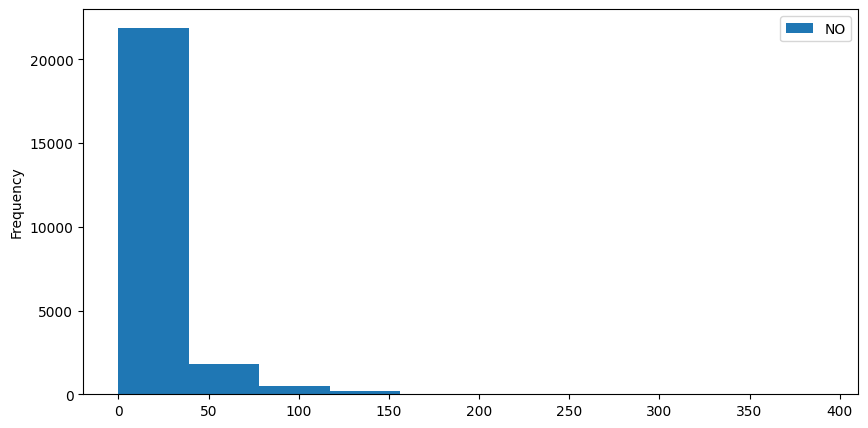

In [15]:
# Histogram representation of column: 'NO'. 

df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

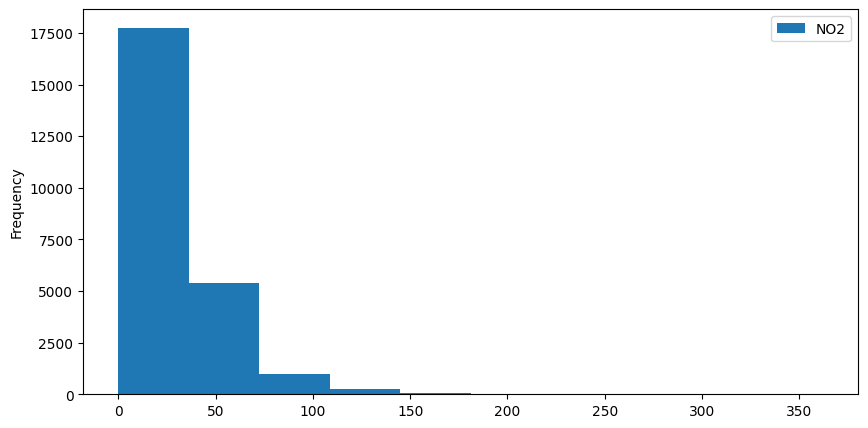

In [16]:
# Histogram representation of column: 'NO2'. 

df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

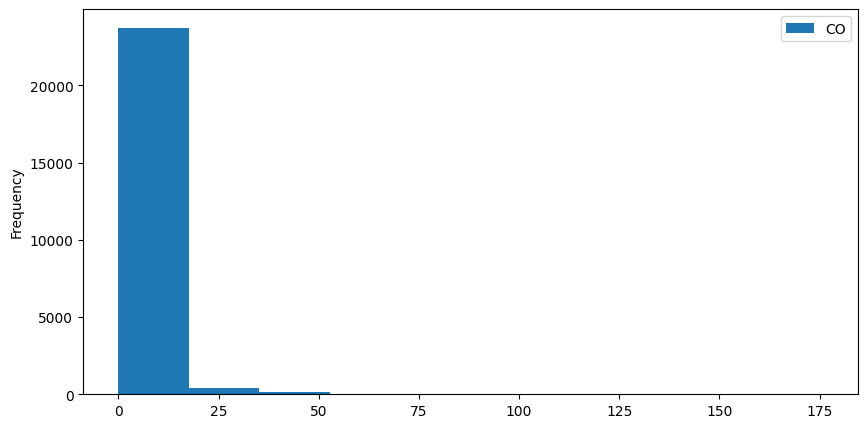

In [17]:
# Histogram representation of column: 'CO'. 

df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

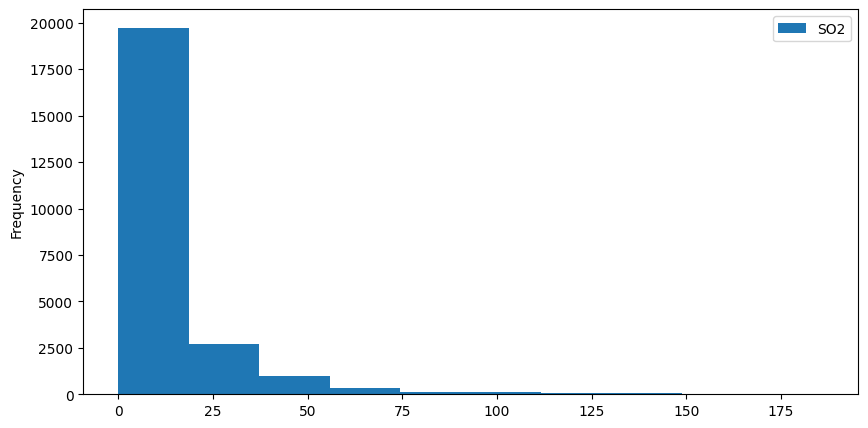

In [18]:
# Histogram representation of column: 'SO2'. 

df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

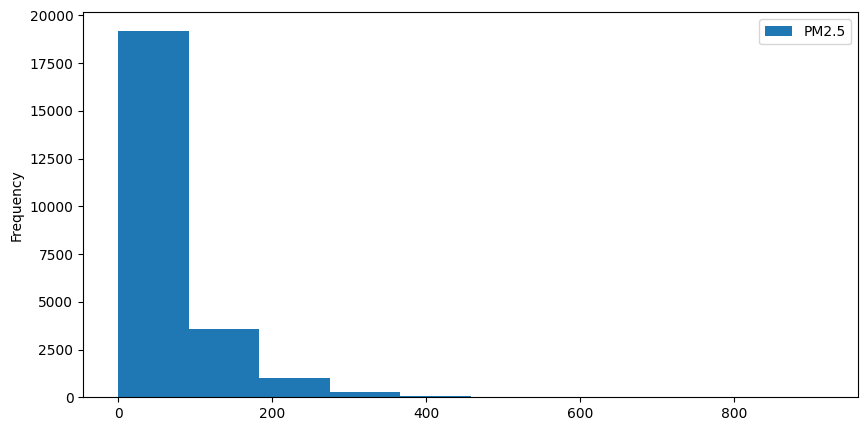

In [19]:
# Histogram representation of column: 'PM2.5'. 

df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

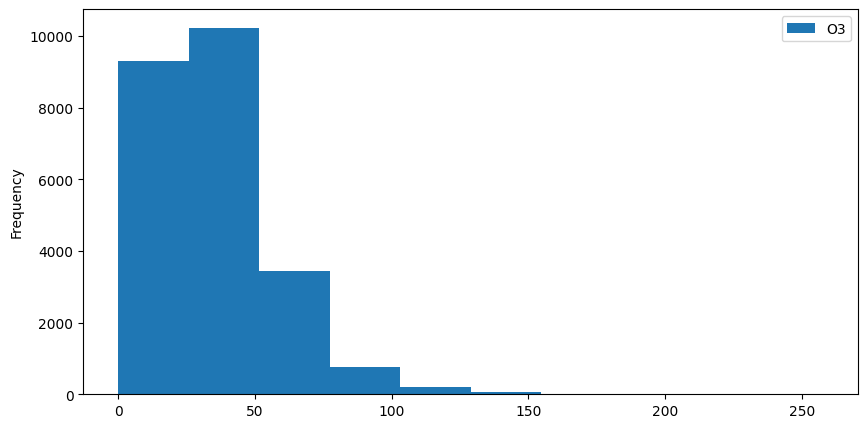

In [20]:
# Histogram representation of column: 'O3'. 

df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

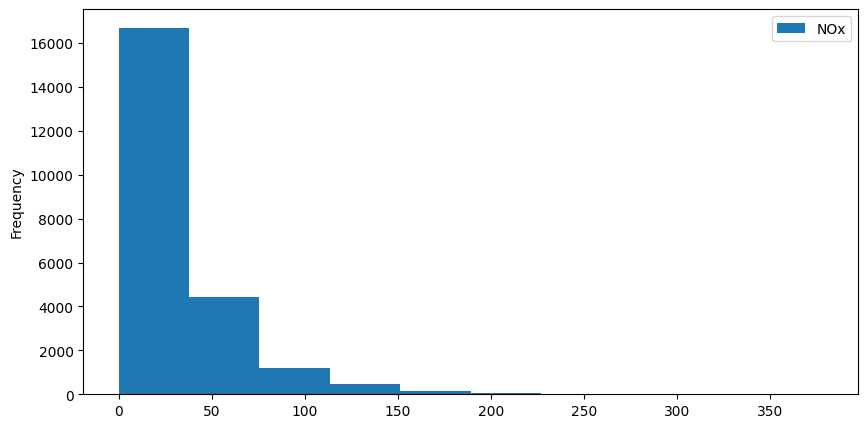

In [21]:
# Histogram representation of column: 'NOx'.

df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

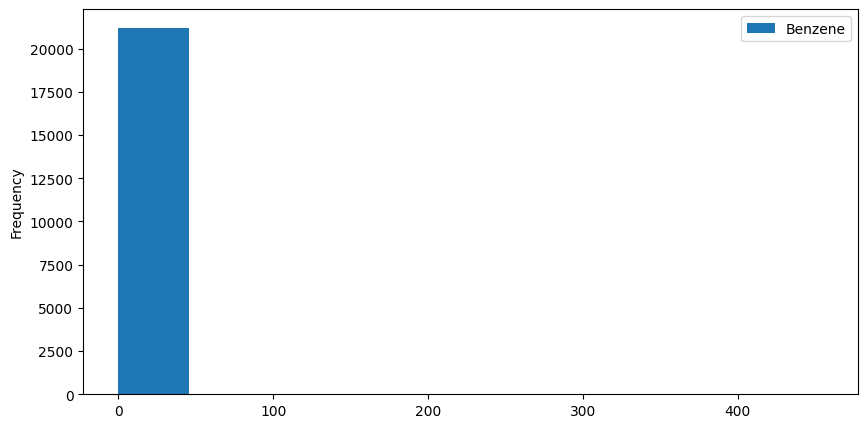

In [22]:
# Histogram representation of column: 'Benzene'. 

df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

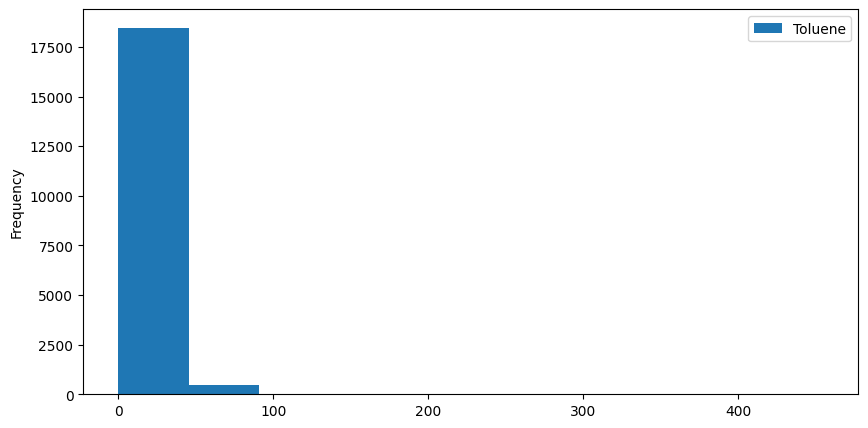

In [23]:
# Histogram representation of column: 'Toluene'. 

df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

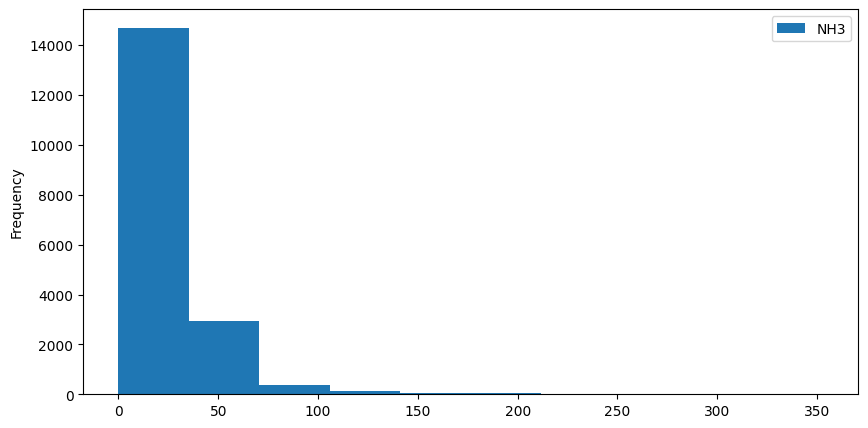

In [24]:
# Histogram representation of column: 'NH3'. 

df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

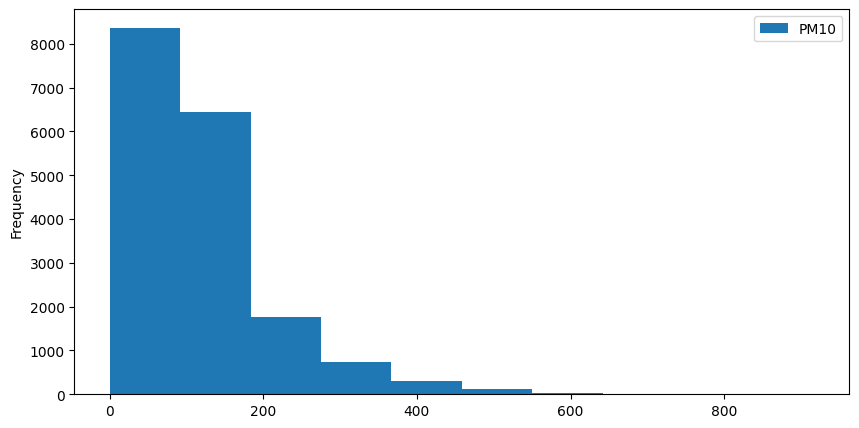

In [25]:
# Histogram representation of column: 'PM10'. 

df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

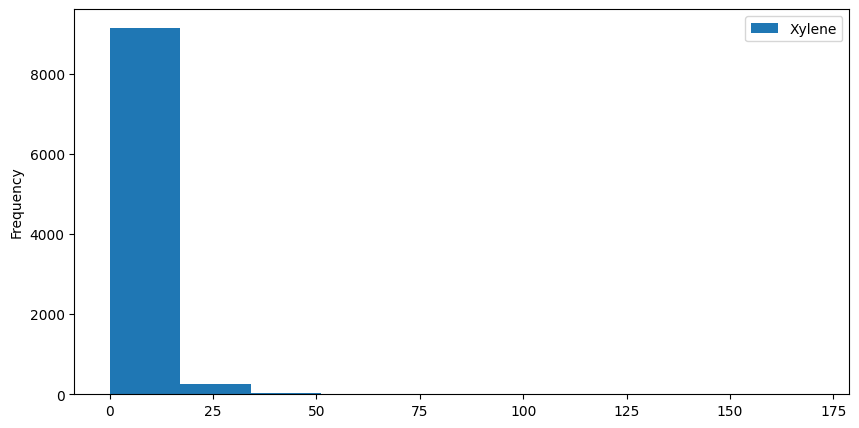

In [26]:
# Histogram representation of column: 'Xylene'.

df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

**AREA PLOT:** An area plot visualizes data with filled regions under lines, highlighting trends, magnitudes proportions often across time or categories.


<Axes: >

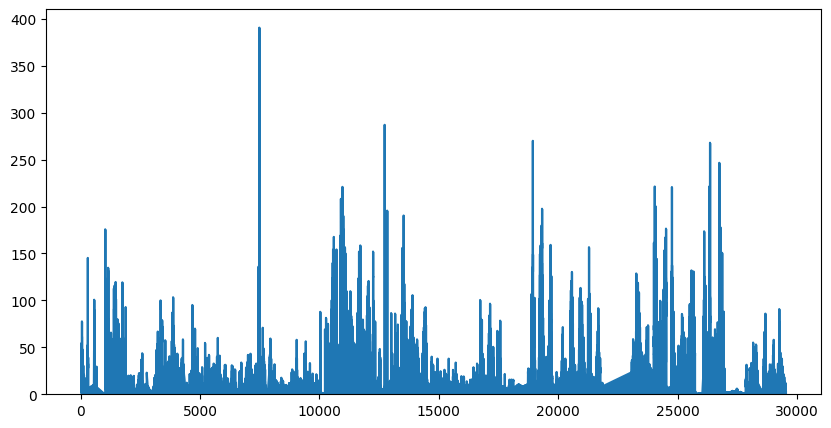

In [27]:
# Area Plot representation of column-'NO'.

df['NO'].plot(kind='area', figsize=(10, 5))

<Axes: >

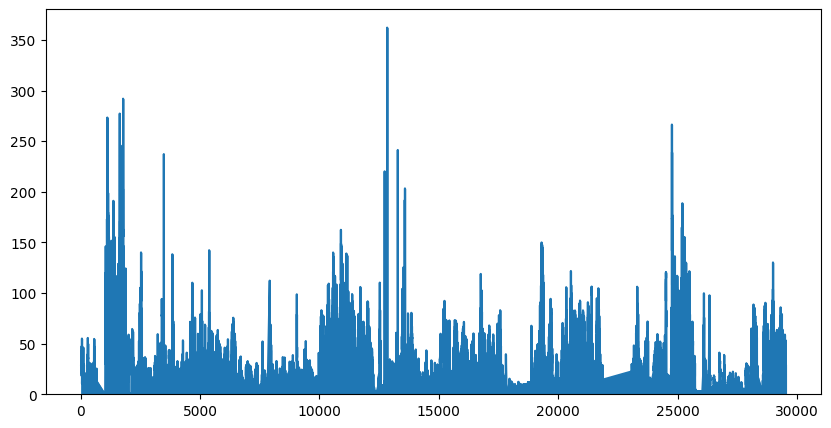

In [28]:
# Area Plot representation of column-'NO2'.

df['NO2'].plot(kind='area', figsize=(10, 5))

<Axes: >

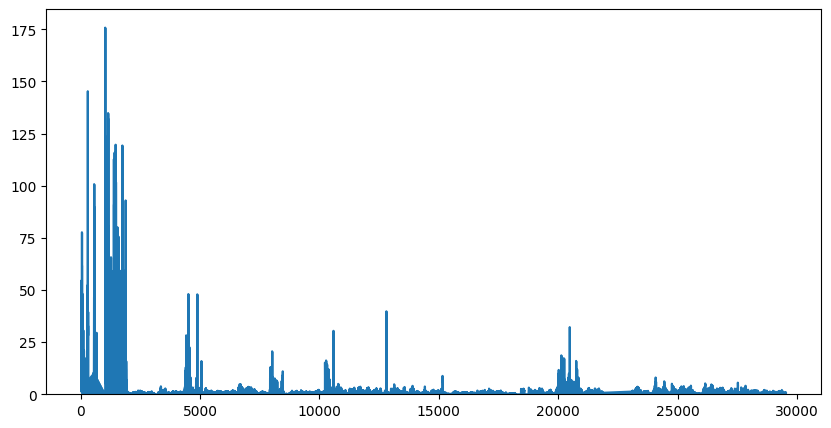

In [29]:
# Area Plot representation of column-'CO'.

df['CO'].plot(kind='area', figsize=(10, 5))

<Axes: >

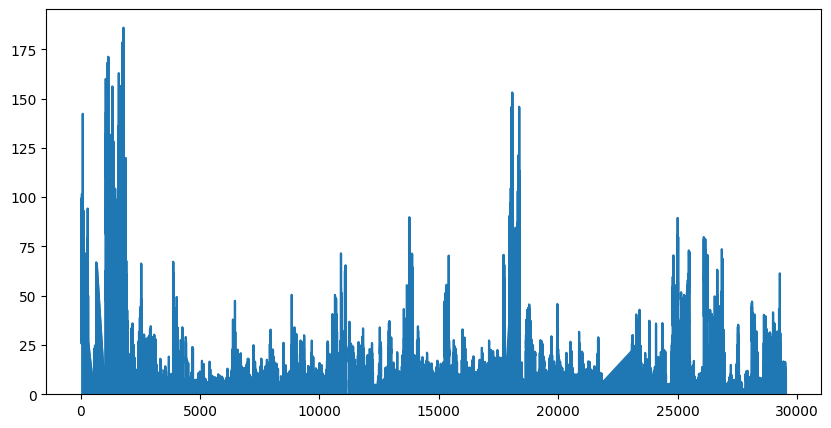

In [30]:
# Area Plot representation of column-'SO2'.

df['SO2'].plot(kind='area', figsize=(10, 5))

<Axes: >

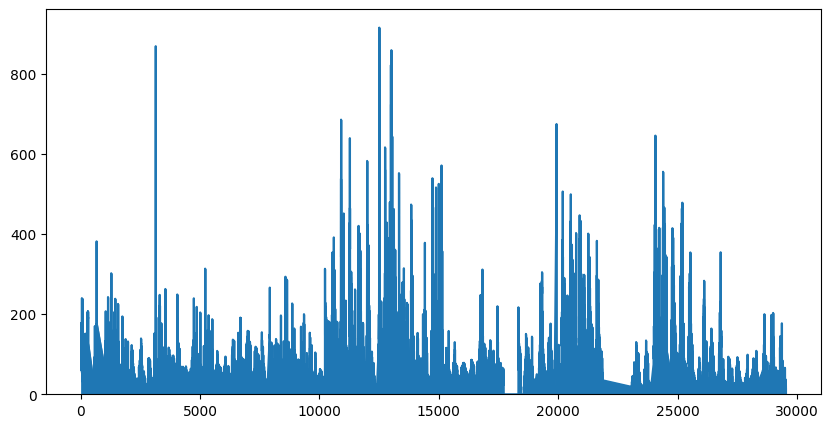

In [31]:
# Area Plot representation of column-'PM2.5'.

df['PM2.5'].plot(kind='area', figsize=(10, 5))

<Axes: >

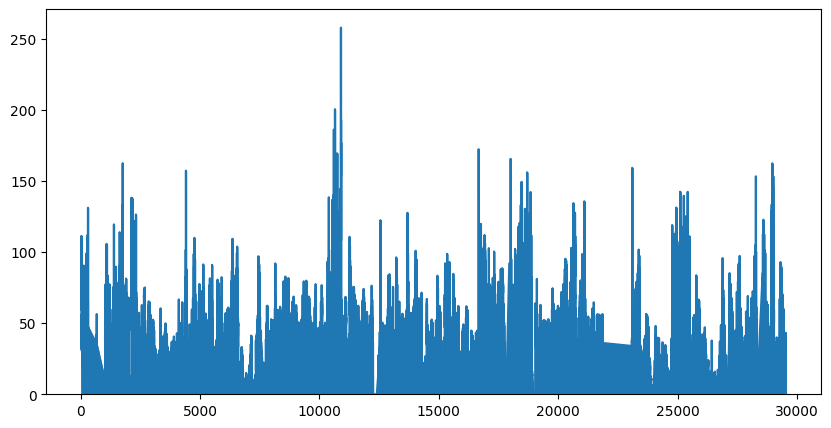

In [32]:
# Area Plot representation of column-'O3'.

df['O3'].plot(kind='area', figsize=(10, 5))

<Axes: >

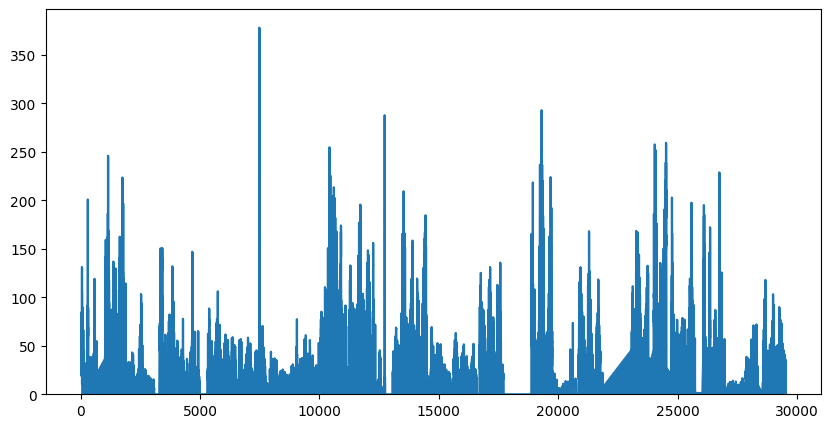

In [33]:
# Area Plot representation of column-'NOx'.

df['NOx'].plot(kind='area', figsize=(10, 5))

<Axes: >

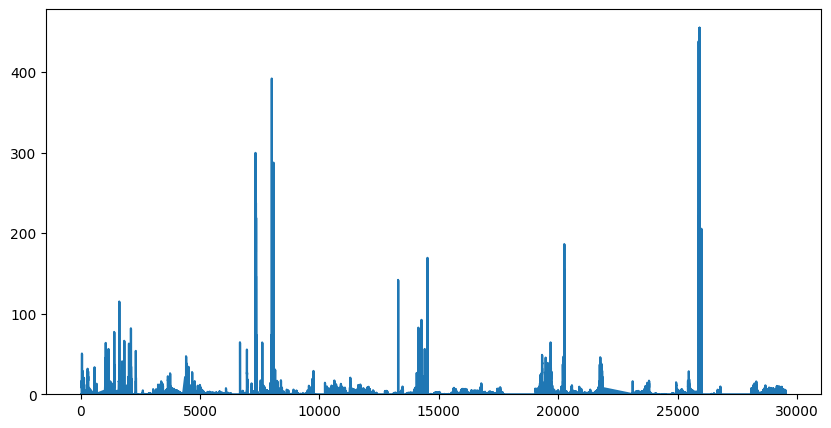

In [34]:
# Area Plot representation of column-'Benzene'.

df['Benzene'].plot(kind='area', figsize=(10, 5))

<Axes: >

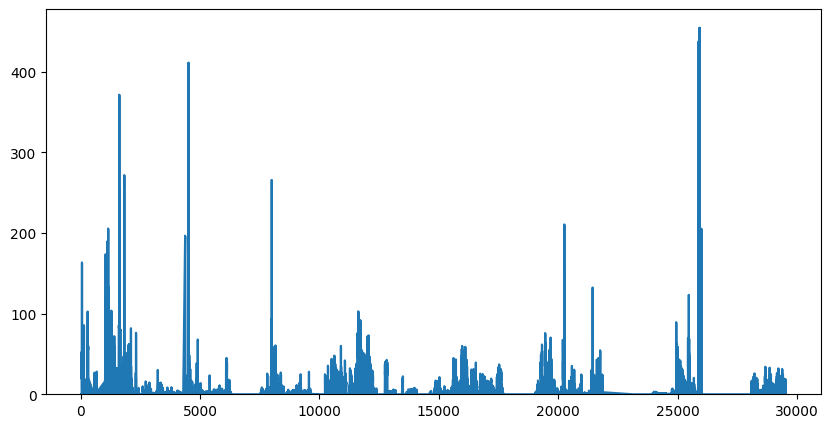

In [35]:
# Area Plot representation of column-'Toluene'.

df['Toluene'].plot(kind='area', figsize=(10, 5))

<Axes: >

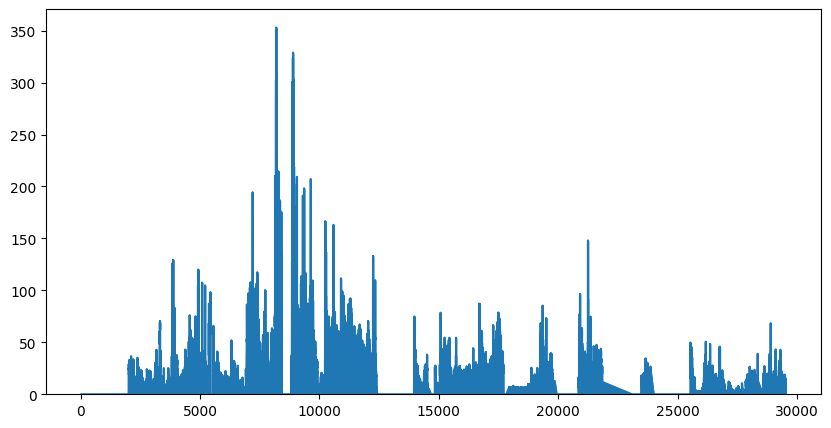

In [36]:
# Area Plot representation of column-'NH3'.

df['NH3'].plot(kind='area', figsize=(10, 5))

<Axes: >

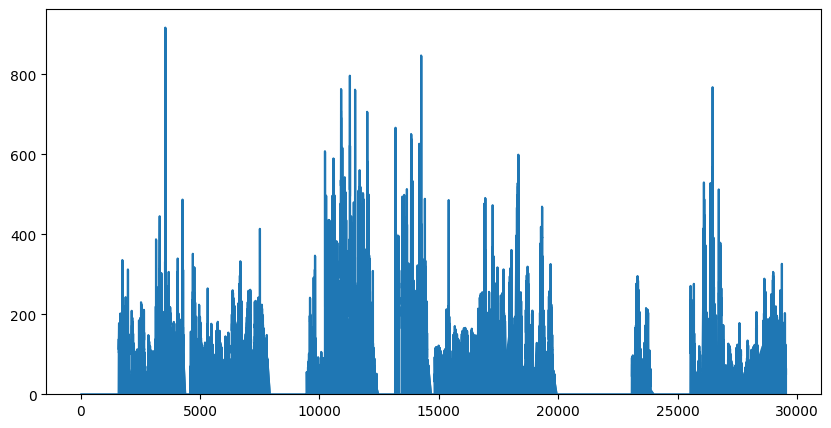

In [37]:
# Area Plot representation of column-'PM10'.

df['PM10'].plot(kind='area', figsize=(10, 5))

<Axes: >

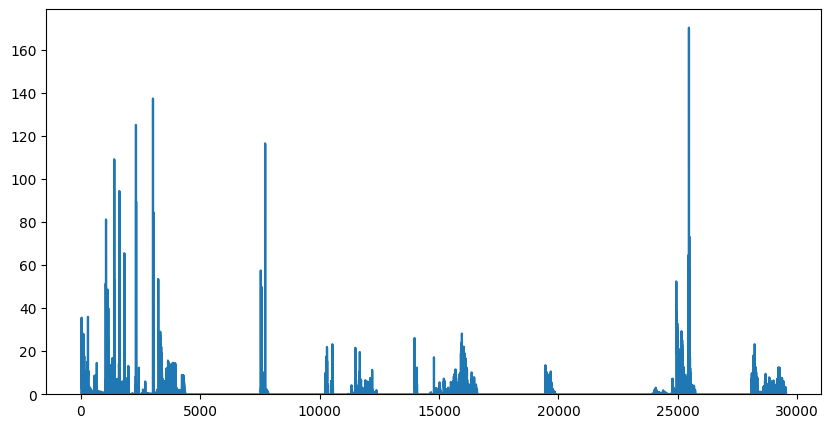

In [38]:
# Area Plot representation of column-'Xylene'.

df['Xylene'].plot(kind='area', figsize=(10, 5))

**DENSITY PLOT** : A density plot visualizes the distribution of a continuous variable, smoothing data points to estimate probability density across a range.It provides an alternative to histograms, with smoother curves that make patterns easier to identify.

<Axes: ylabel='Density'>

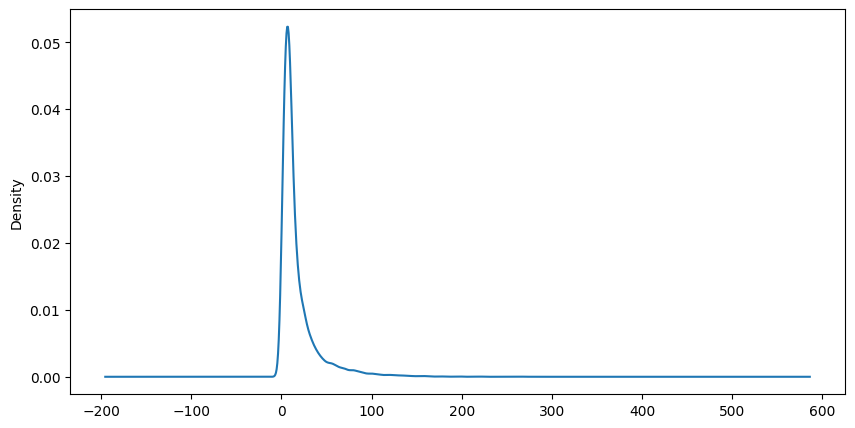

In [39]:
# Density Plot representation for column - 'NO'.
df['NO'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

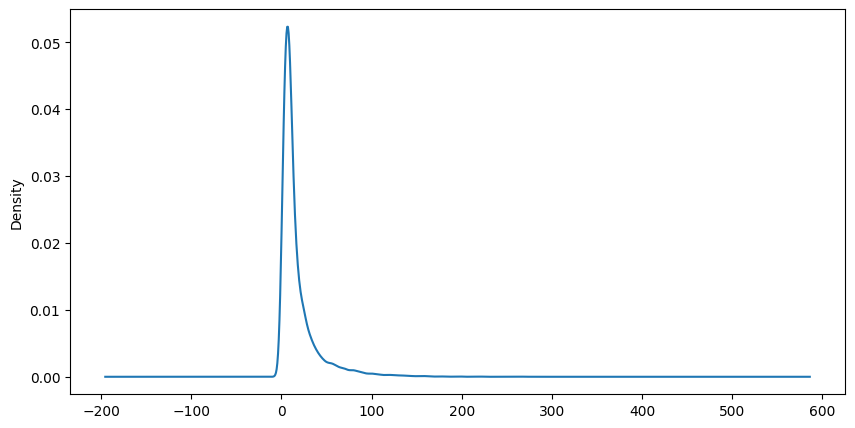

In [40]:
# Density Plot representation for column - 'NO'.
df['NO'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

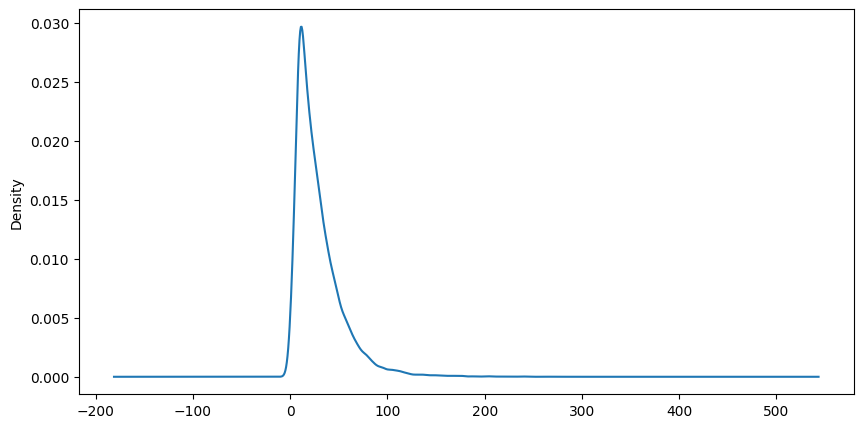

In [41]:
# Density Plot representation for column - 'NO2'.
df['NO2'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

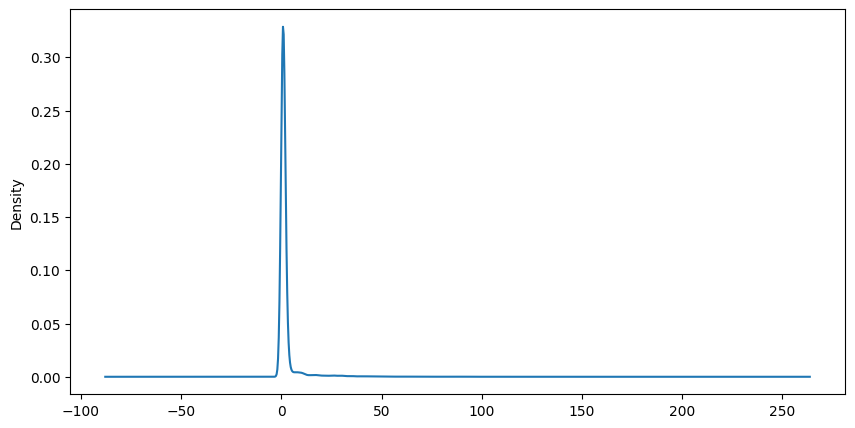

In [42]:
# Density Plot representation for column - 'CO'.

df['CO'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

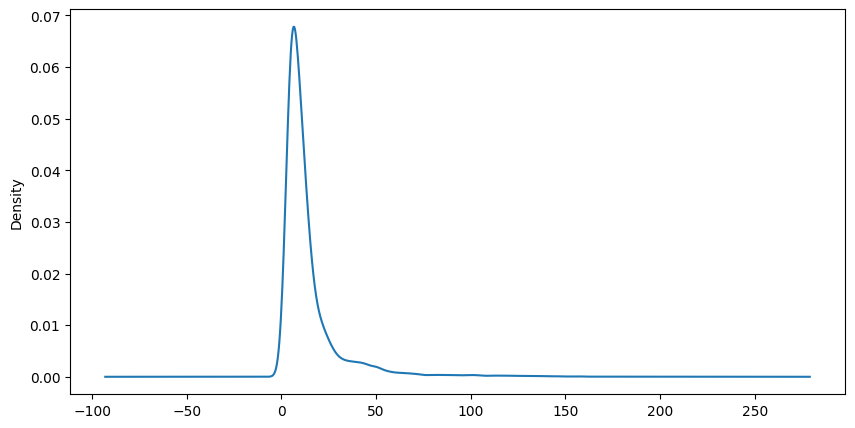

In [43]:
# Density Plot representation for column - 'SO'.

df['SO2'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

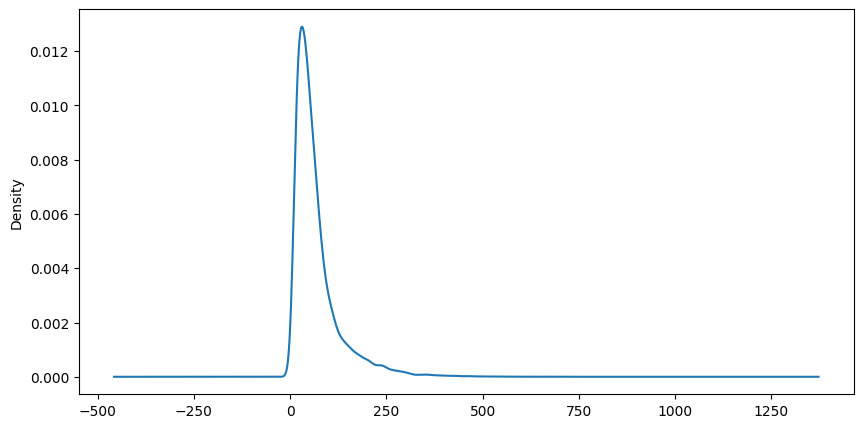

In [44]:
# Density Plot representation for column - 'PM2.5'.

df['PM2.5'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

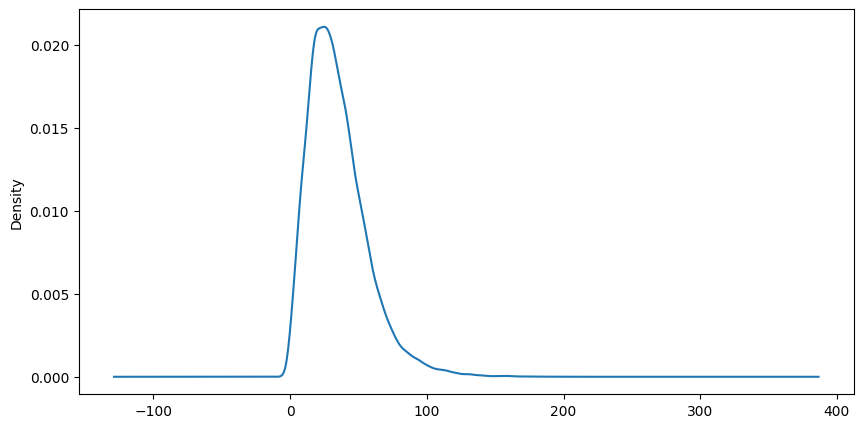

In [45]:
# Density Plot representation for column - 'O3'.

df['O3'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

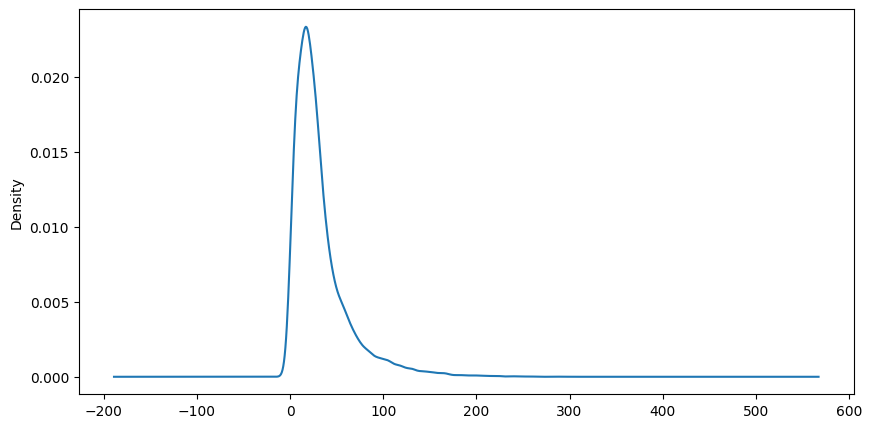

In [46]:
# Density Plot representation for column - 'NOx'.

df['NOx'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

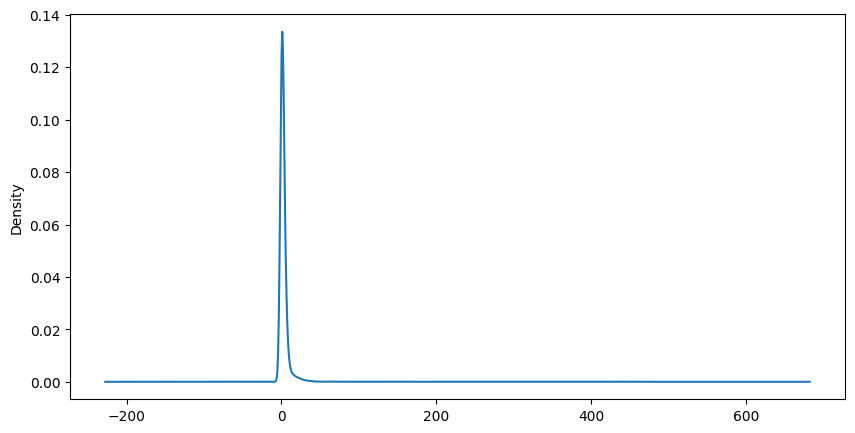

In [47]:
# Density Plot representation for column - 'Benzene'.

df['Benzene'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

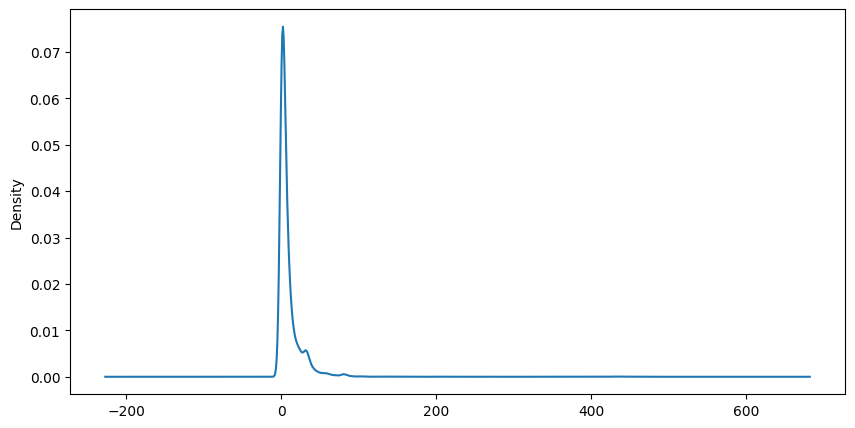

In [48]:
# Density Plot representation for column - 'Toluene'.

df['Toluene'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

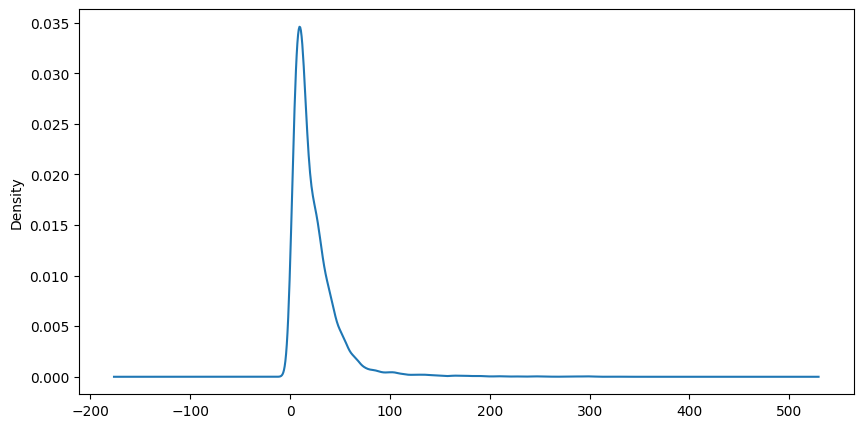

In [49]:
# Density Plot representation for column - 'NH3'.

df['NH3'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

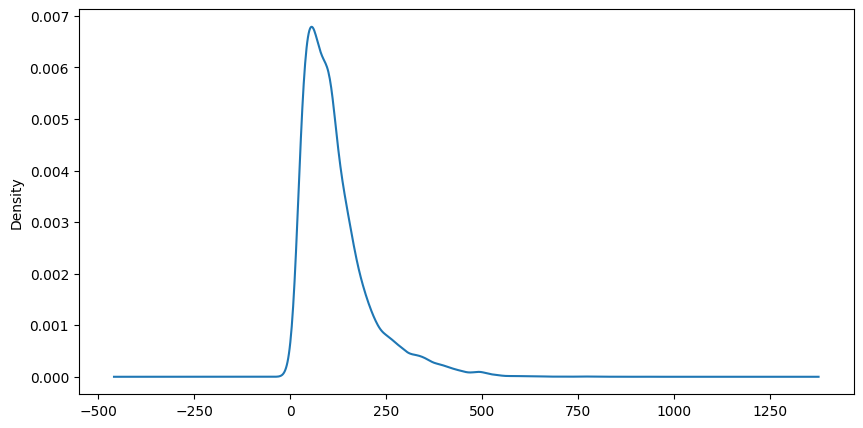

In [50]:
# Density Plot representation for column - 'PM10'.

df['PM10'].plot(kind='density', figsize=(10, 5))

<Axes: ylabel='Density'>

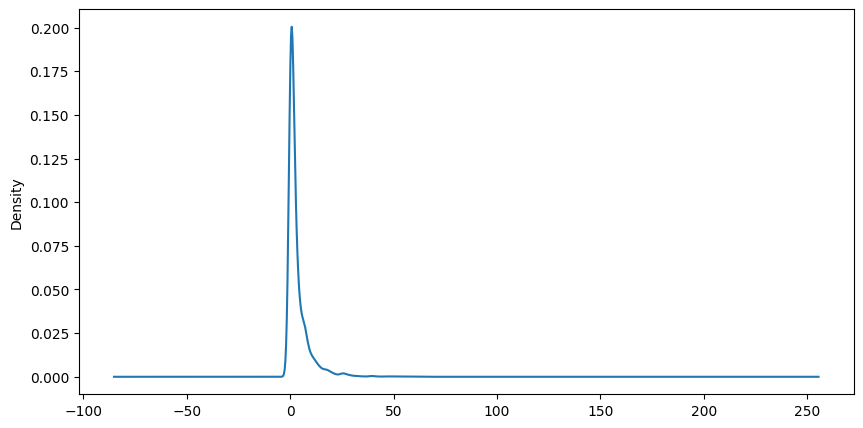

In [51]:
# Density Plot representation for column - 'Xylene'.

df['Xylene'].plot(kind='density', figsize=(10, 5))

**MULTIPLE LINE PLOTS** : A multiple line plot displays multiple data series on the same graph, using lines to show trends or comparisons across categories.

<Axes: >

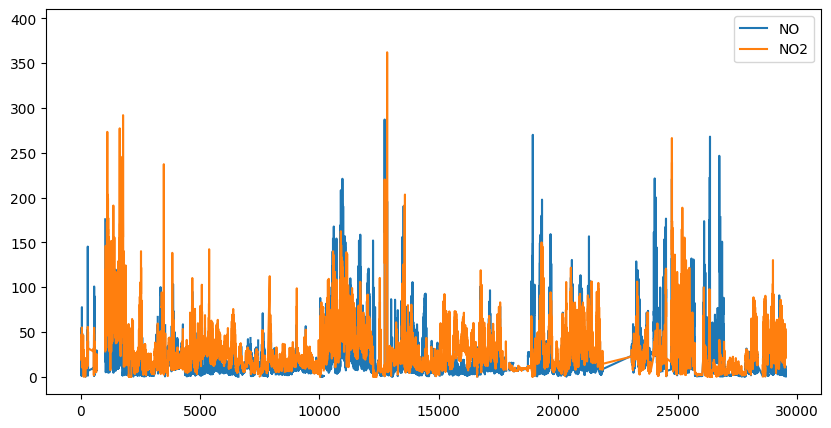

In [52]:
# Multiple Line Plot representation b/w columns : 'NO' & 'NO2'.

df[['NO', 'NO2']].plot(kind='line', figsize=(10, 5))

<Axes: >

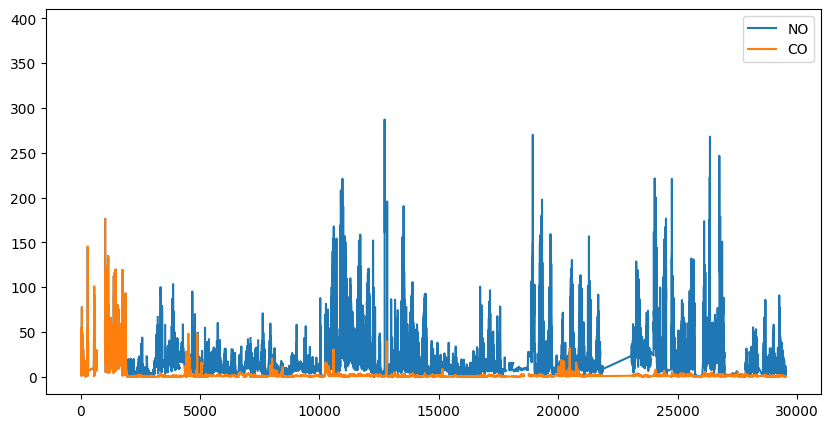

In [53]:
# Multiple Line Plot representation b/w columns : 'NO' & 'CO'.

df[['NO', 'CO']].plot(kind='line', figsize=(10, 5))

<Axes: >

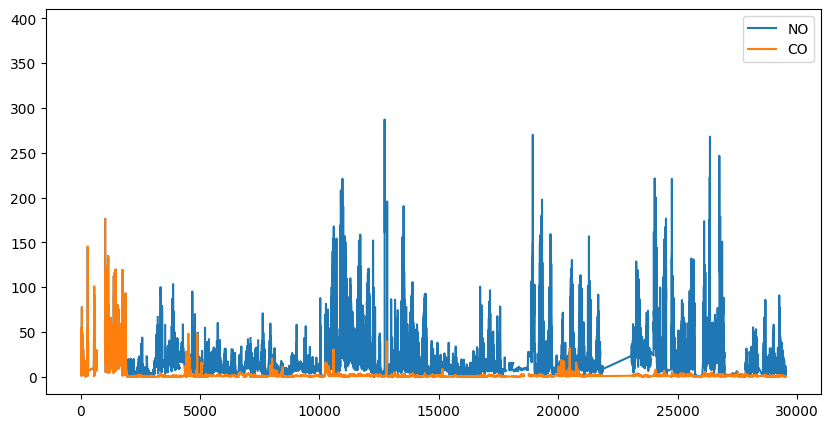

In [54]:
# Multiple Line Plot representation b/w columns : 'NO' & 'CO'.

df[['NO', 'CO']].plot(kind='line', figsize=(10, 5))

<Axes: >

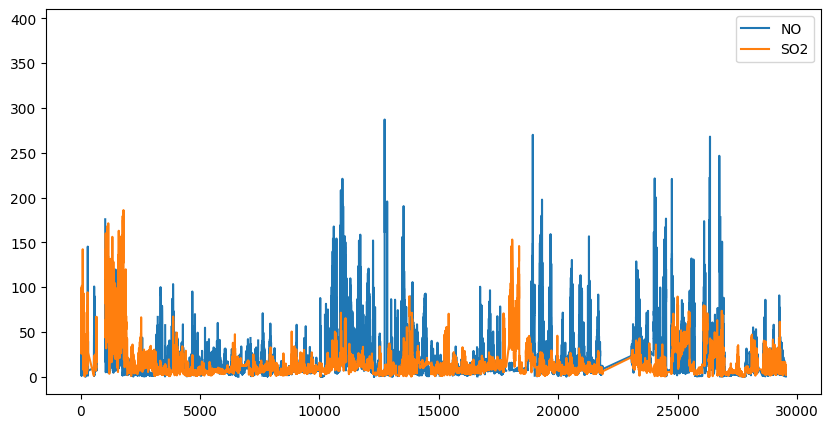

In [55]:
# Multiple Line Plot representation b/w columns : 'NO' & 'SO2'.

df[['NO', 'SO2']].plot(kind='line', figsize=(10, 5))

<Axes: >

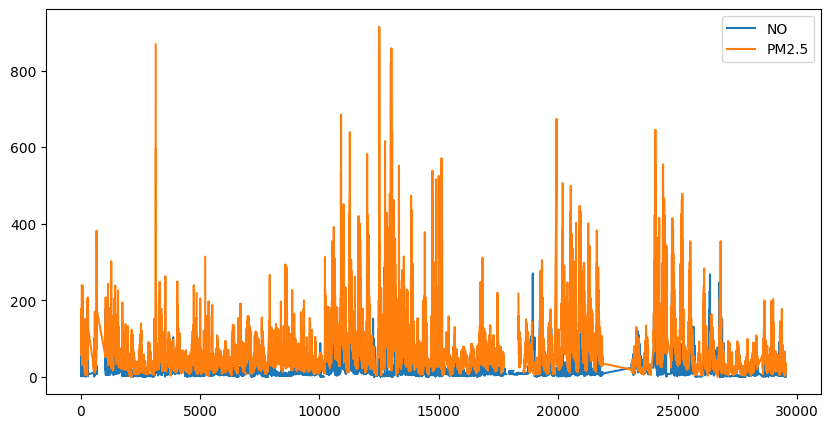

In [56]:
# Multiple Line Plot representation b/w columns : 'NO' & 'PM2.5'.

df[['NO', 'PM2.5']].plot(kind='line', figsize=(10, 5))

<Axes: >

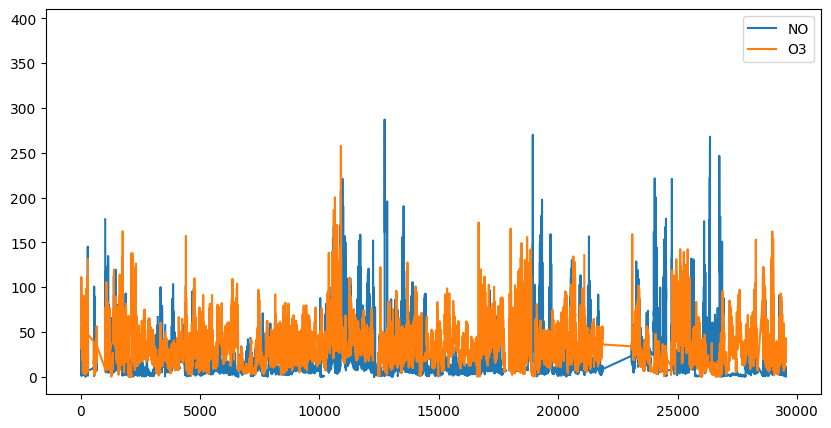

In [57]:
# Multiple Line Plot representation b/w columns : 'NO' & 'O3'.

df[['NO', 'O3']].plot(kind='line', figsize=(10, 5))

<Axes: >

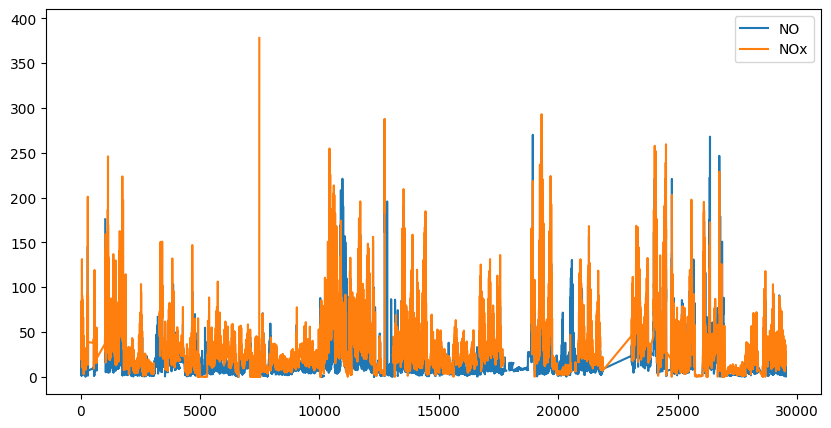

In [58]:
# Multiple Line Plot representation b/w columns : 'NO' & 'NOx'.

df[['NO', 'NOx']].plot(kind='line', figsize=(10, 5))

<Axes: >

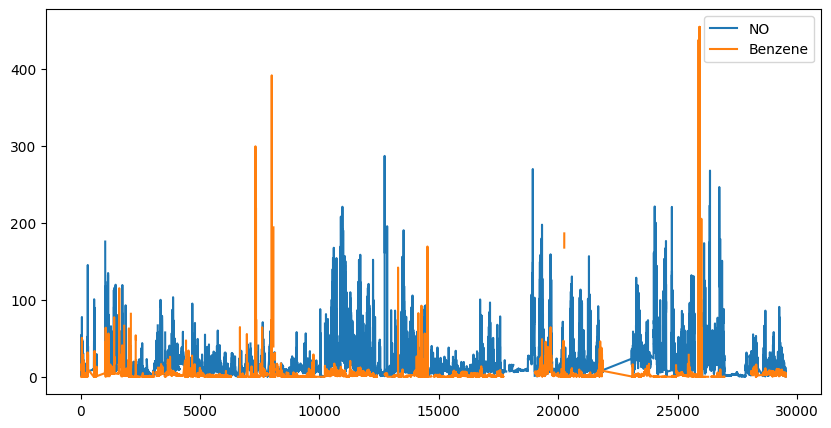

In [59]:
# Multiple Line Plot representation b/w columns : 'NO' & 'Benzene'.

df[['NO', 'Benzene']].plot(kind='line', figsize=(10, 5))

<Axes: >

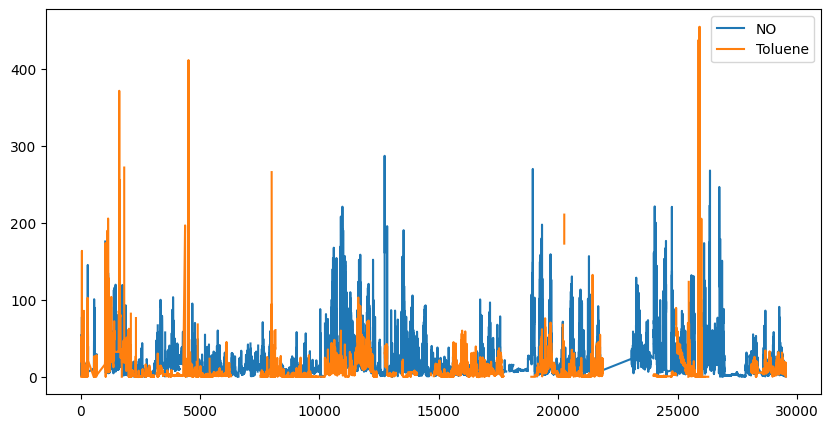

In [60]:
# Multiple Line Plot representation b/w columns : 'NO' & 'Toluene'.

df[['NO', 'Toluene']].plot(kind='line', figsize=(10, 5))

<Axes: >

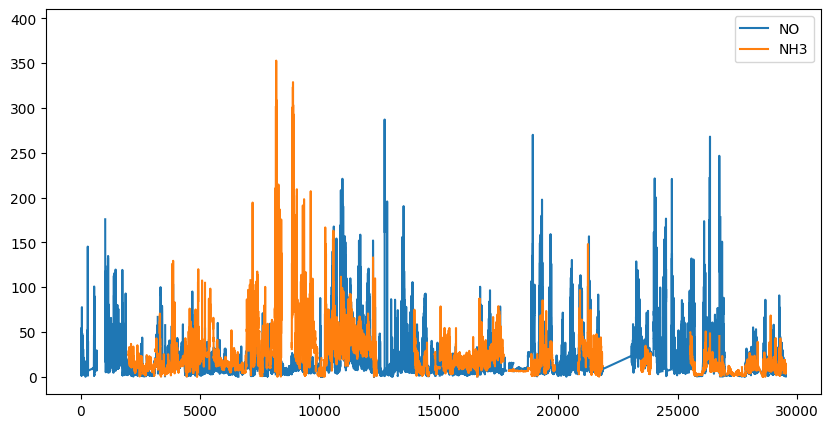

In [61]:
# Multiple Line Plot representation b/w columns : 'NO' & 'NH3'.

df[['NO', 'NH3']].plot(kind='line', figsize=(10, 5))

<Axes: >

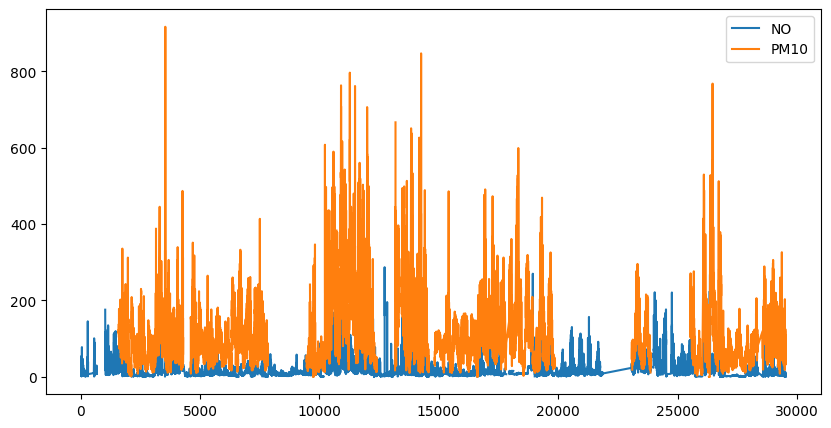

In [62]:
# Multiple Line Plot representation b/w columns : 'NO' & 'PM10'.

df[['NO', 'PM10']].plot(kind='line', figsize=(10, 5))

<Axes: >

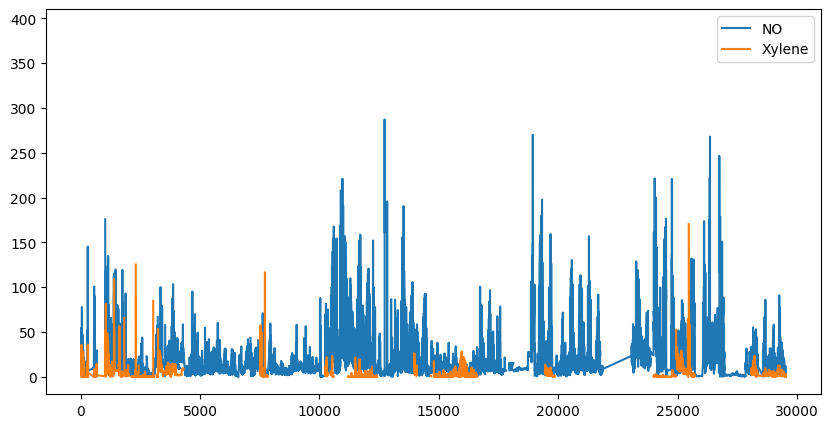

In [63]:
# Multiple Line Plot representation b/w columns : 'NO' & 'Xylene'.

df[['NO', 'Xylene']].plot(kind='line', figsize=(10, 5))

<Axes: >

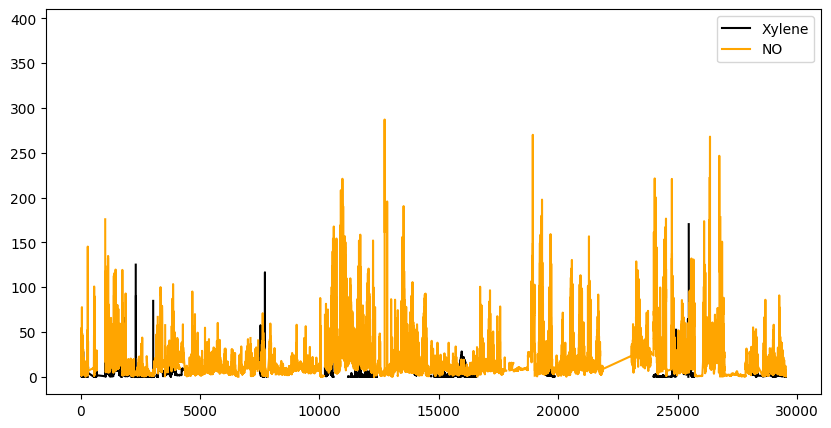

In [64]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'NO'.

df[['Xylene', 'NO']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

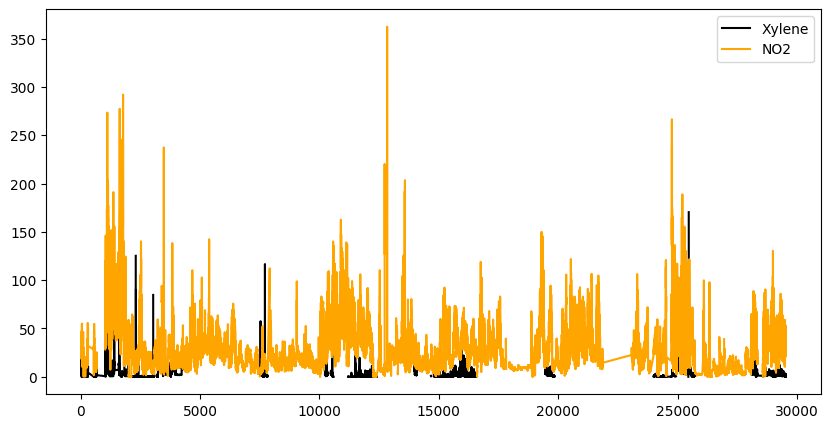

In [65]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'NO2'.

df[['Xylene', 'NO2']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

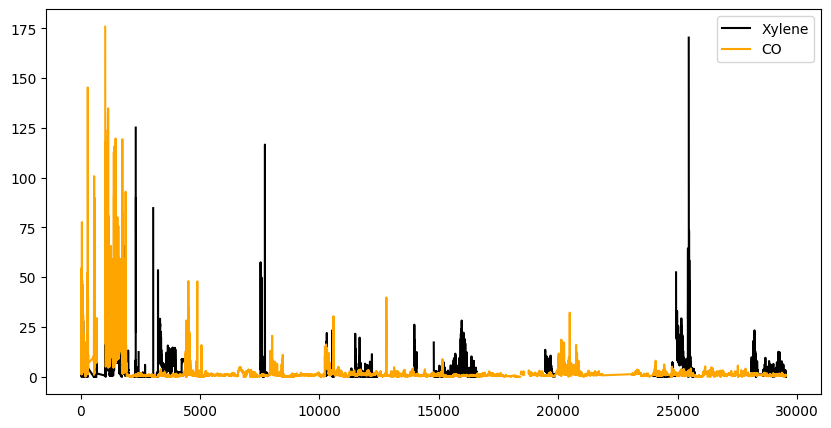

In [66]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'CO'.

df[['Xylene', 'CO']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

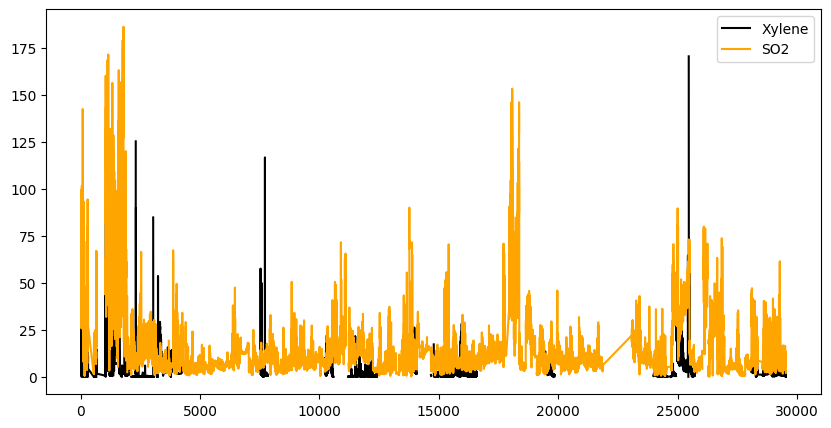

In [69]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'SO2'.

df[['Xylene', 'SO2']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

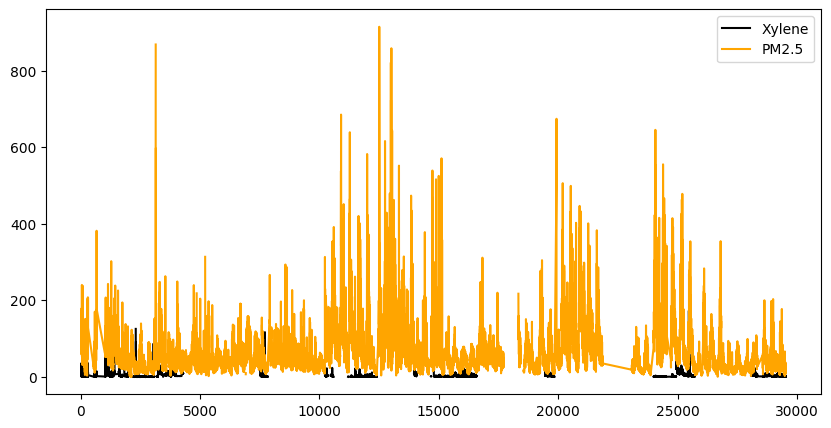

In [68]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'PM2.5'.

df[['Xylene', 'PM2.5']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

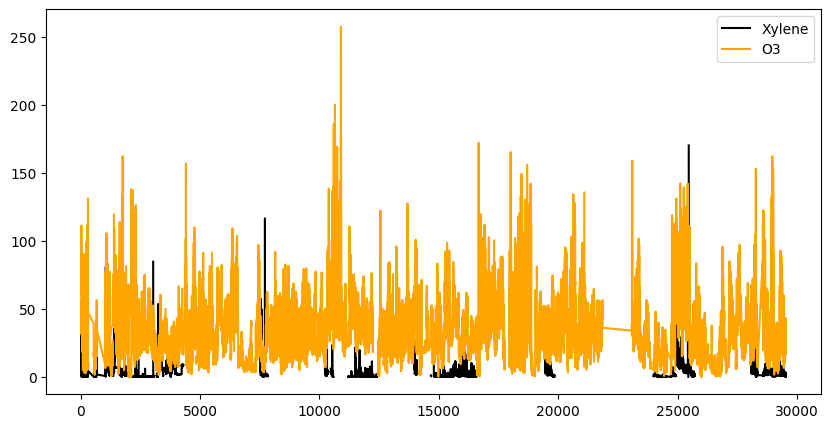

In [70]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'O3'.

df[['Xylene', 'O3']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

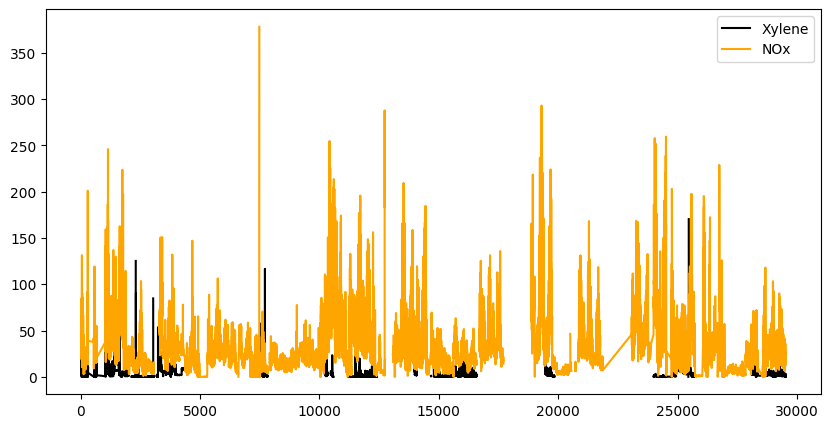

In [71]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'NOx'.

df[['Xylene', 'NOx']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

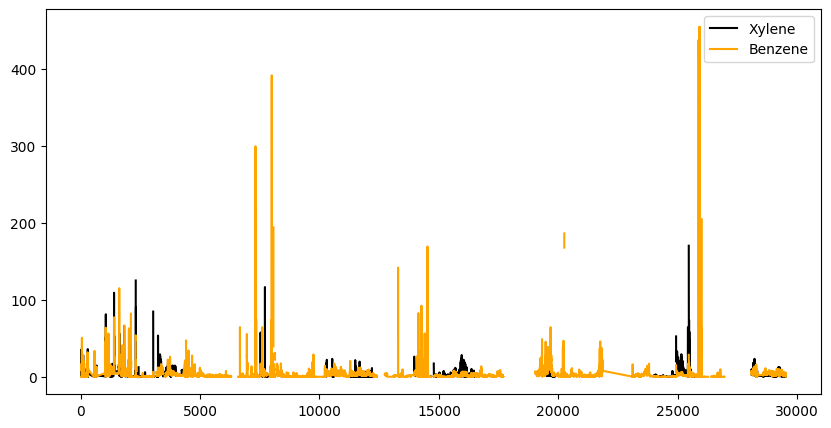

In [72]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'Benzene'.

df[['Xylene', 'Benzene']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

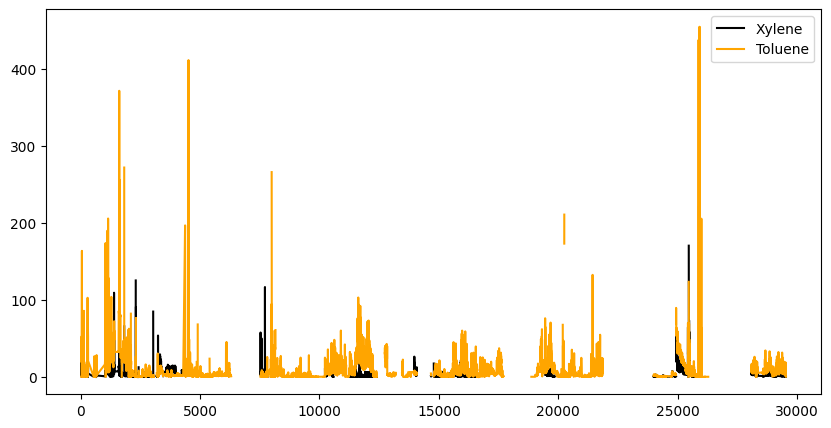

In [73]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'Toluene'.

df[['Xylene', 'Toluene']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

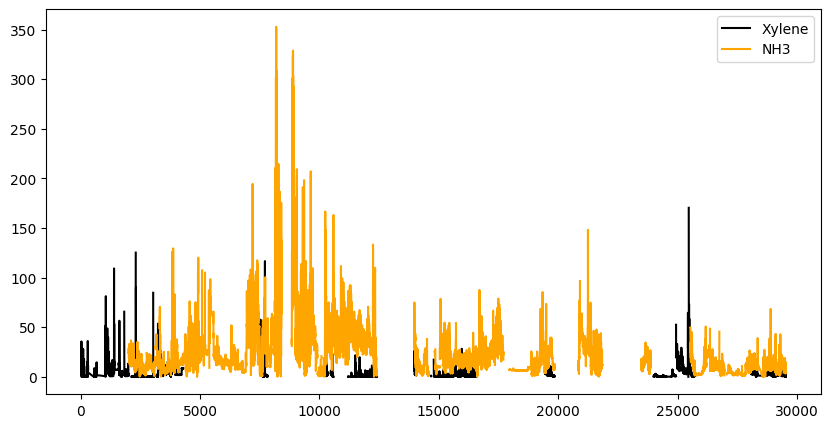

In [74]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'NH3'.

df[['Xylene', 'NH3']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

<Axes: >

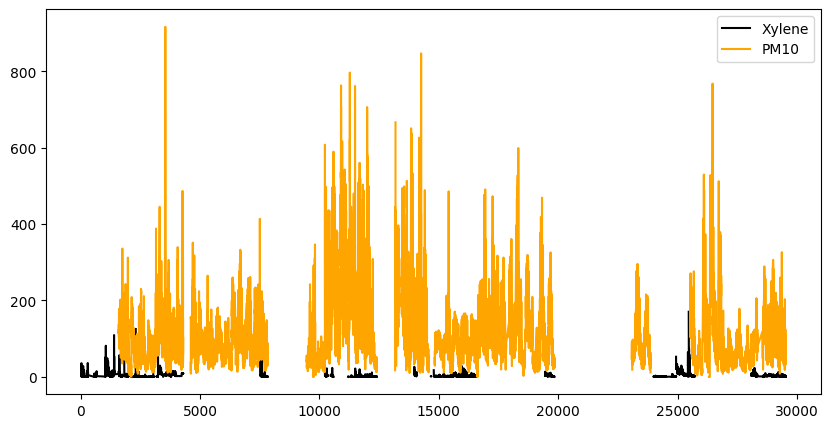

In [75]:
# Multiple Line Plot representation b/w columns : 'Xylene' & 'PM10'.

df[['Xylene', 'PM10']].plot(kind='line', figsize=(10, 5), color=['black', 'orange'])

**HEXBIN PLOT** : A hexbin plot is a two-dimensional histogram-like plot where data points are grouped into hexagonal bins. It's particularly useful for visualizing dense scatter plot data, as it reduces overlapping and shows density distribution.

<Axes: xlabel='NO', ylabel='NO2'>

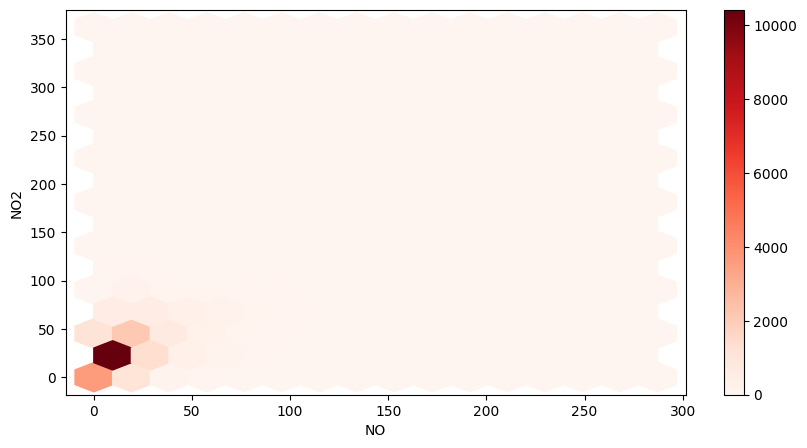

In [76]:
# Hexbin Plot representation b/w columns : 'NO','NO2'.

df.plot(kind='hexbin', x='NO', y='NO2', gridsize=15, figsize=(10, 5), cmap='Reds')

<Axes: xlabel='NO2', ylabel='CO'>

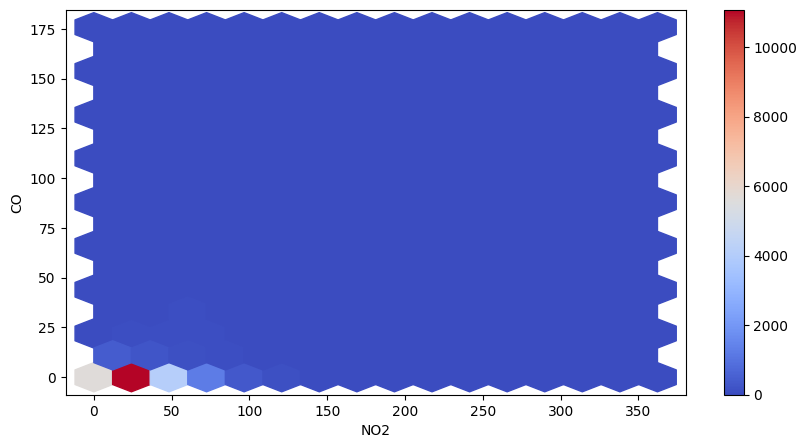

In [77]:
# Hexbin Plot representation b/w columns : 'NO2','CO'.

df.plot(kind='hexbin', x='NO2', y='CO', gridsize=15, figsize=(10, 5), cmap='coolwarm')

<Axes: xlabel='CO', ylabel='SO2'>

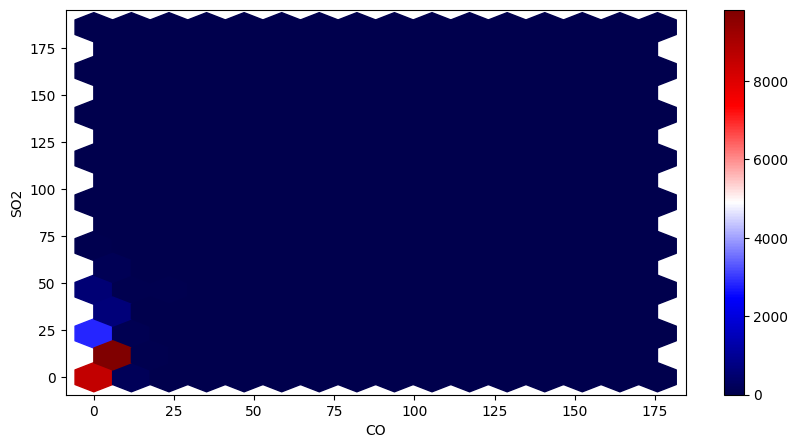

In [78]:
# Hexbin Plot representation b/w columns : 'CO','SO2'.

df.plot(kind='hexbin', x='CO', y='SO2', gridsize=15, figsize=(10, 5), cmap='seismic')

<Axes: xlabel='SO2', ylabel='PM2.5'>

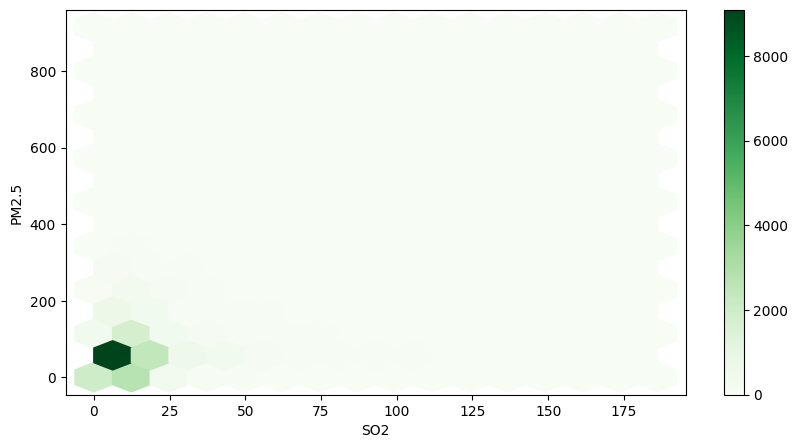

In [79]:
# Hexbin Plot representation b/w columns : 'SO2','PM2.5'.

df.plot(kind='hexbin', x='SO2', y='PM2.5', gridsize=15, figsize=(10, 5), cmap='Greens')

<Axes: xlabel='PM2.5', ylabel='O3'>

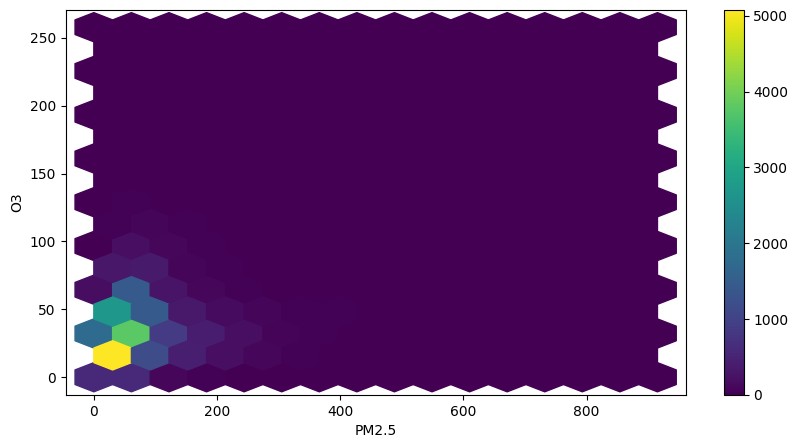

In [80]:
# Hexbin Plot representation b/w columns : 'PM2.5','O3'.

df.plot(kind='hexbin', x='PM2.5', y='O3', gridsize=15, figsize=(10, 5), cmap='viridis')

<Axes: xlabel='O3', ylabel='NOx'>

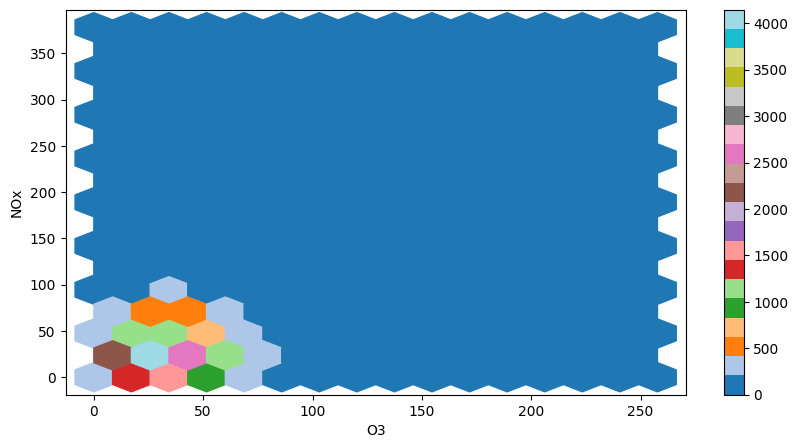

In [81]:
# Hexbin Plot representation b/w columns : 'O3','NOx'.

df.plot(kind='hexbin', x='O3', y='NOx', gridsize=15, figsize=(10, 5), cmap='tab20')

<Axes: xlabel='NOx', ylabel='Benzene'>

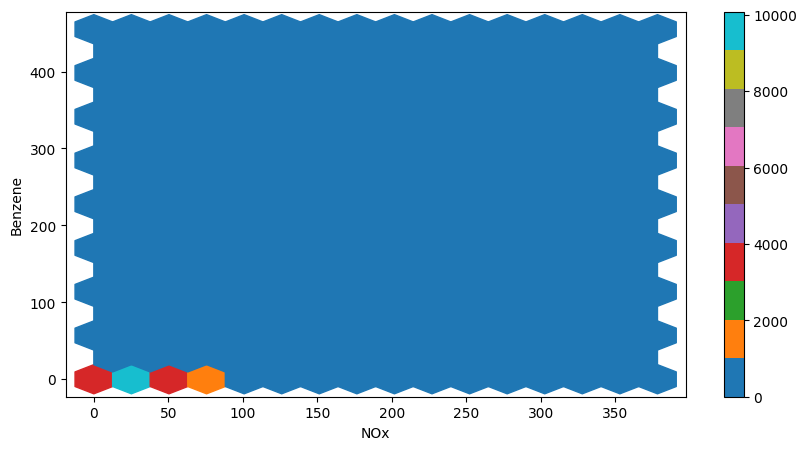

In [82]:
# Hexbin Plot representation b/w columns : 'NOx','Benzene'.

df.plot(kind='hexbin', x='NOx', y='Benzene', gridsize=15, figsize=(10, 5), cmap='tab10')

<Axes: xlabel='Benzene', ylabel='Toluene'>

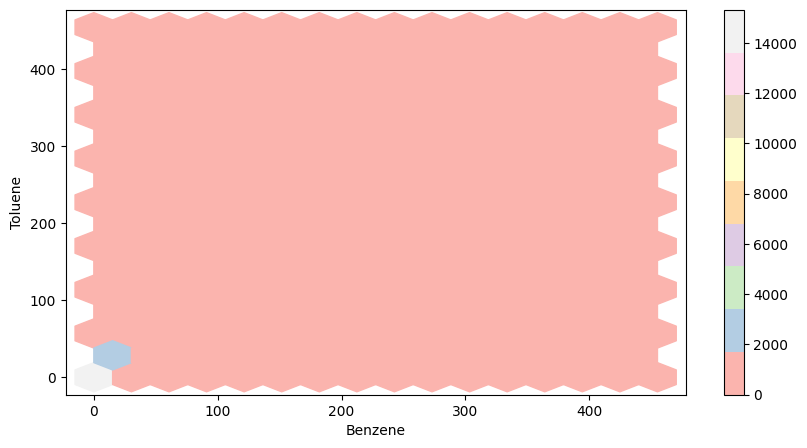

In [83]:
# Hexbin Plot representation b/w columns : 'Benzene','Toluene'.

df.plot(kind='hexbin', x='Benzene', y='Toluene', gridsize=15, figsize=(10, 5), cmap='Pastel1')

<Axes: xlabel='Toluene', ylabel='NH3'>

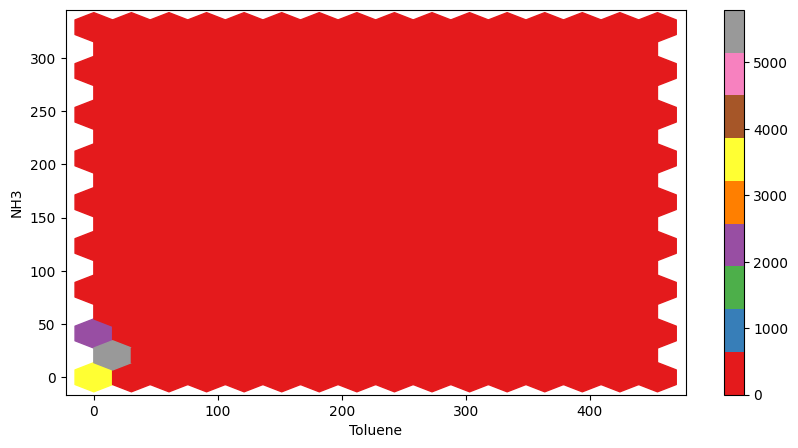

In [84]:
# Hexbin Plot representation b/w columns : 'Toluene','NH3'.

df.plot(kind='hexbin', x='Toluene', y='NH3', gridsize=15, figsize=(10, 5), cmap='Set1')

<Axes: xlabel='NH3', ylabel='PM10'>

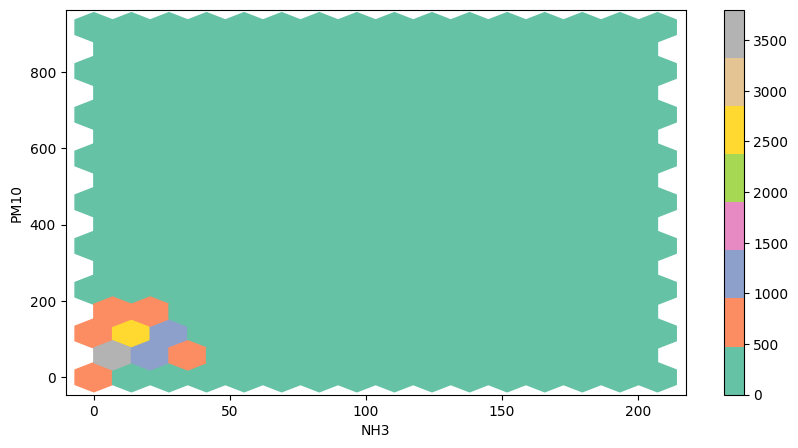

In [85]:
# Hexbin Plot representation b/w columns : 'NH3','PM10'.

df.plot(kind='hexbin', x='NH3', y='PM10', gridsize=15, figsize=(10, 5), cmap='Set2')

<Axes: xlabel='PM10', ylabel='Xylene'>

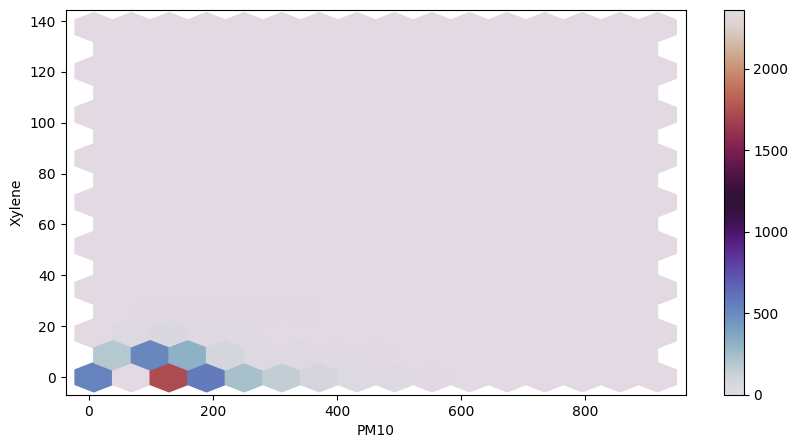

In [86]:
# Hexbin Plot representation b/w columns : 'PM10','Xylene'.

df.plot(kind='hexbin', x='PM10', y='Xylene', gridsize=15, figsize=(10, 5), cmap='twilight')

<Axes: xlabel='Xylene', ylabel='NO'>

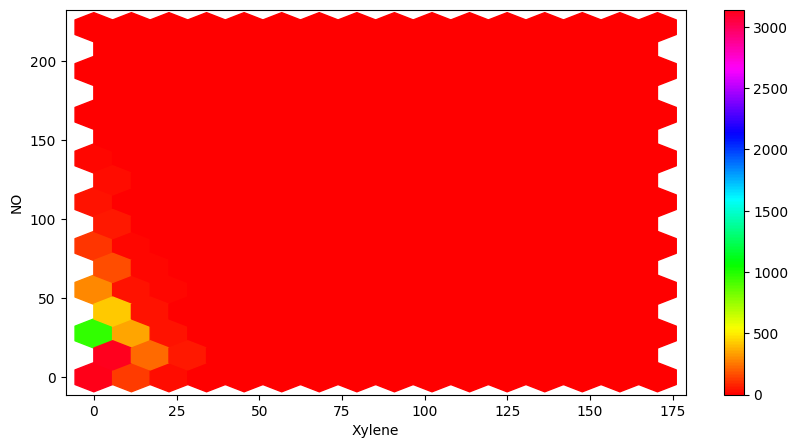

In [87]:
# Hexbin Plot representation b/w columns : 'Xylene','NO'.

df.plot(kind='hexbin', x='Xylene', y='NO', gridsize=15, figsize=(10, 5), cmap='hsv')

**SCATTER PLOT** : A scatter plot is a type of data visualization that displays points on a two-dimensional grid, representing the relationship between two continuous variables.

<Axes: xlabel='NO', ylabel='NO2'>

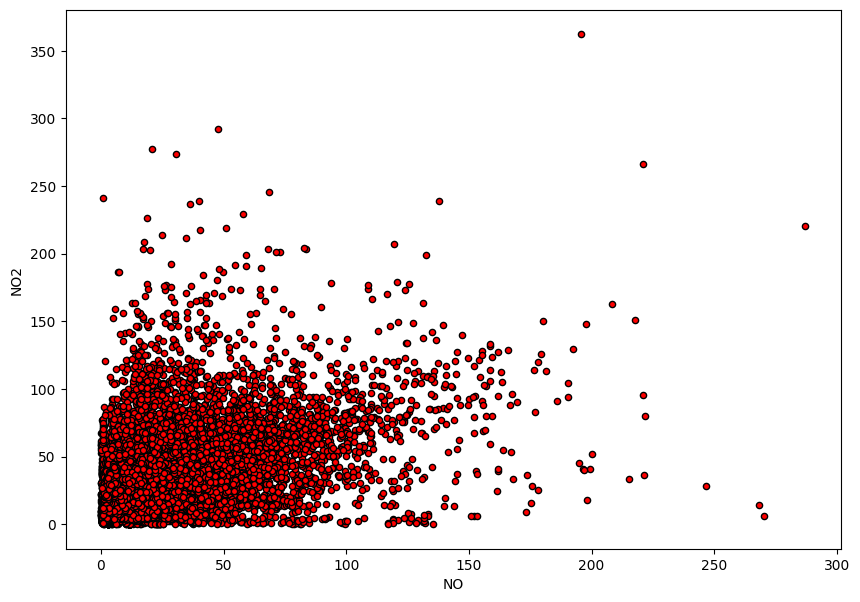

In [88]:
# Scatter Plot representation b/w columns : 'NO','NO2'.

df.plot(kind='scatter', x='NO', y='NO2', figsize=(10, 7), color='red', edgecolor='black')

<Axes: xlabel='NO2', ylabel='CO'>

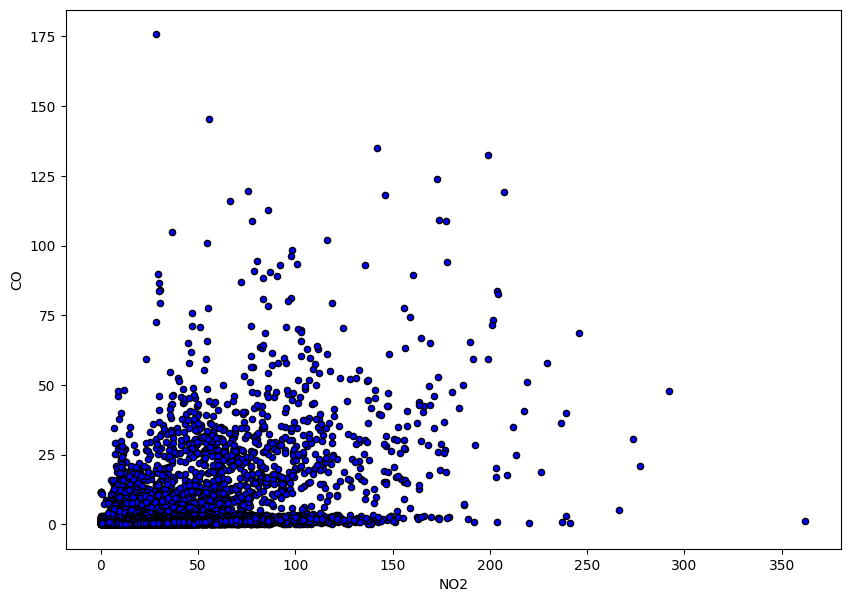

In [89]:
# Scatter Plot representation b/w columns : 'NO2','CO'.

df.plot(kind='scatter', x='NO2', y='CO', figsize=(10, 7), color='blue', edgecolor='black')

<Axes: xlabel='CO', ylabel='SO2'>

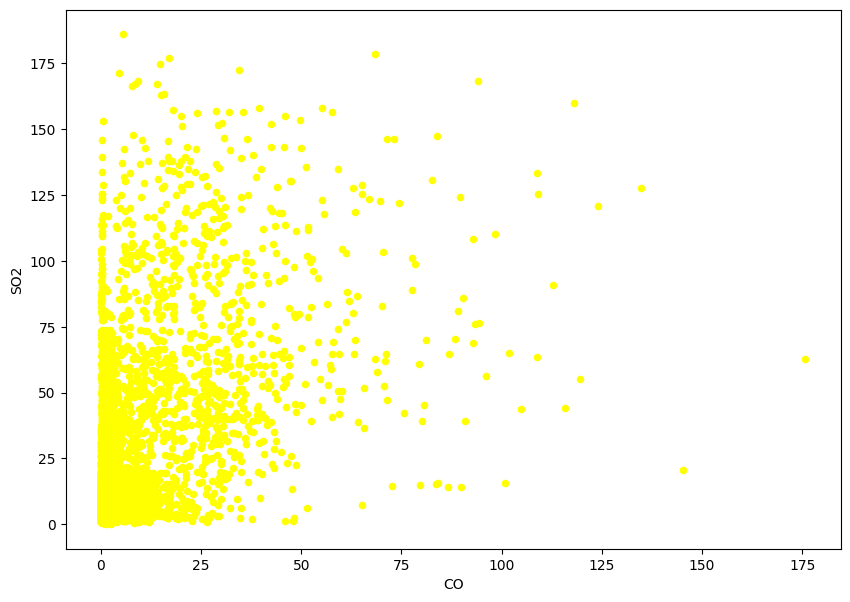

In [90]:
# Scatter Plot representation b/w columns : 'CO','SO2'.

df.plot(kind='scatter', x='CO', y='SO2', figsize=(10, 7), color='yellow')

<Axes: xlabel='SO2', ylabel='PM2.5'>

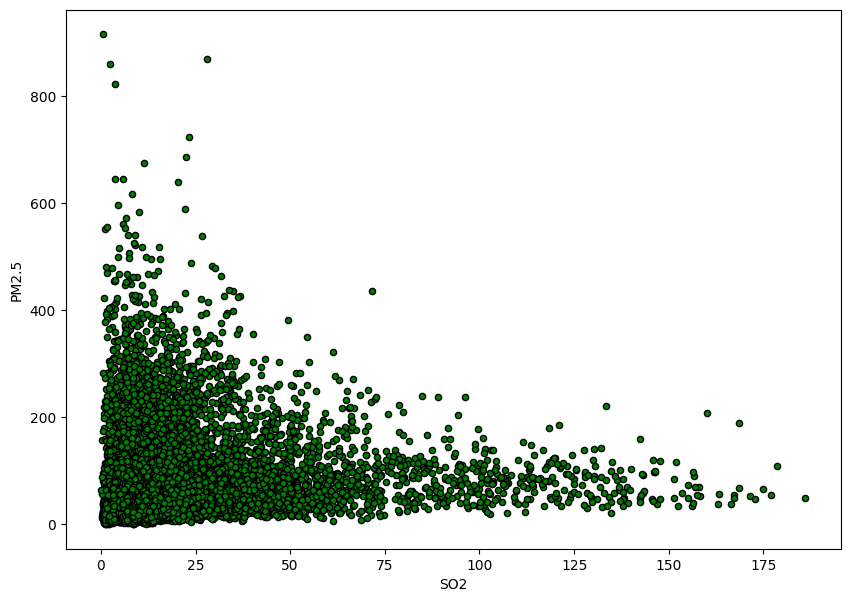

In [91]:
# Scatter Plot representation b/w columns : 'SO2','PM2.5'.

df.plot(kind='scatter', x='SO2', y='PM2.5', figsize=(10, 7), color='green', edgecolor='black')

<Axes: xlabel='PM2.5', ylabel='O3'>

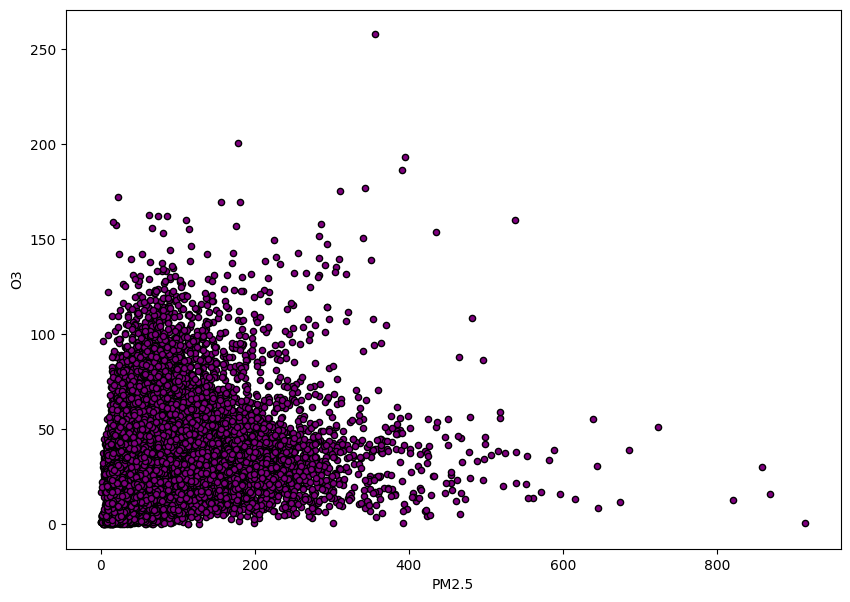

In [92]:
# Scatter Plot representation b/w columns : 'PM2.5','O3'.

df.plot(kind='scatter', x='PM2.5', y='O3', figsize=(10, 7), color='purple', edgecolor='black')

<Axes: xlabel='O3', ylabel='NOx'>

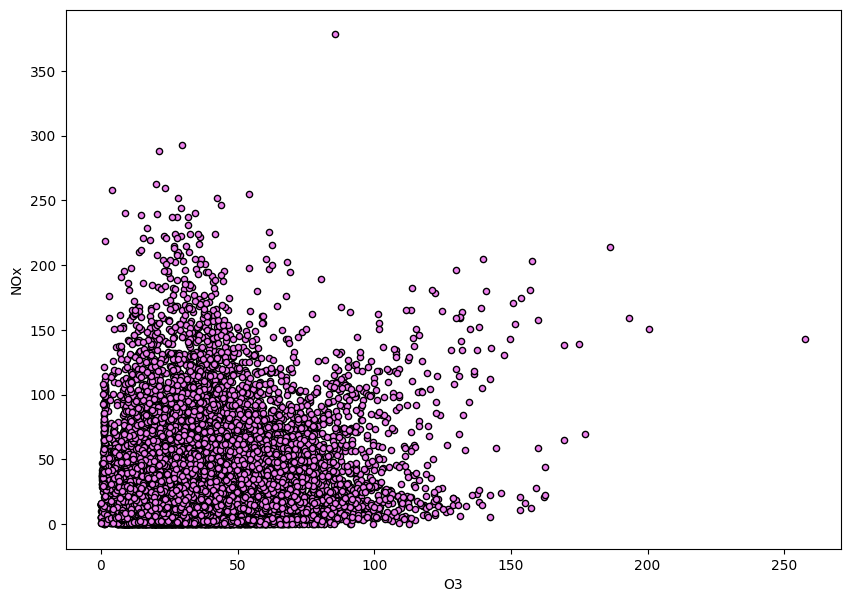

In [93]:
# Scatter Plot representation b/w columns : 'O3','NOx'.

df.plot(kind='scatter', x='O3', y='NOx', figsize=(10, 7), color='violet', edgecolor='black')

<Axes: xlabel='NOx', ylabel='Benzene'>

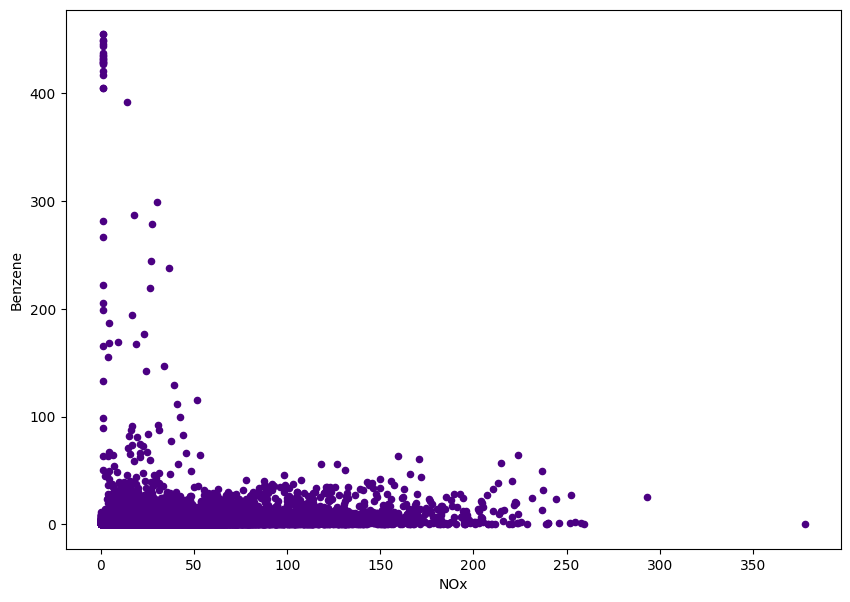

In [94]:
# Scatter Plot representation b/w columns : 'NOx','Benzene'.

df.plot(kind='scatter', x='NOx', y='Benzene', figsize=(10, 7), color='indigo')

<Axes: xlabel='Benzene', ylabel='Toluene'>

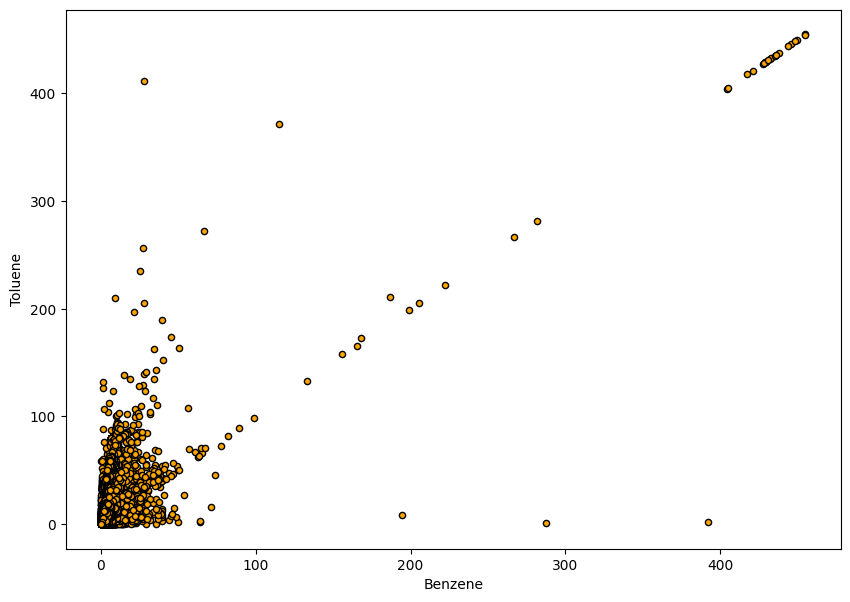

In [95]:
# Scatter Plot representation b/w columns : 'Benzene','Toluene'.

df.plot(kind='scatter', x='Benzene', y='Toluene', figsize=(10, 7), color='orange', edgecolor='black')

<Axes: xlabel='Toluene', ylabel='NH3'>

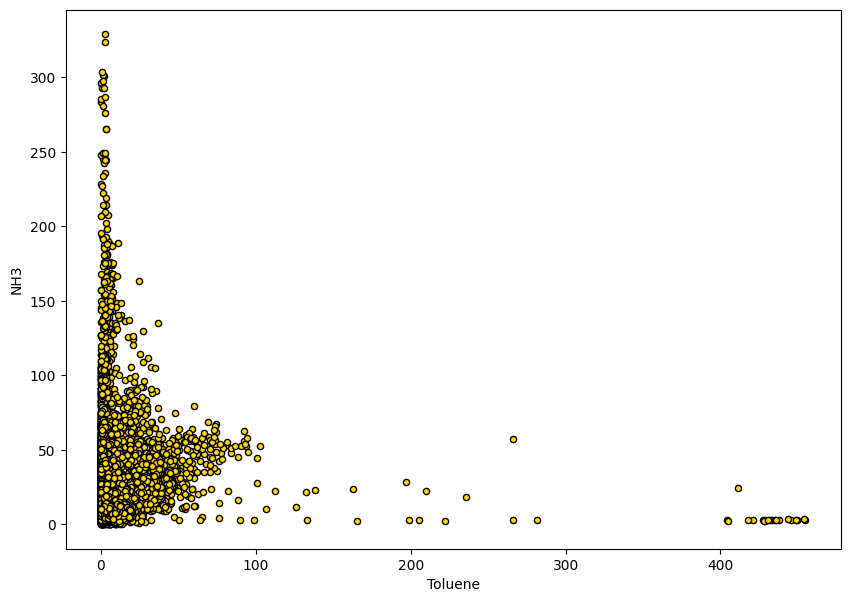

In [96]:
# Scatter Plot representation b/w columns : 'Toluene','NH3'.

df.plot(kind='scatter', x='Toluene', y='NH3', figsize=(10, 7), color='gold', edgecolor='black')

<Axes: xlabel='NH3', ylabel='PM10'>

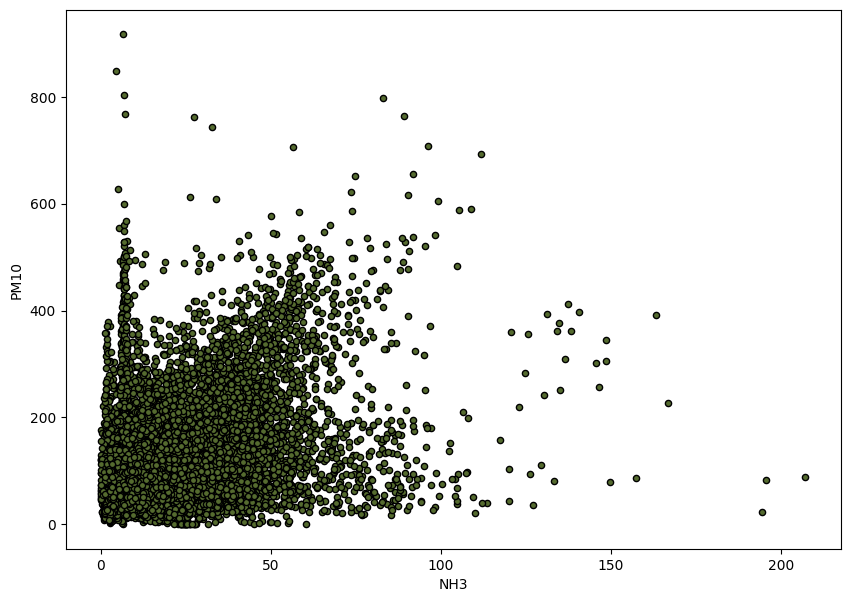

In [97]:
# Scatter Plot representation b/w columns : 'NH3','PM10'.

df.plot(kind='scatter', x='NH3', y='PM10', figsize=(10, 7), color='darkolivegreen', edgecolor='black')

<Axes: xlabel='PM10', ylabel='Xylene'>

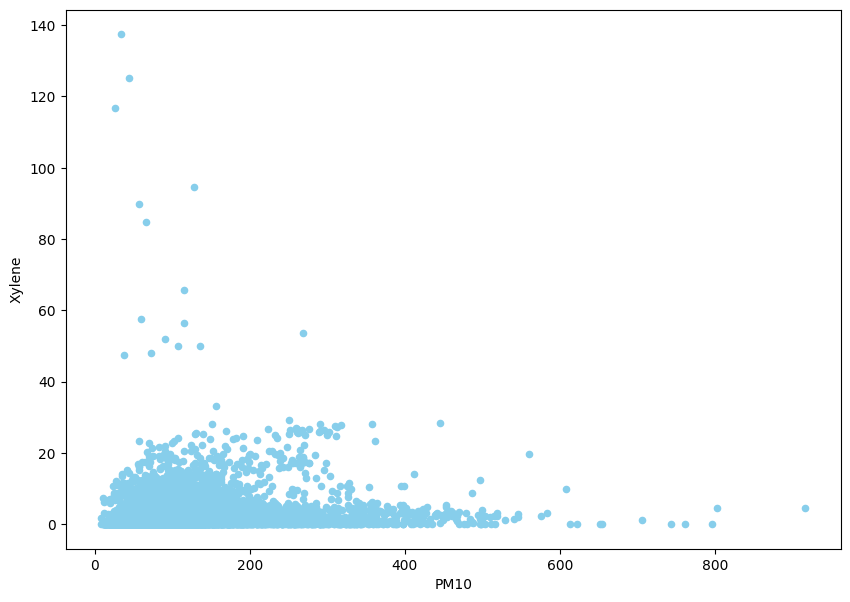

In [98]:
# Scatter Plot representation b/w columns : 'PM10','Xylene'.

df.plot(kind='scatter', x='PM10', y='Xylene', figsize=(10, 7), color='skyblue')

<Axes: xlabel='Xylene', ylabel='NO'>

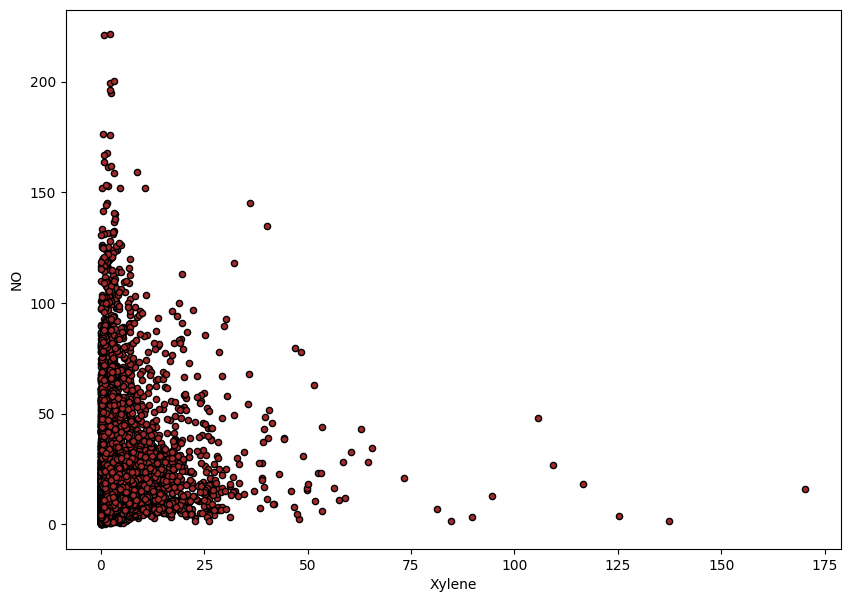

In [99]:
# Scatter Plot representation b/w columns : 'Xylene','NO'.

df.plot(kind='scatter', x='Xylene', y='NO', figsize=(10, 7), color='brown', edgecolor='black')

**DISTRIBUTION PLOT** : A distribution plot visualizes the distribution of a continuous variable, showing the frequency or probability density of data values. It's commonly used to understand the underlying patterns, such as skewness, kurtosis, or bimodal behavior.

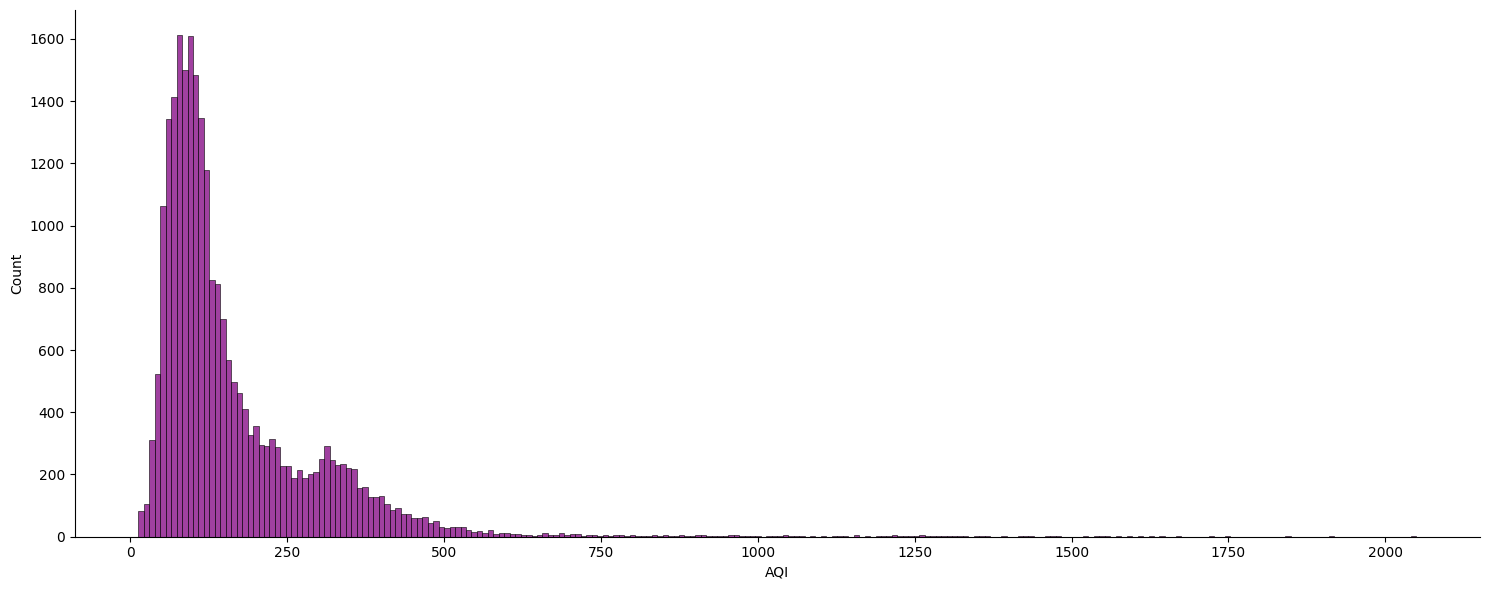

In [100]:
# Distribution Plot for 'AQI'.

sns.displot(df, x="AQI", height=6, aspect=2.5, color="purple")
plt.show()

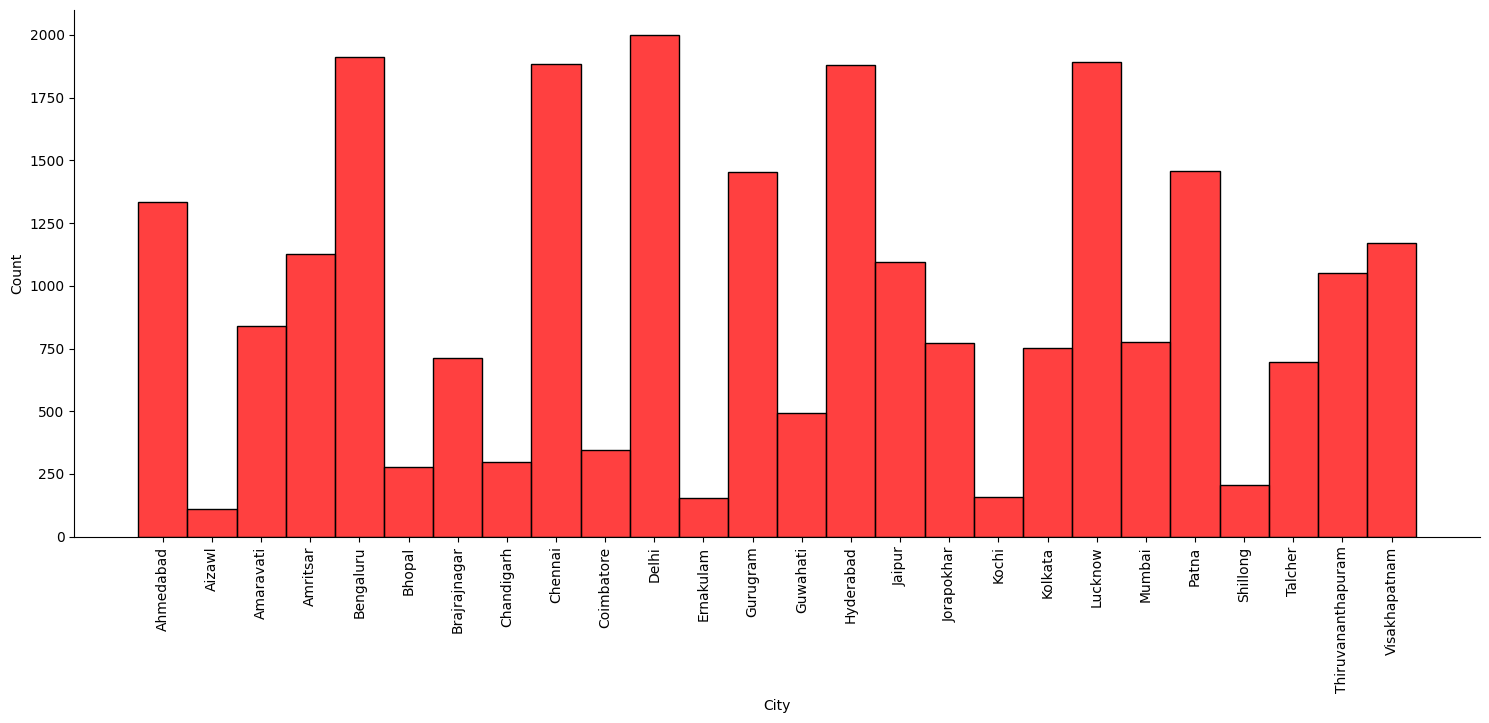

In [101]:
# Distribution Plot for 'City'.

sns.displot(df, x="City", height=6, aspect=2.5, color="red")
plt.xticks(rotation=90)
plt.show()

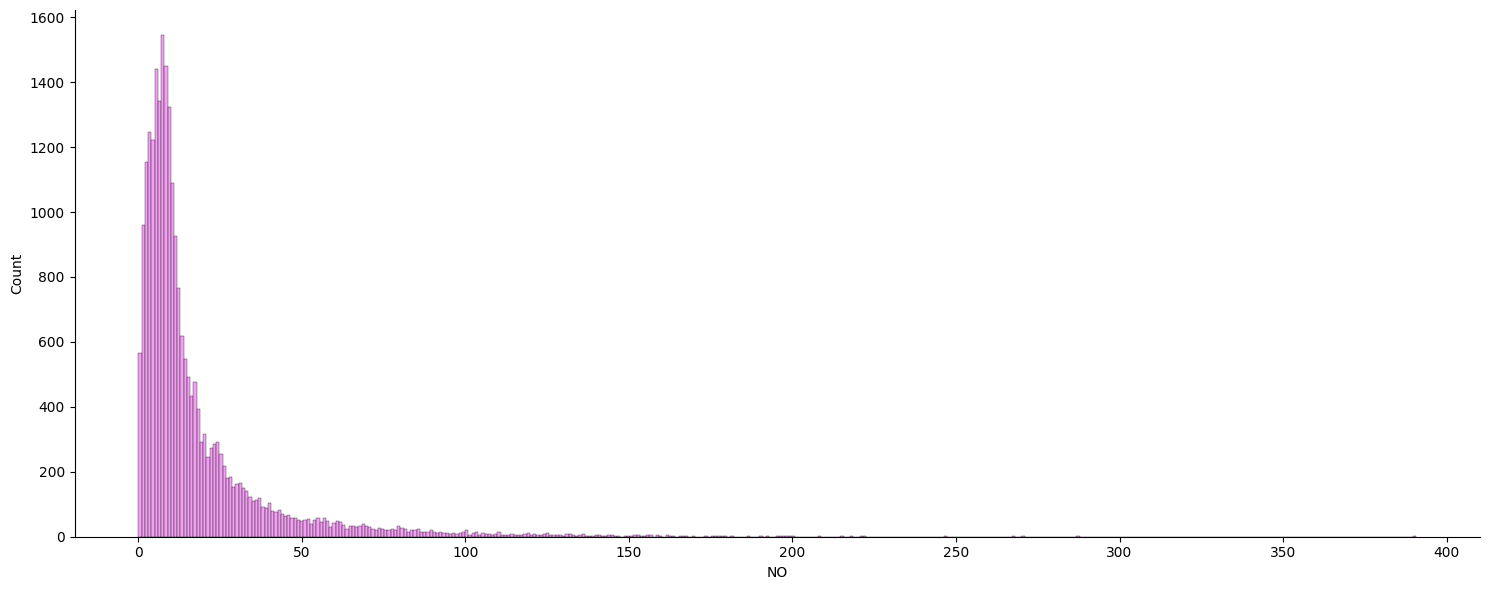

In [102]:
# Distribution Plot for 'NO'.

sns.displot(df, x="NO", height=6, aspect=2.5, color="violet")
plt.show()

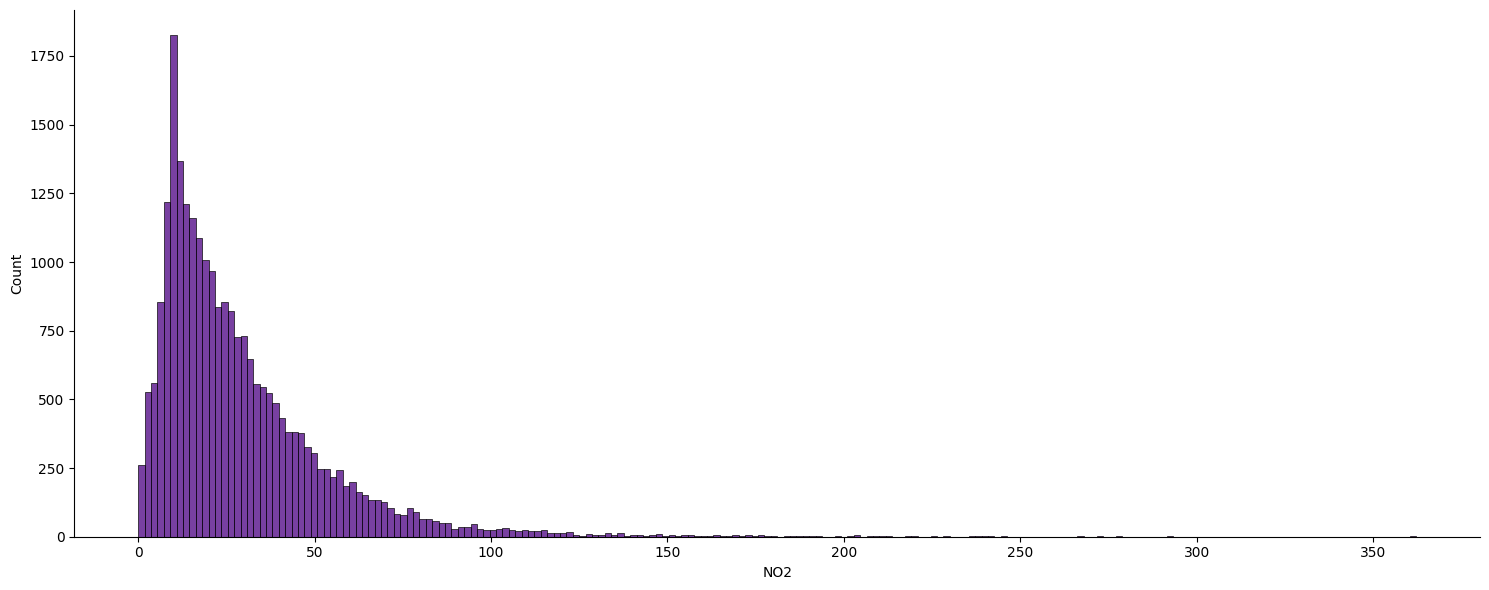

In [103]:
# Distribution Plot for 'NO2'.

sns.displot(df, x="NO2", height=6, aspect=2.5, color="indigo")
plt.show()

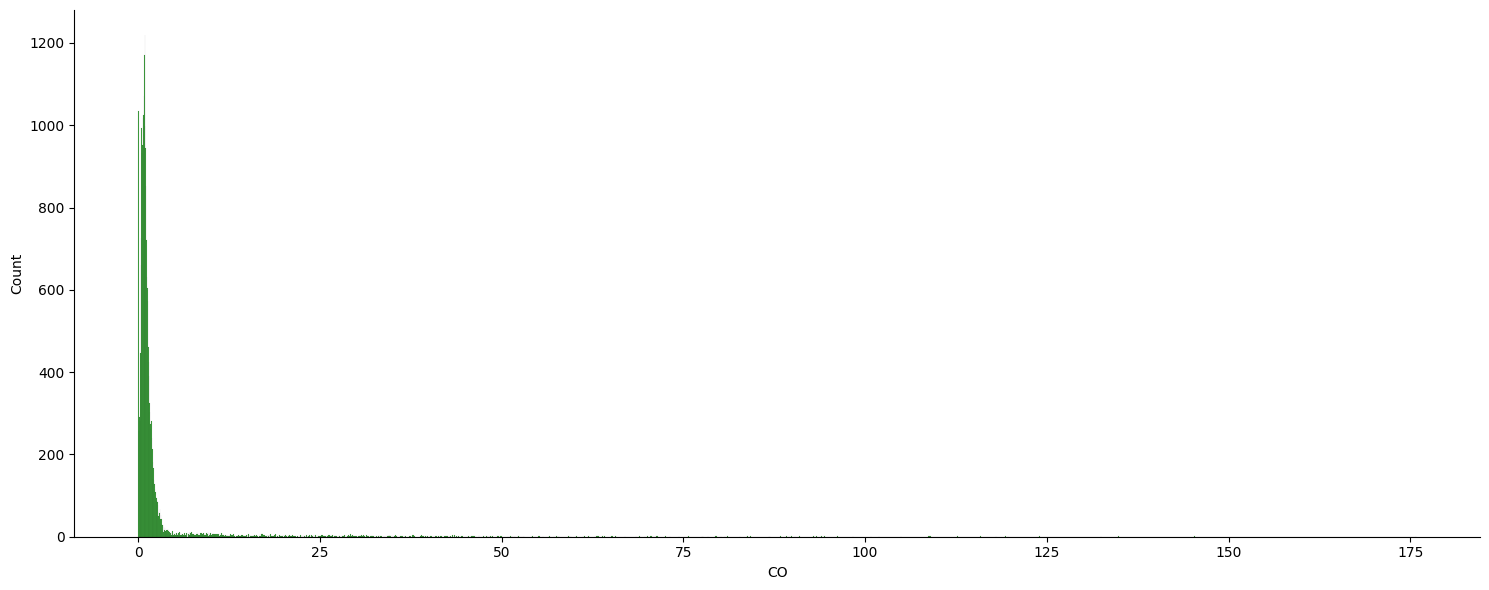

In [104]:
# Distribution Plot for 'CO'.

sns.displot(df, x="CO", height=6, aspect=2.5, color="green")
plt.show()

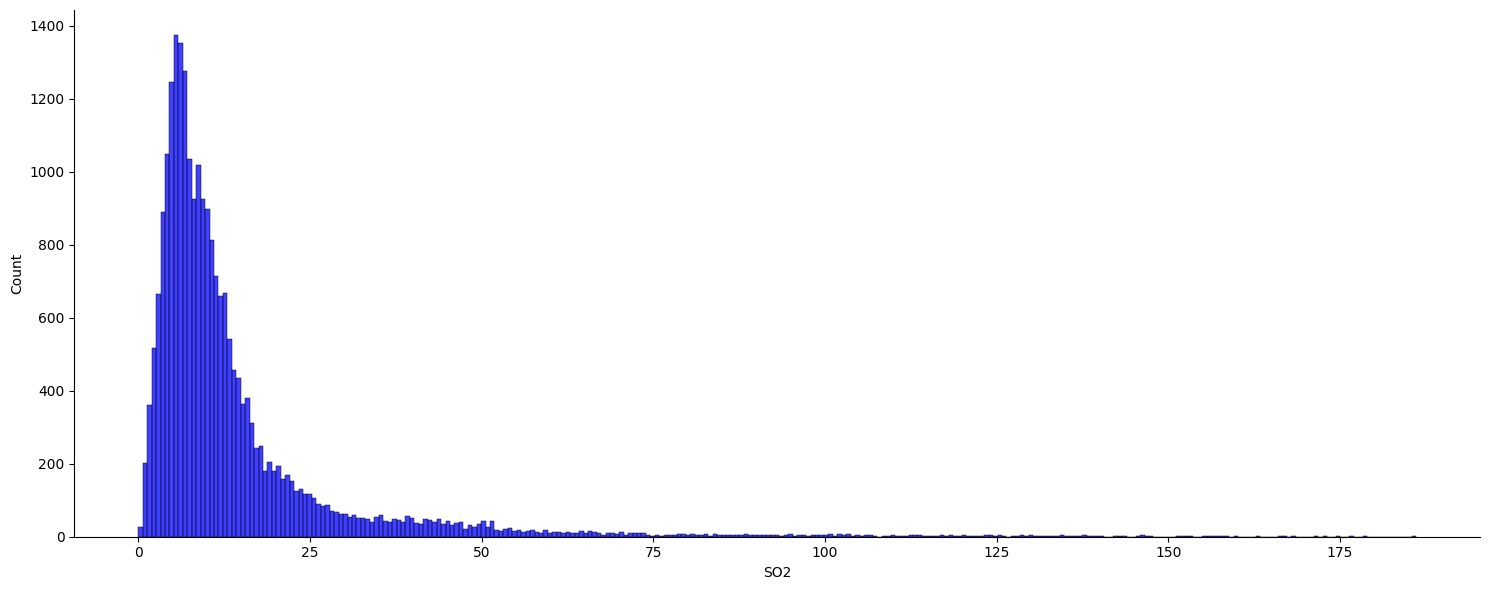

In [105]:
# Distribution Plot for 'SO2'.

sns.displot(df, x="SO2", height=6, aspect=2.5, color="blue")
plt.show()

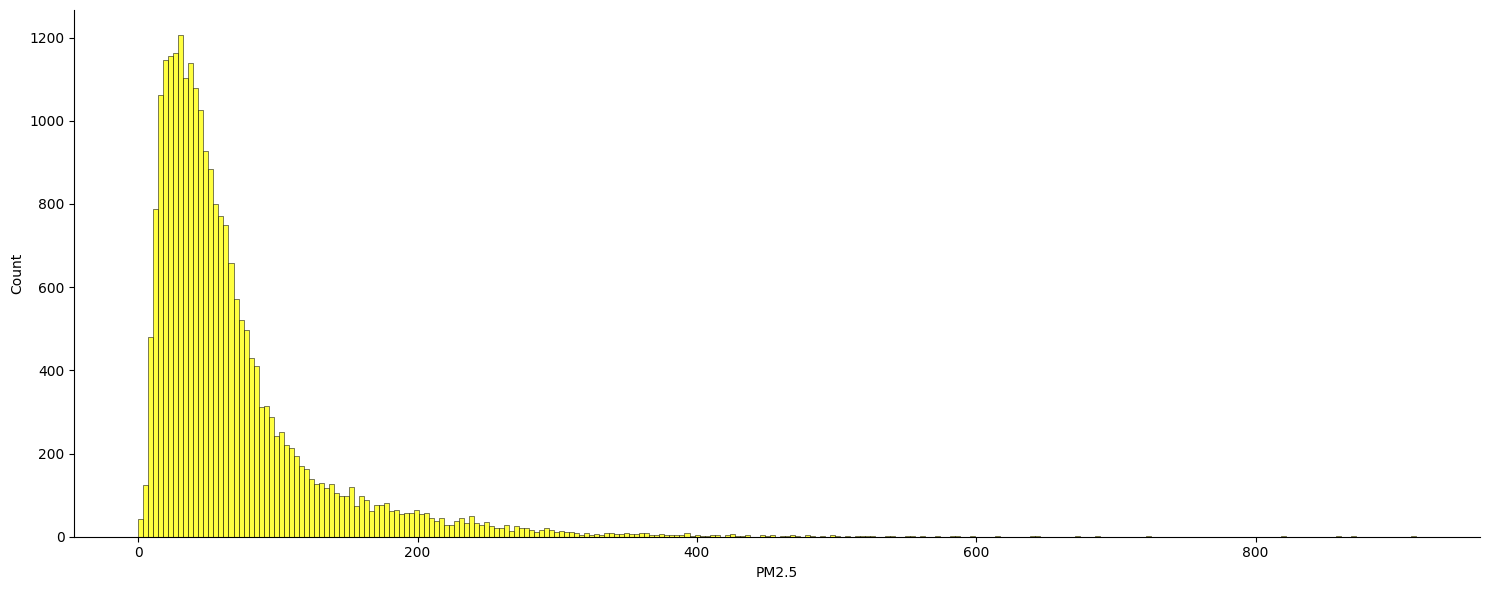

In [106]:
# Distribution Plot for 'PM2.5'.

sns.displot(df, x="PM2.5", height=6, aspect=2.5, color="yellow")
plt.show()

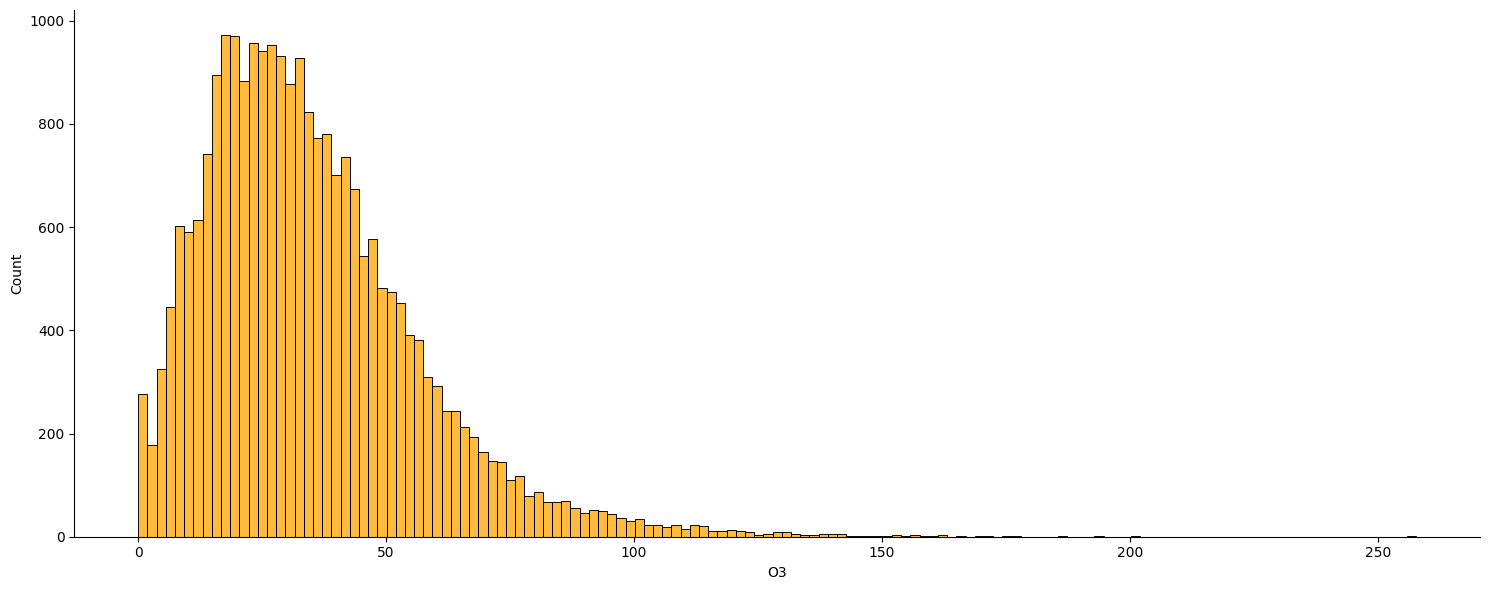

In [107]:
# Distribution Plot for 'O3'.

sns.displot(df, x="O3", height=6, aspect=2.5, color="orange")
plt.show()

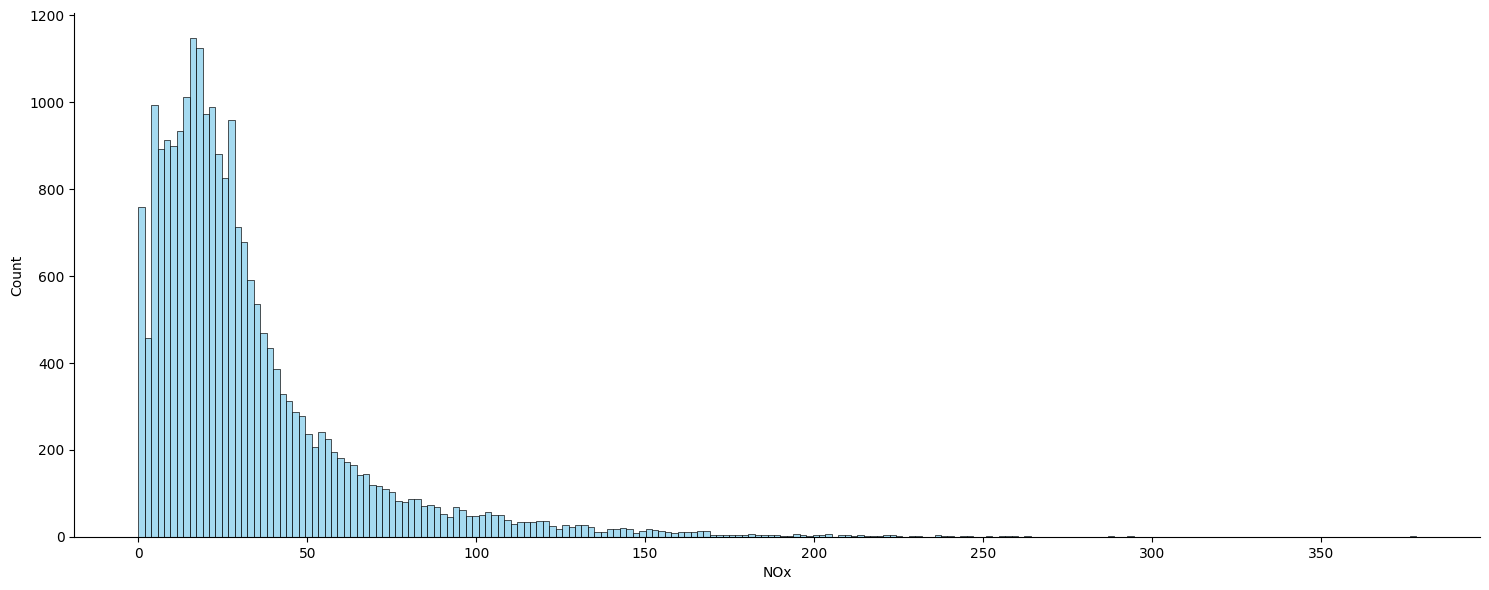

In [108]:
# Distribution Plot for 'NOx'.

sns.displot(df, x="NOx", height=6, aspect=2.5, color="skyblue")
plt.show()

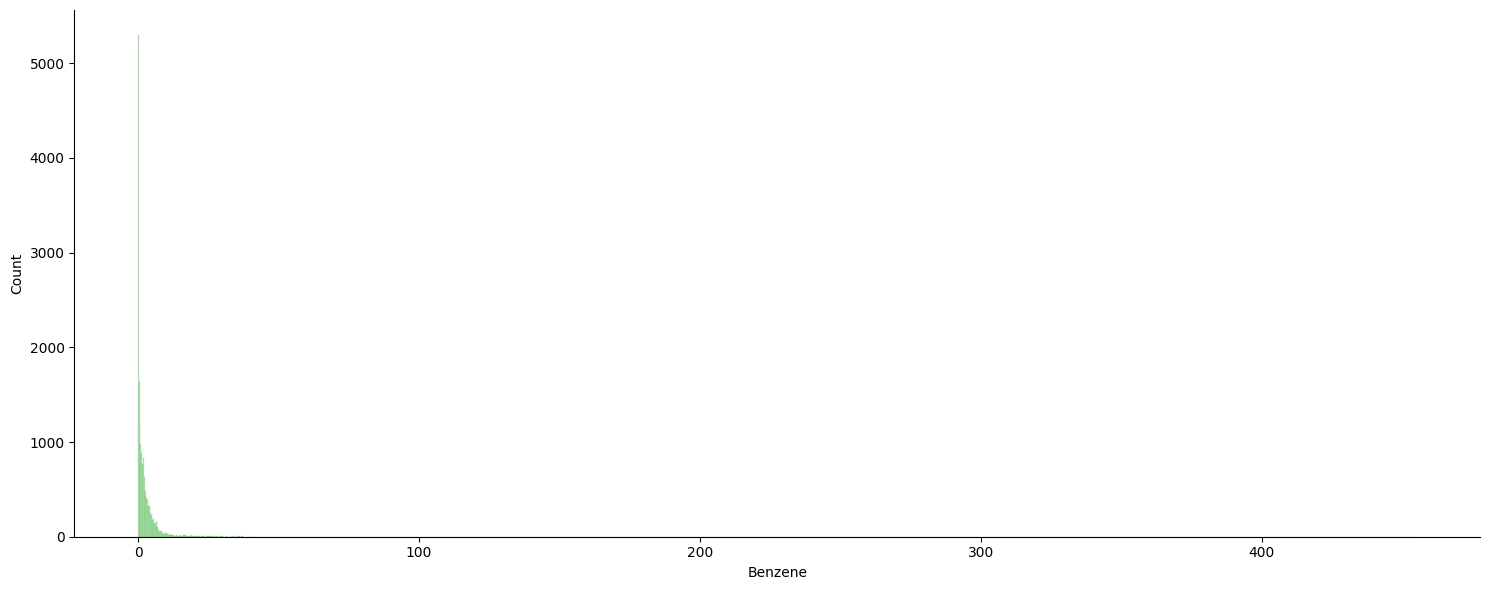

In [109]:
# Distribution Plot for 'Benzene'.

sns.displot(df, x="Benzene", height=6, aspect=2.5, color="lightgreen")
plt.show()

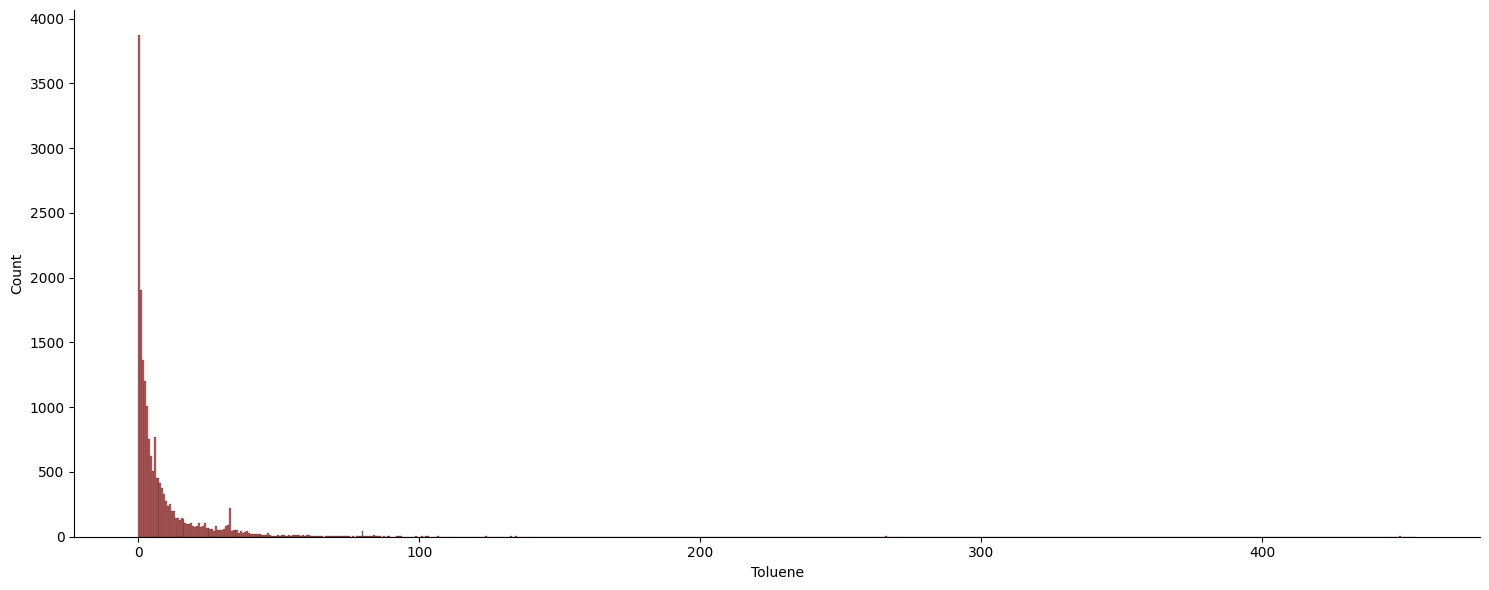

In [110]:
# Distribution Plot for 'Toluene'.

sns.displot(df, x="Toluene", height=6, aspect=2.5, color="brown")
plt.show()

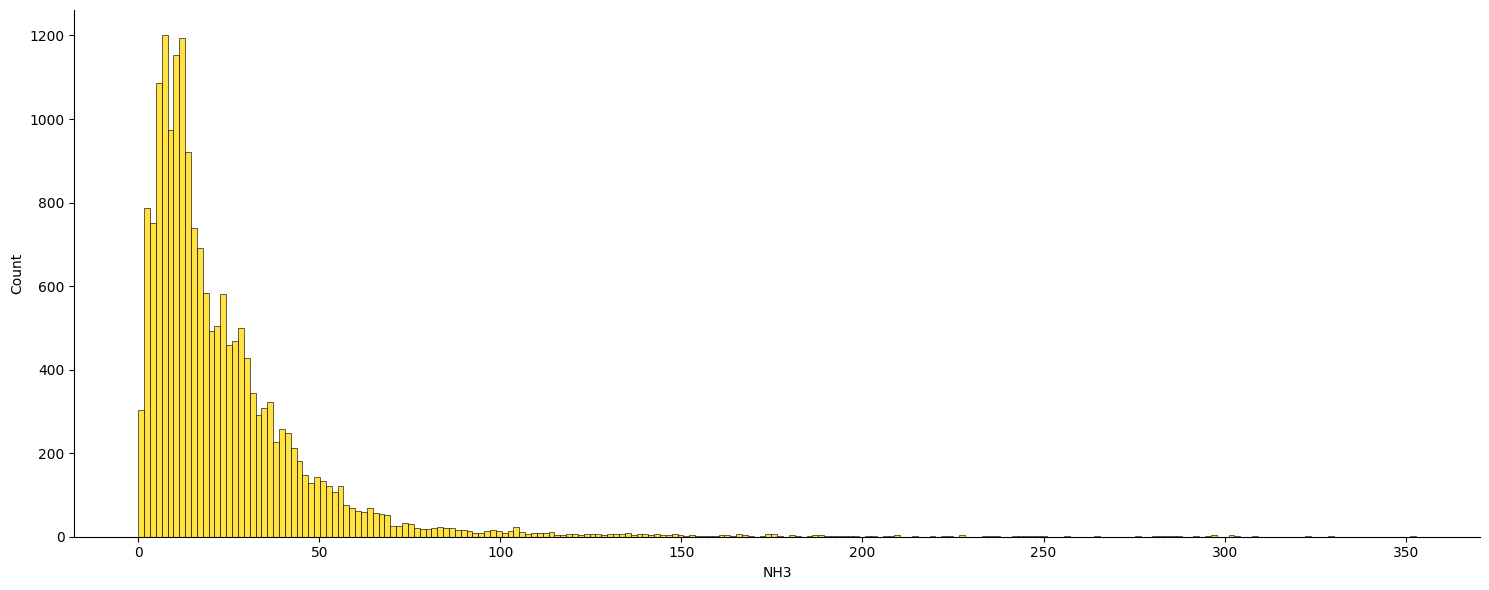

In [111]:
# Distribution Plot for 'NH3'.

sns.displot(df, x="NH3", height=6, aspect=2.5, color="gold")
plt.show()

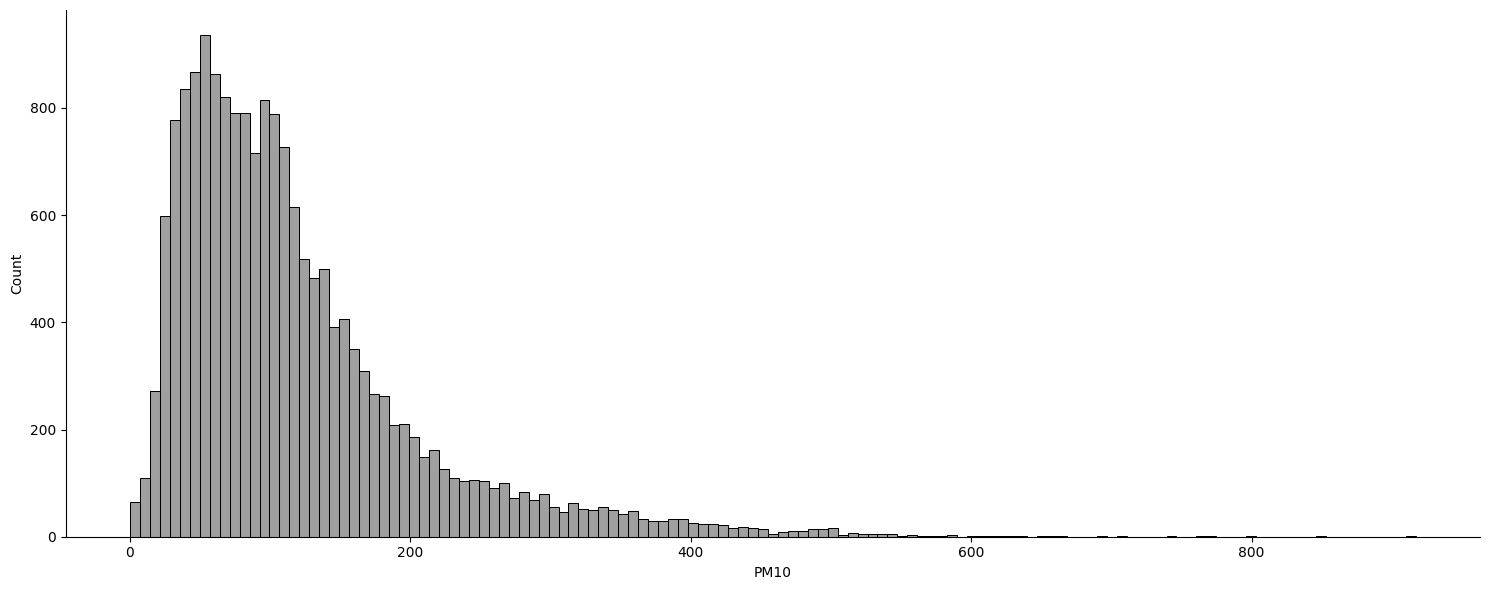

In [112]:
# Distribution Plot for 'PM10'.

sns.displot(df, x="PM10", height=6, aspect=2.5, color="gray")
plt.show()

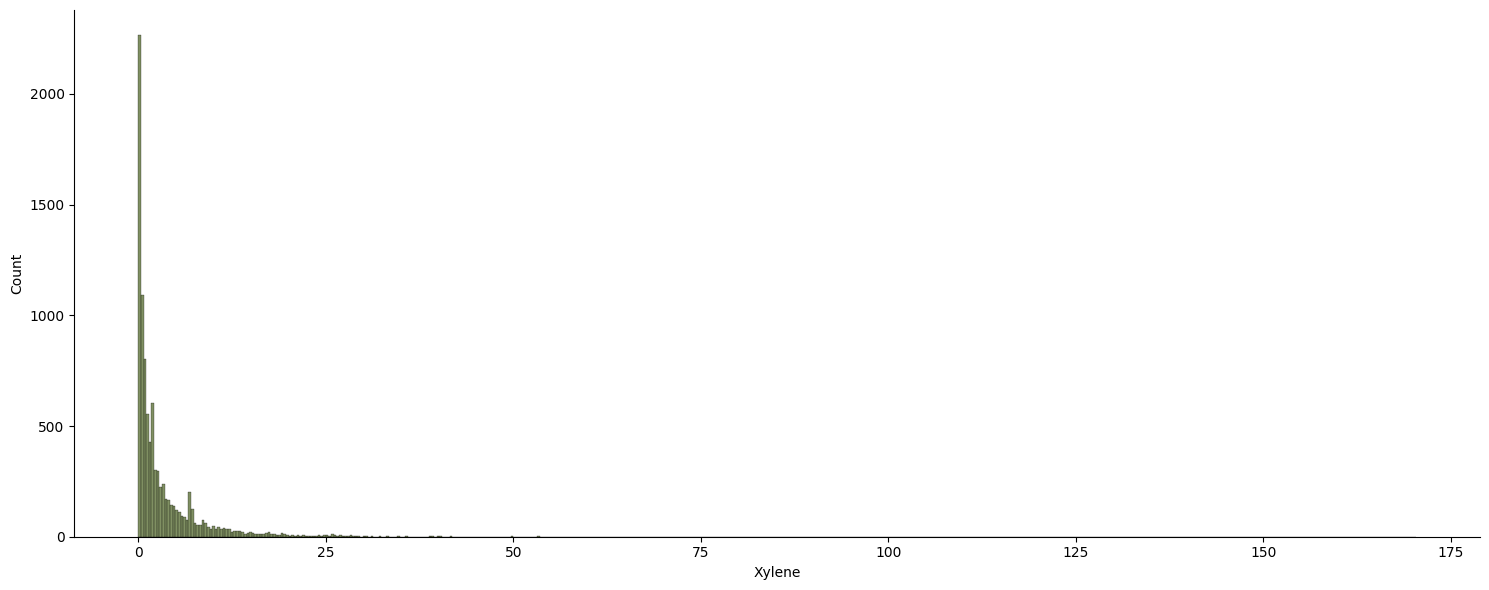

In [113]:
# Distribution Plot for 'Xylene'.

sns.displot(df, x="Xylene", height=6, aspect=2.5, color="darkolivegreen")
plt.show()

BIVARIATE ANALYSIS

**CATPLOT** : In Seaborn, catplot is a versatile function used to create categorical plots. It allows you to visualize the relationship between a categorical variable and one or more numeric variables.

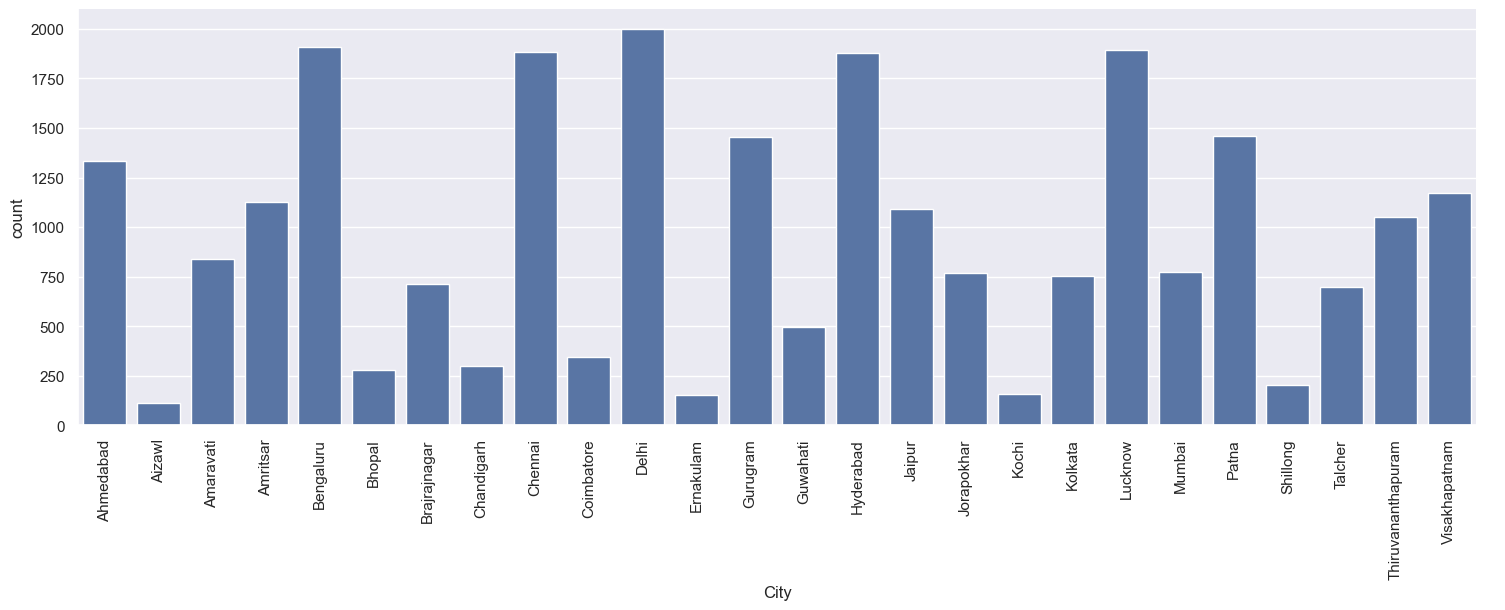

In [114]:
# CatPlot representation for 'City'.

sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

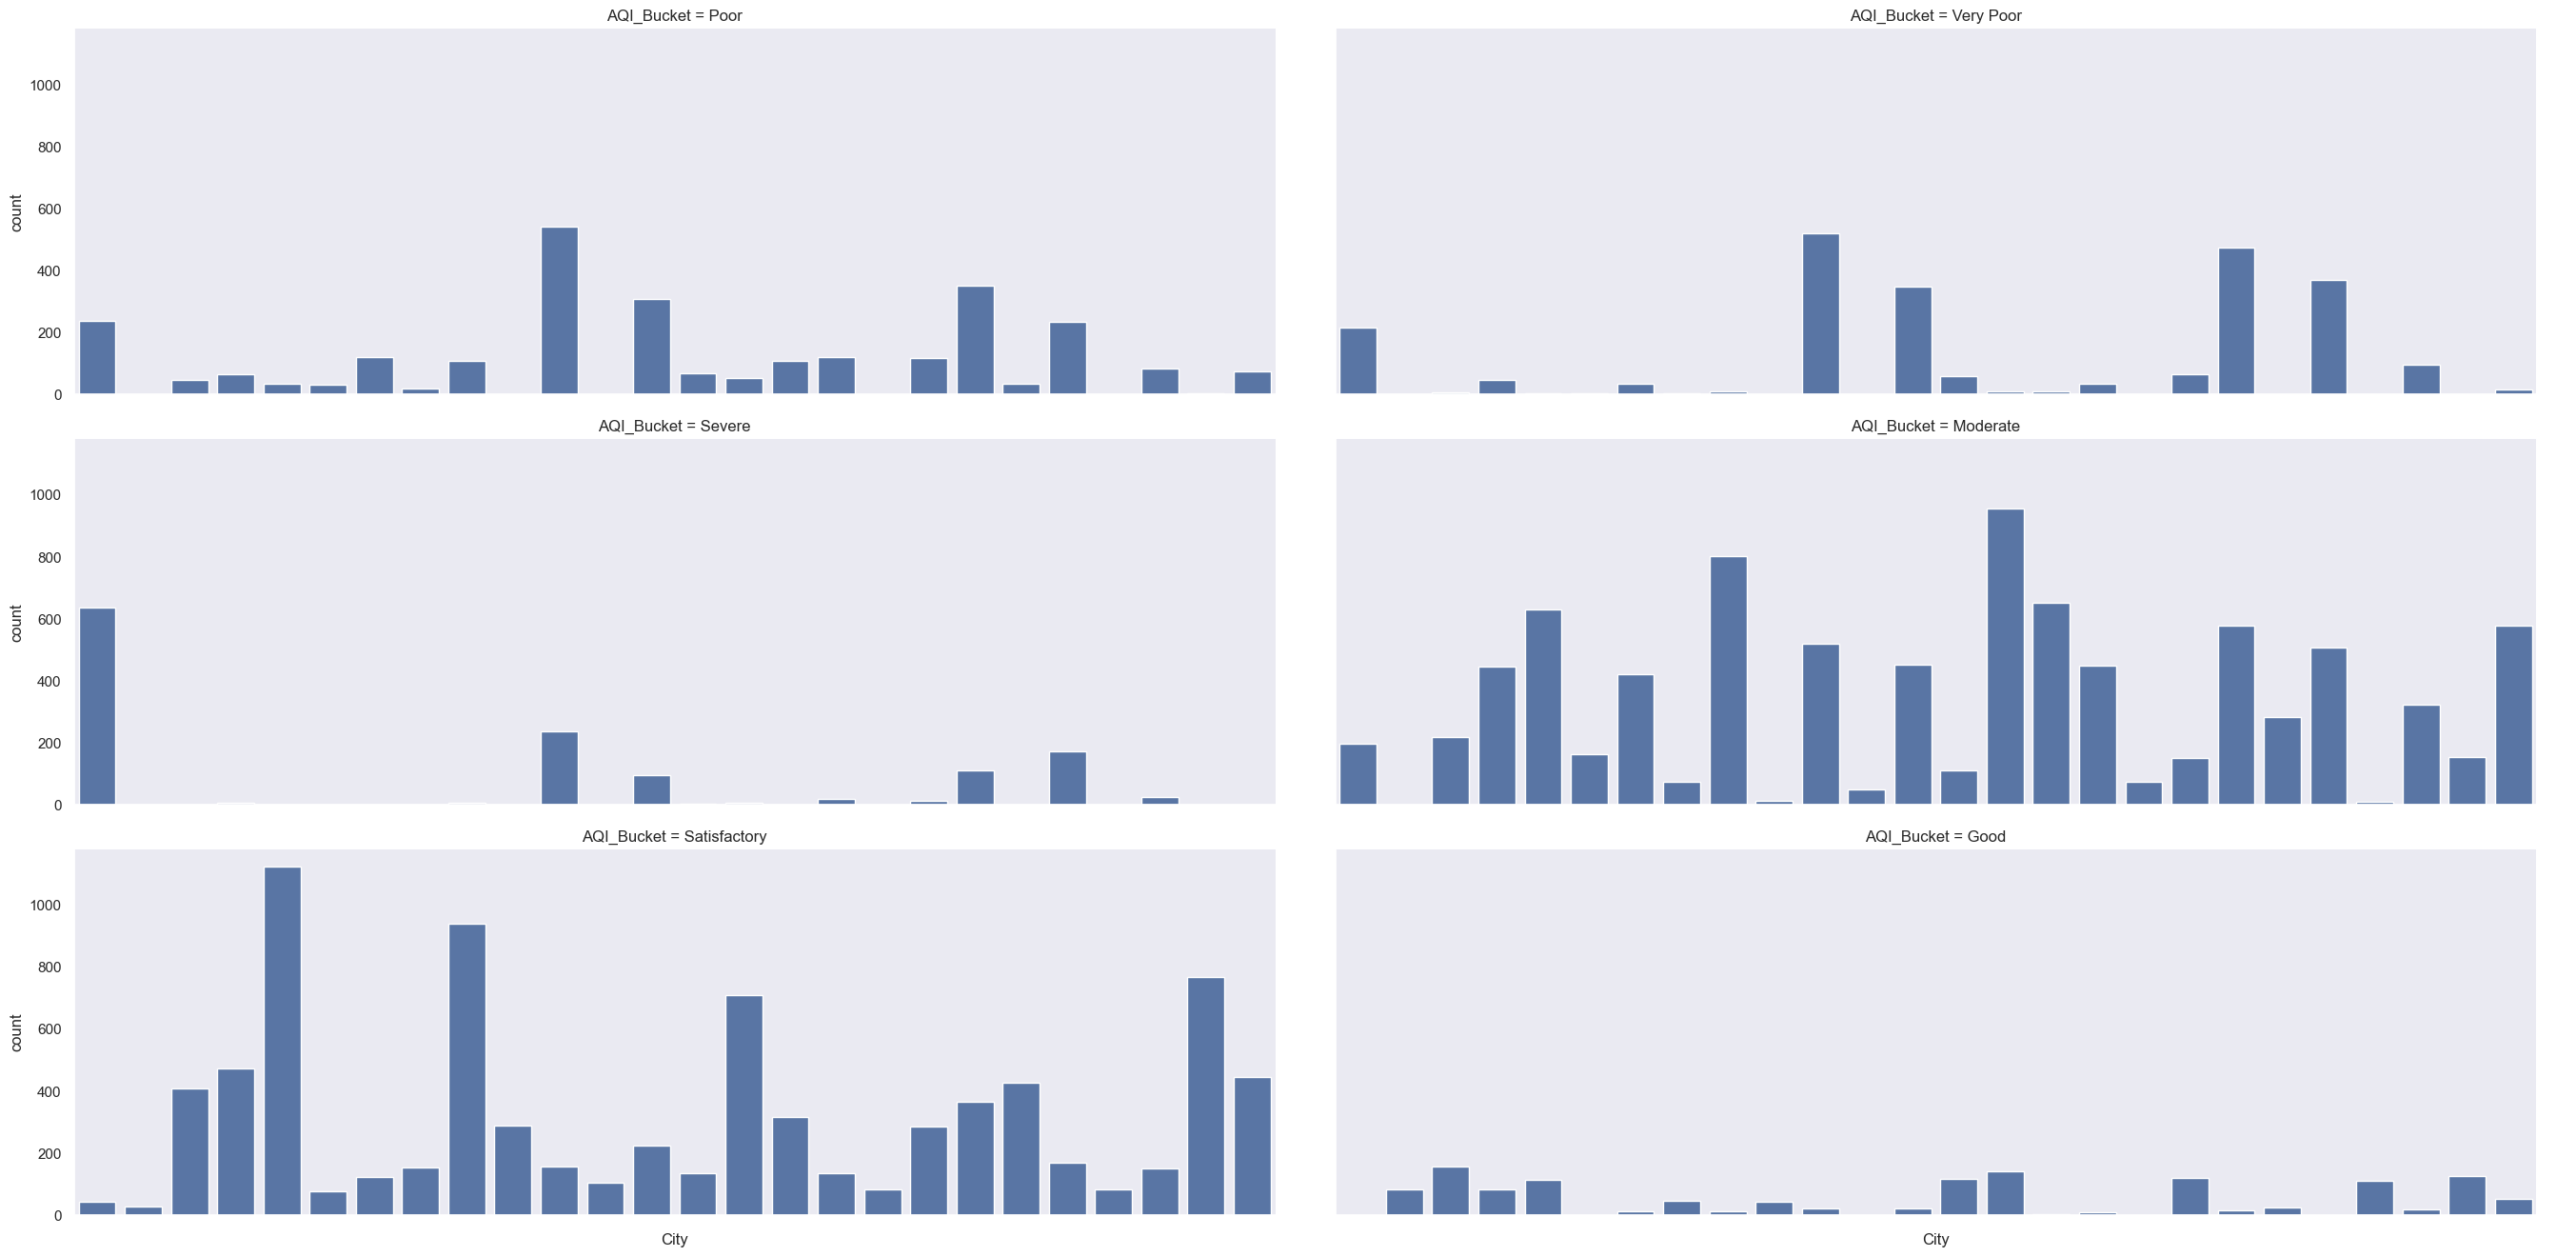

In [115]:
# CatPlot representation of 'City' for 'AQI_Bucket' data.
# In the below plot, we can see the frequency of all the city types for different "AQI_Bucket" variable, which are categorized as "Poor", "Very Poor", "Severe", "Moderate", "Satisfactory", "Good".
sns.set(style="dark")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=4.5,aspect=3)
graph.set_xticklabels(rotation=90)

**BOX PLOT** : A box plot is a graphical representation of the distribution of a dataset. It shows the median, quartiles, and potential outliers, helping to identify spread and skewness.

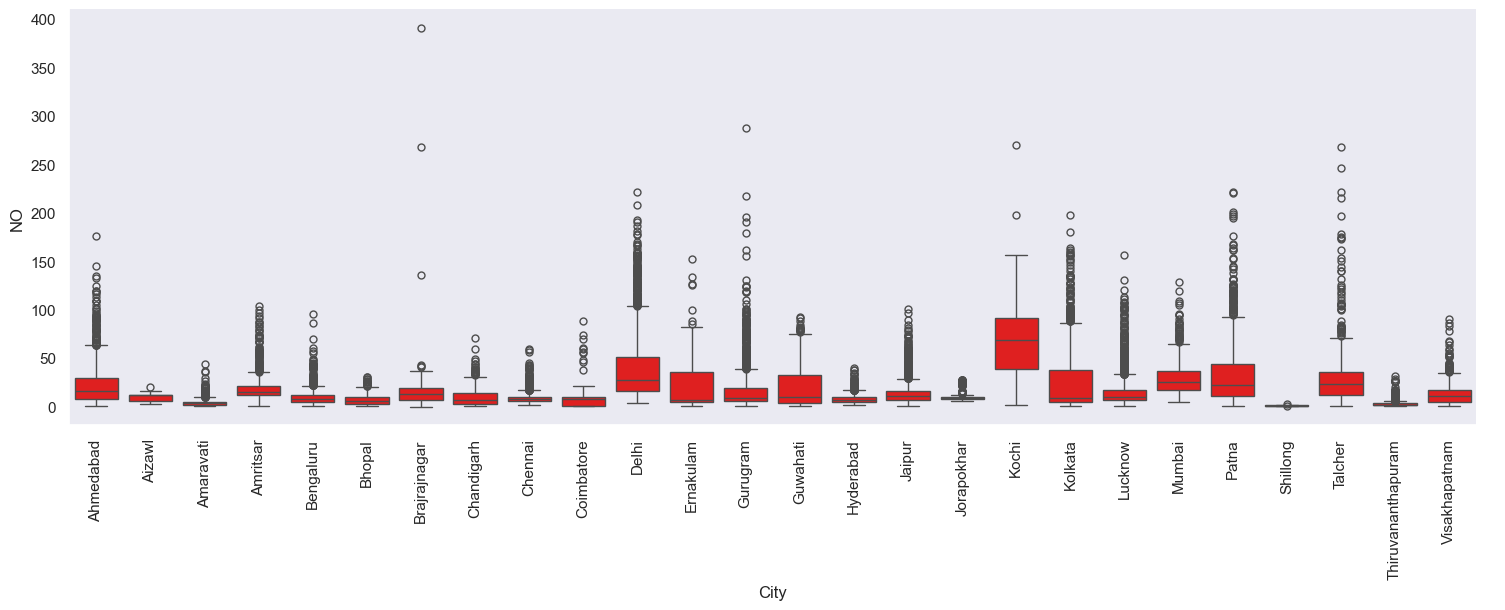

In [116]:
# Box Plot represetation for 'NO'. 

graph1=sns.catplot(x="City",y="NO",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

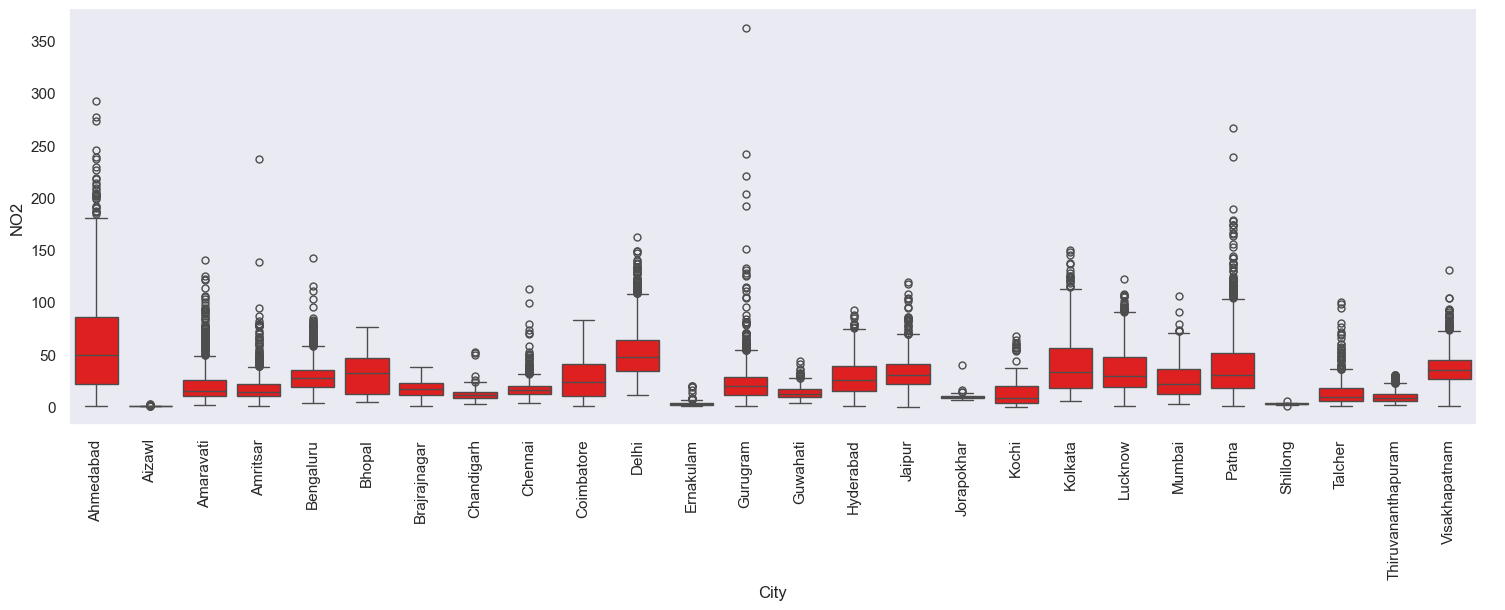

In [117]:
# Box Plot represetation for 'NO2'.
  
graph1=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

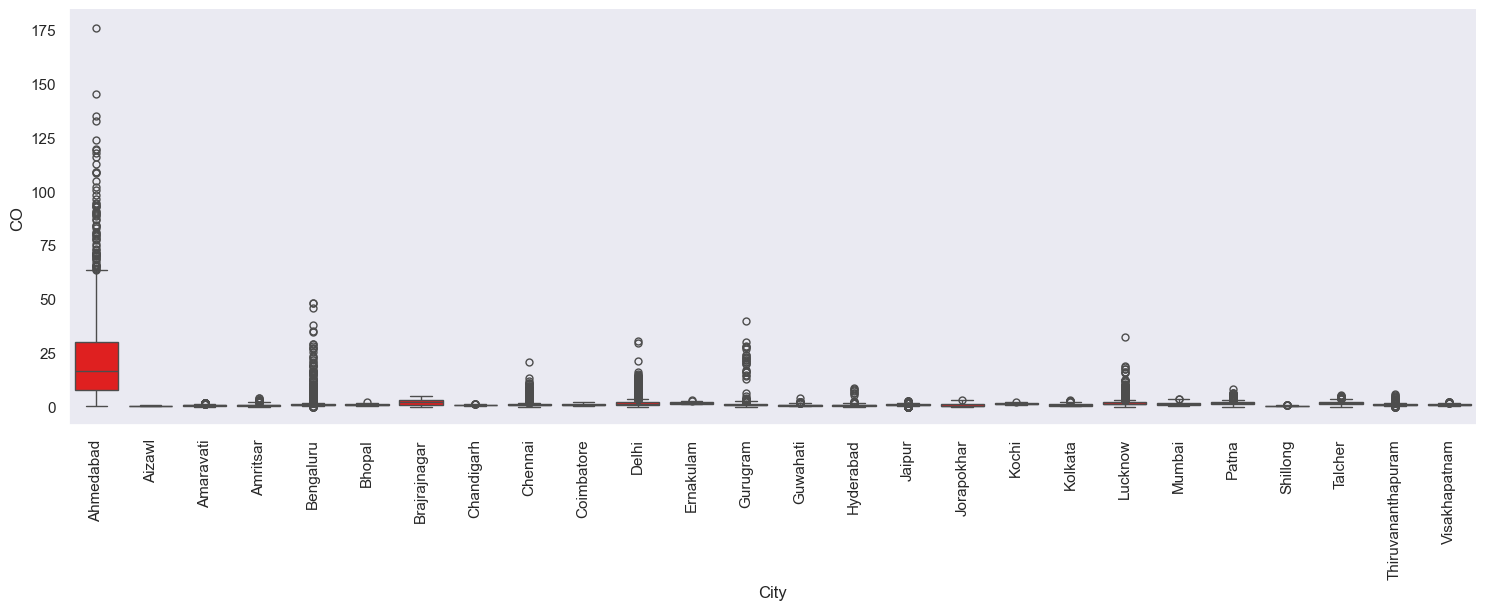

In [118]:
# Box Plot represetation for 'CO'.
 
graph1=sns.catplot(x="City",y="CO",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

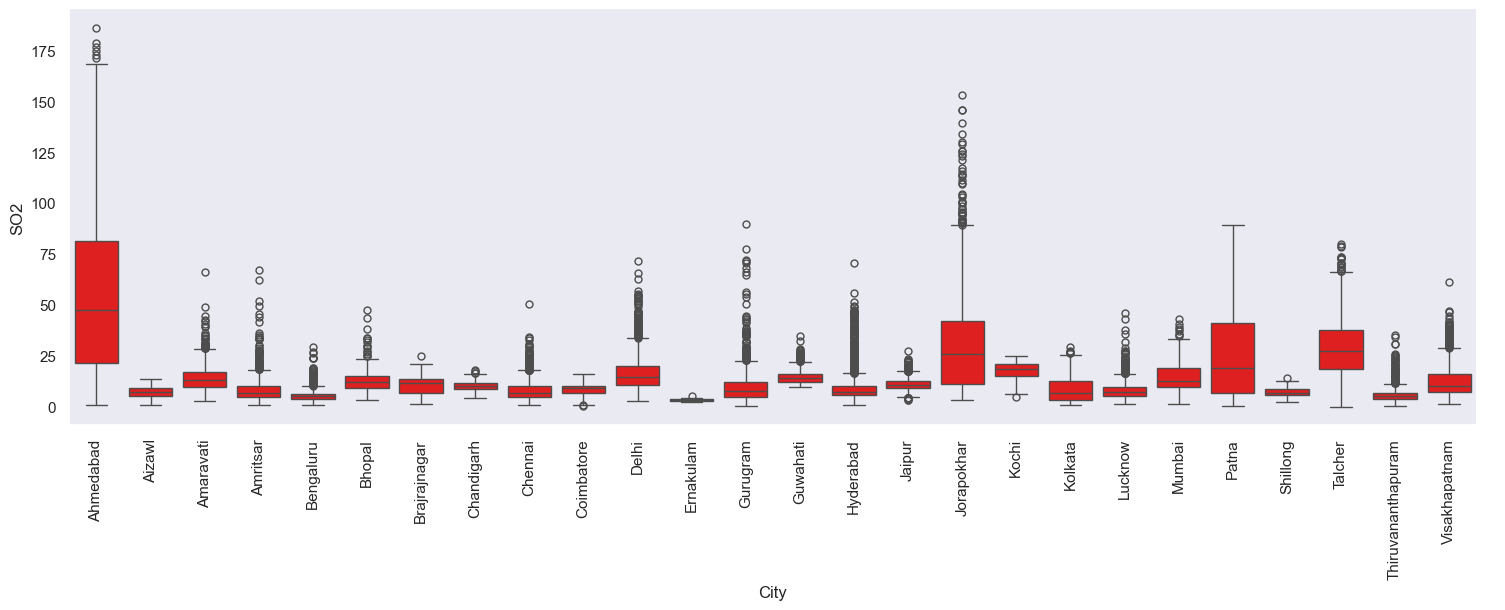

In [119]:
# Box Plot represetation for 'SO2'.
 
graph1=sns.catplot(x="City",y="SO2",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

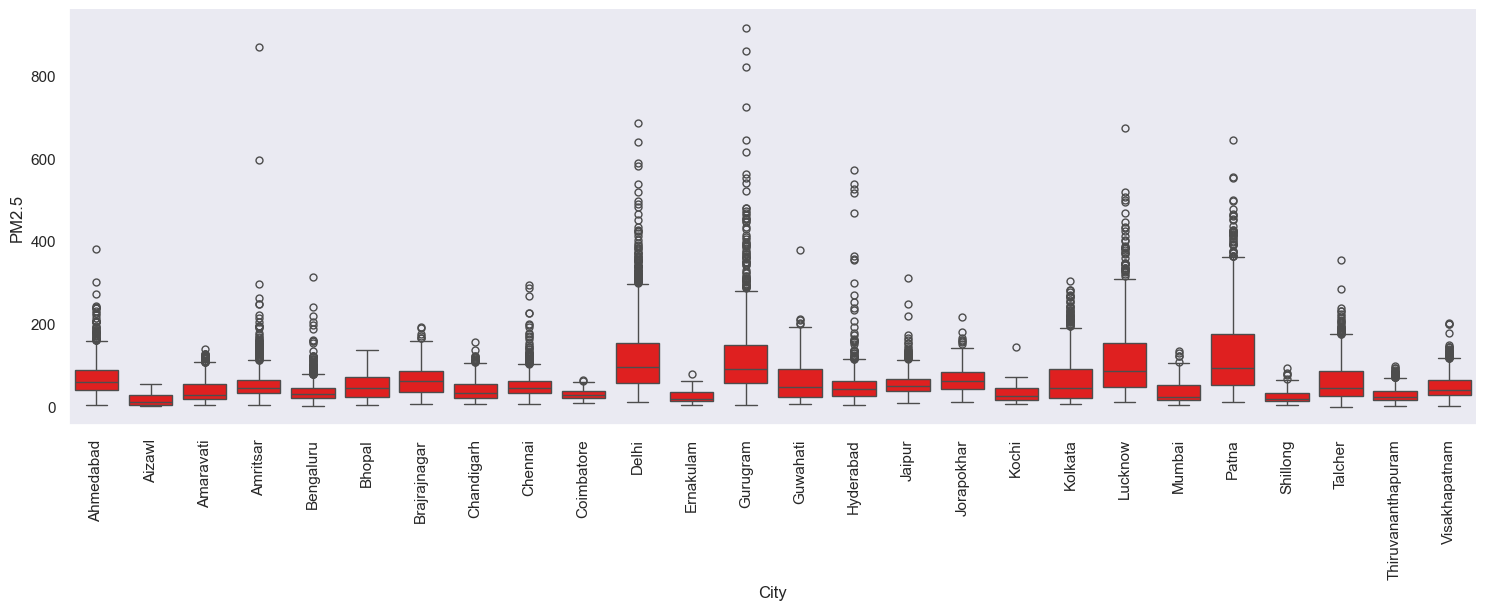

In [120]:
# Box Plot represetation for 'PM2.5'.

graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

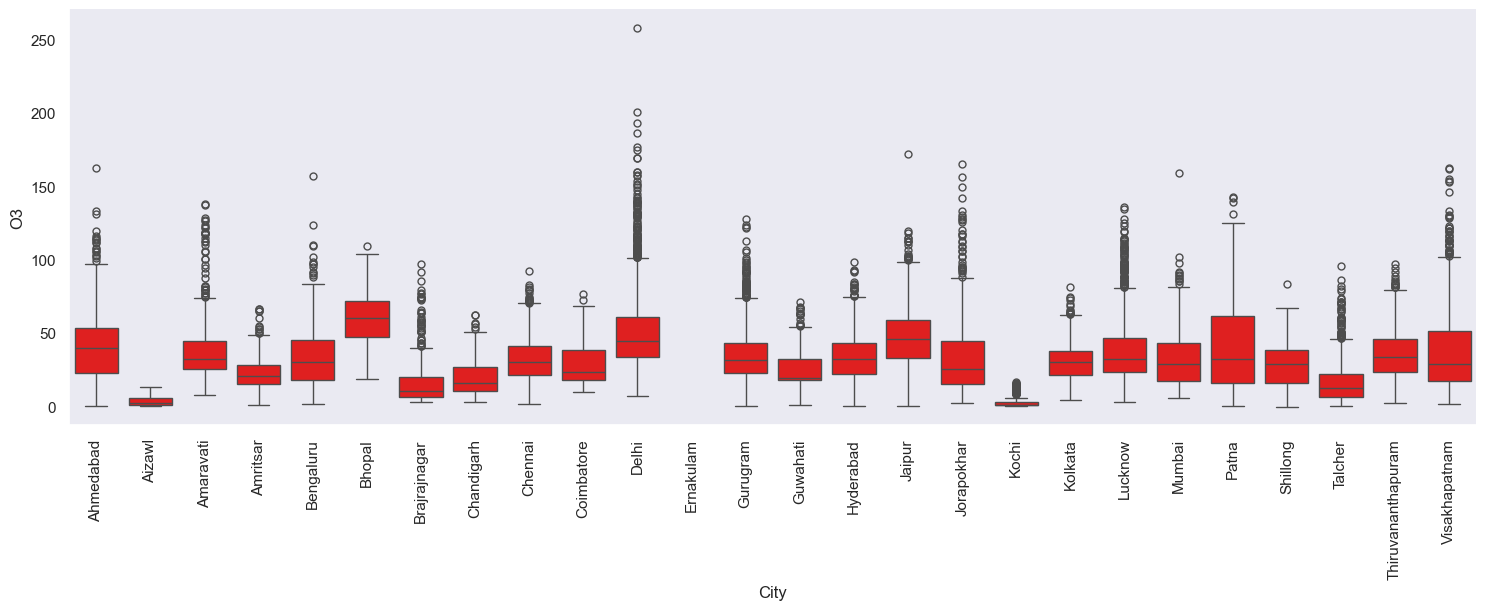

In [121]:
# Box Plot represetation for 'O3'.

graph1=sns.catplot(x="City",y="O3",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

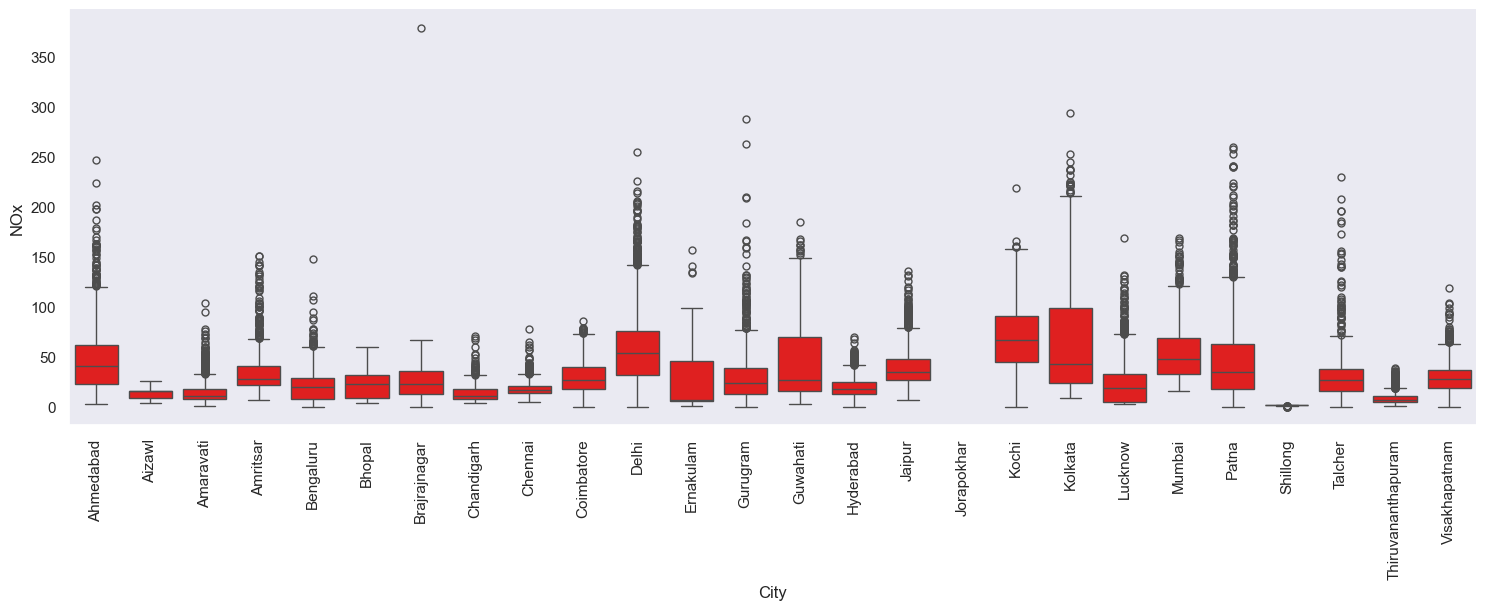

In [122]:
# Box Plot represetation for 'NOx'.

graph1=sns.catplot(x="City",y="NOx",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

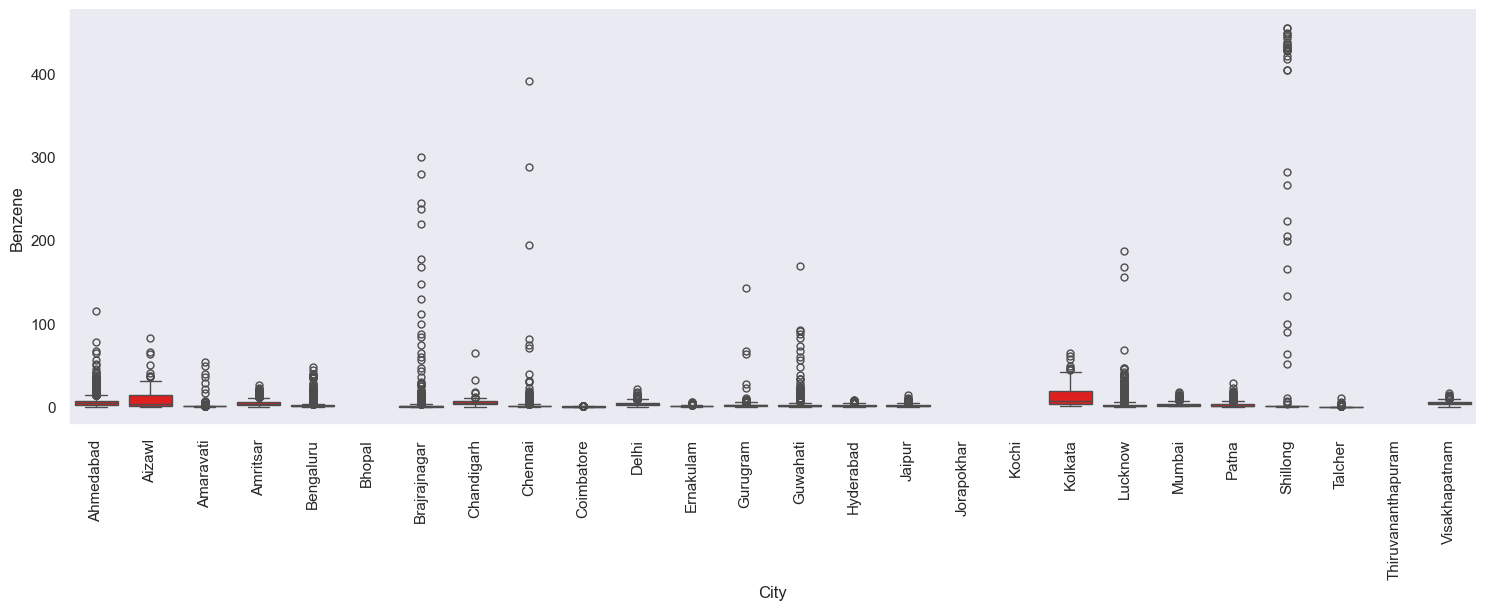

In [123]:
# Box Plot represetation for 'Benzene'.

graph1=sns.catplot(x="City",y="Benzene",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

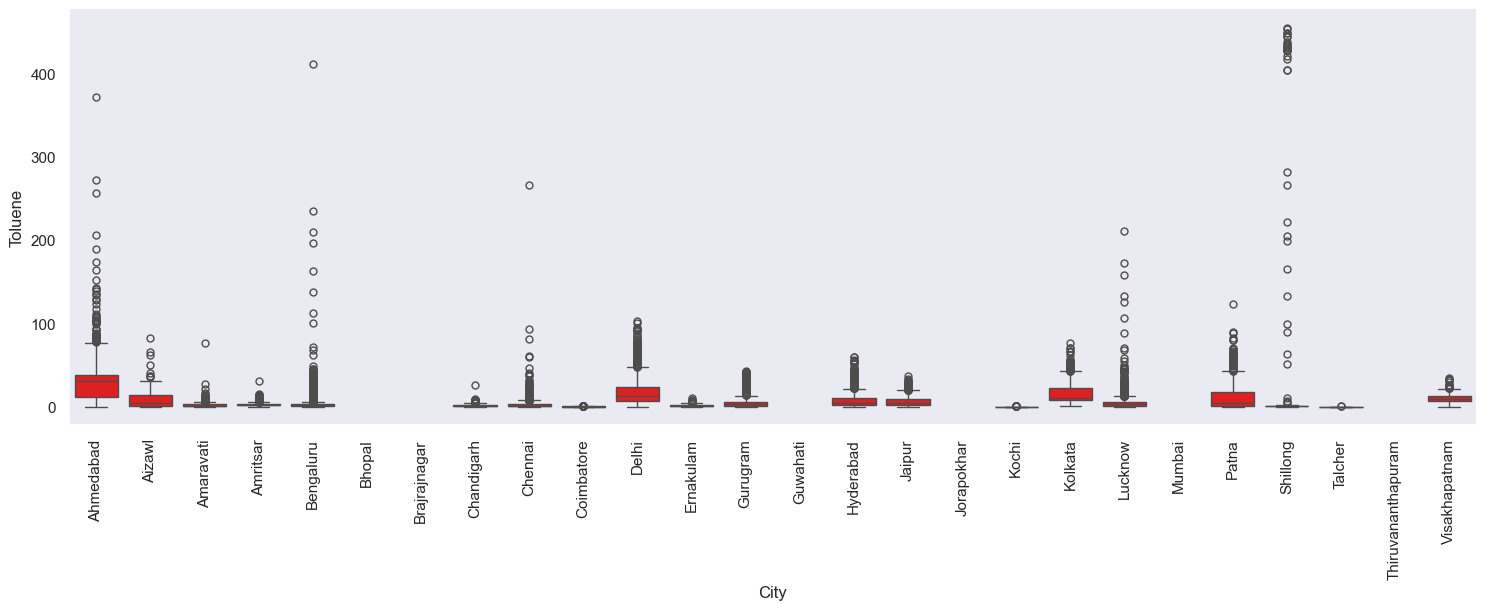

In [124]:
# Box Plot represetation for 'Toluene'.

graph1=sns.catplot(x="City",y="Toluene",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

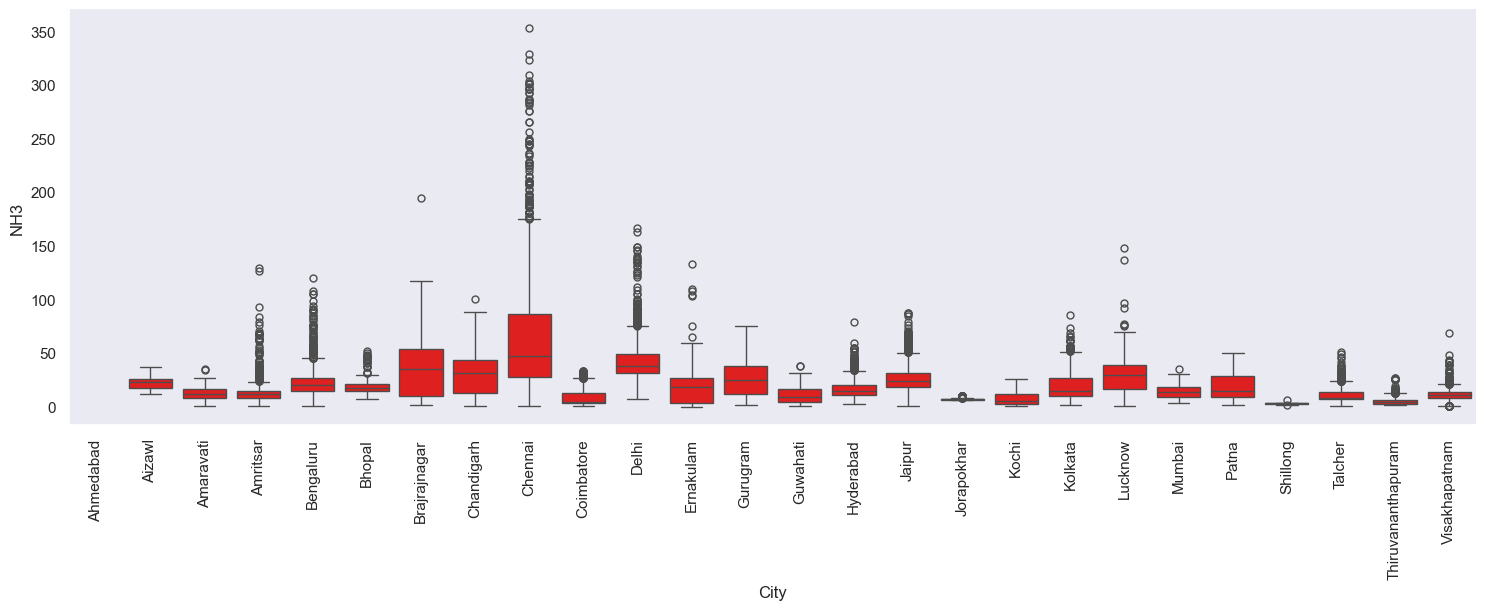

In [125]:
# Box Plot represetation for 'NH3'.
 
graph1=sns.catplot(x="City",y="NH3",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

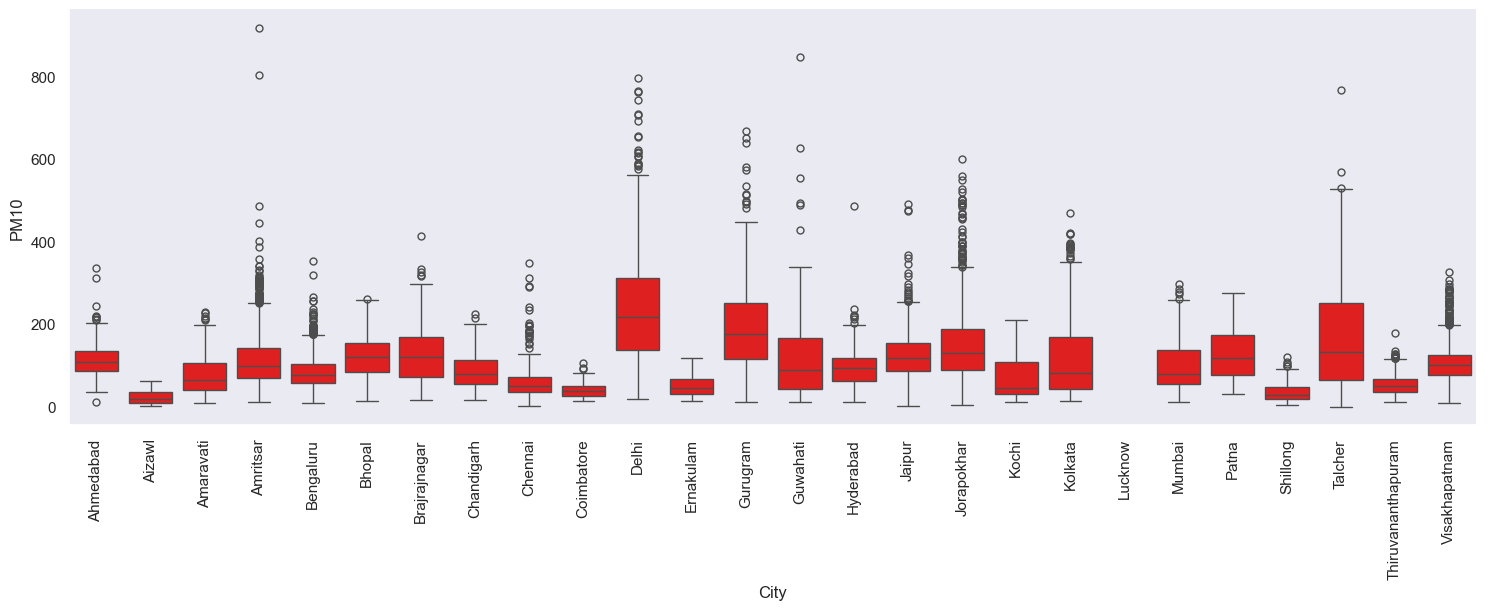

In [126]:
# Box Plot represetation for 'PM10'.

graph1=sns.catplot(x="City",y="PM10",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

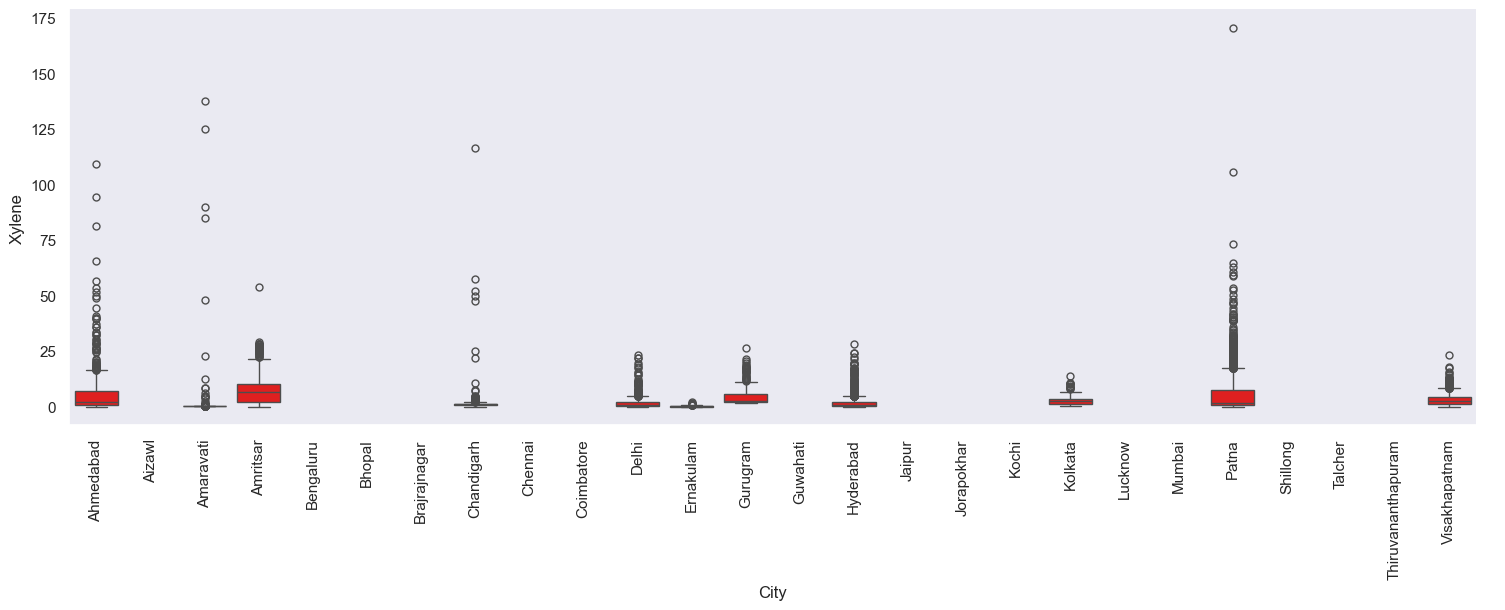

In [127]:
# Box Plot represetation for 'Xylene'.

graph1=sns.catplot(x="City",y="Xylene",kind="box",data=df,height=5,aspect=3, color='red')
graph1.set_xticklabels(rotation=90)

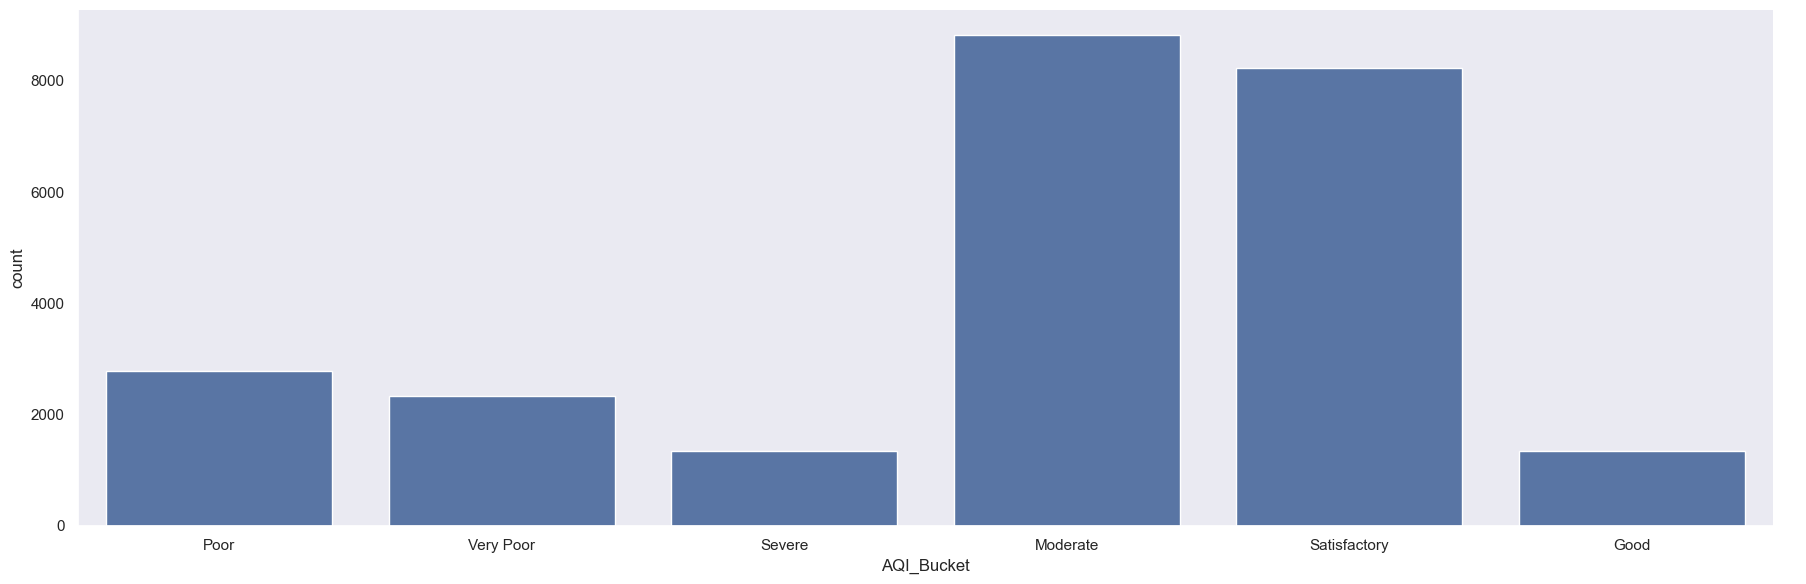

In [128]:
# CatPlot representation for 'AQI_Bucket'.

graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)

In [129]:
df.isnull().sum().sort_values(ascending=True)


City              0
Date              0
AQI_Bucket        0
AQI               0
NO              387
NO2             391
CO              445
SO2             605
PM2.5           678
O3              807
NOx            1857
Benzene        3535
Toluene        5826
NH3            6536
PM10           7086
Xylene        15372
dtype: int64

In [130]:
df.describe().loc["mean"]  # It retrieves the mean (average) values of all numeric columns in a DataFrame using the describe() method.

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [131]:
df = df.replace({    # Replaces the missing values with specified mean values.

"PM2.5" : {np.nan:55.260713},
"PM10" :{np.nan:105.338640},
"NO": {np.nan:12.517884},
"NO2": {np.nan:25.972275},
"NOx": {np.nan:26.756914},
"NH3": {np.nan:20.013266},
"CO":  {np.nan:1.004899},
"SO2": {np.nan:10.300662},
"O3": {np.nan:33.274368},
"Benzene": {np.nan:1.859195},
"Toluene": {np.nan:5.495570},
"Xylene": {np.nan:2.259553}
})

df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

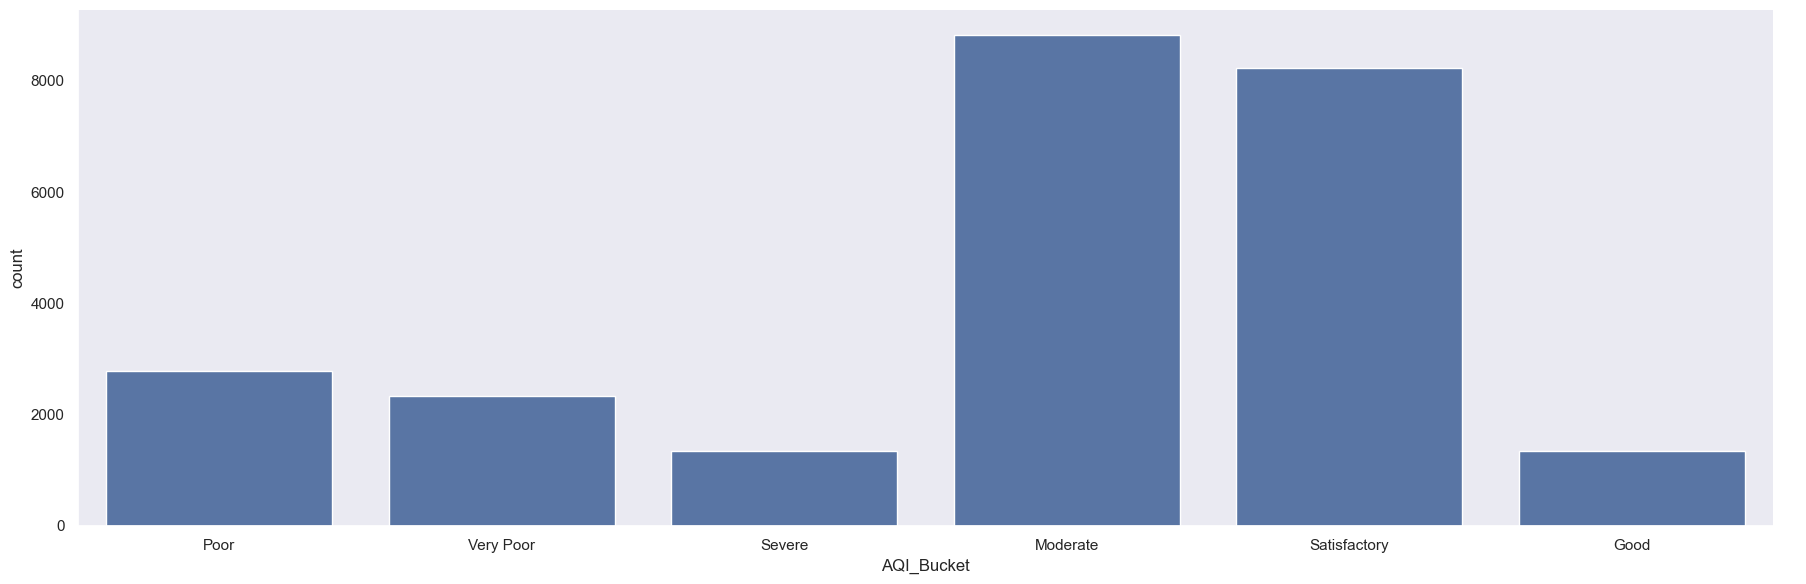

In [132]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)

In [133]:
df = df.drop(["AQI_Bucket"], axis=1)  # Deleting the 'AQI_Bucket' column from dataset as it does not affect the air quality. 

df.head()

City        Date   PM2.5       PM10     NO    NO2    NOx        NH3  \
28  Ahmedabad  2015-01-29   83.13  105.33864   6.93  28.71  33.72  20.013266   
29  Ahmedabad  2015-01-30   79.84  105.33864  13.85  28.68  41.08  20.013266   
30  Ahmedabad  2015-01-31   94.52  105.33864  24.39  32.66  52.61  20.013266   
31  Ahmedabad  2015-02-01  135.99  105.33864  43.48  42.08  84.57  20.013266   
32  Ahmedabad  2015-02-02  178.33  105.33864  54.56  35.31  72.80  20.013266   

       CO    SO2      O3  Benzene  Toluene  Xylene    AQI  
28   6.93  49.52   59.76     0.02     0.00    3.14  209.0  
29  13.85  48.49   97.07     0.04     0.00    4.81  328.0  
30  24.39  67.39  111.33     0.24     0.01    7.67  514.0  
31  43.48  75.23  102.70     0.40     0.04   25.87  782.0  
32  54.56  55.04  107.38     0.46     0.06   35.61  914.0

<Axes: >

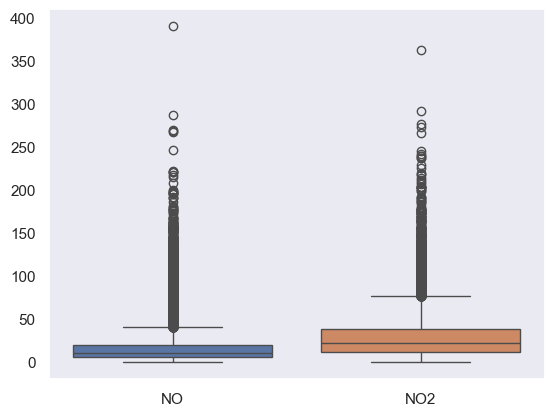

In [134]:
# Box Plot representation b/w 'NO','NO2'.

sns.boxplot(data=df[[ 'NO', 'NO2']])

<Axes: >

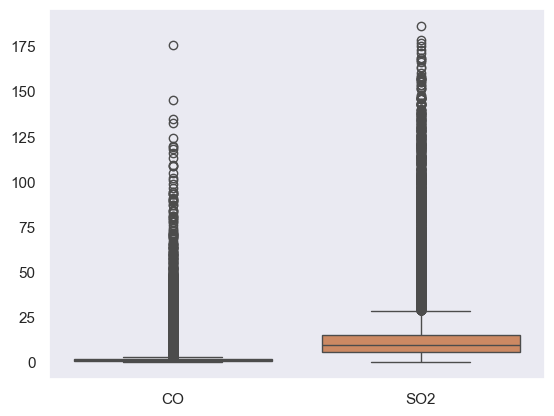

In [135]:
# Box Plot representation b/w 'CO','SO2'.

sns.boxplot(data=df[[ 'CO', 'SO2']])

<Axes: >

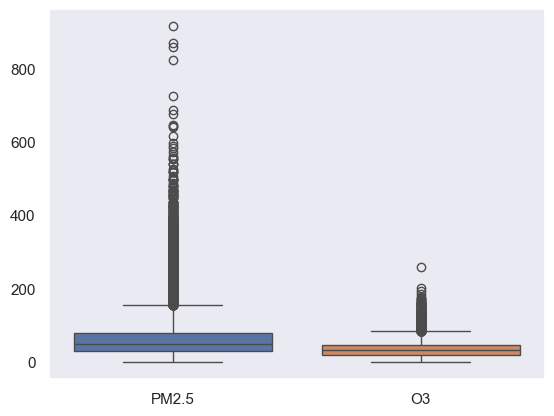

In [136]:
# Box Plot representation b/w 'PM2.5','O3'.

sns.boxplot(data=df[[ 'PM2.5', 'O3']])

<Axes: >

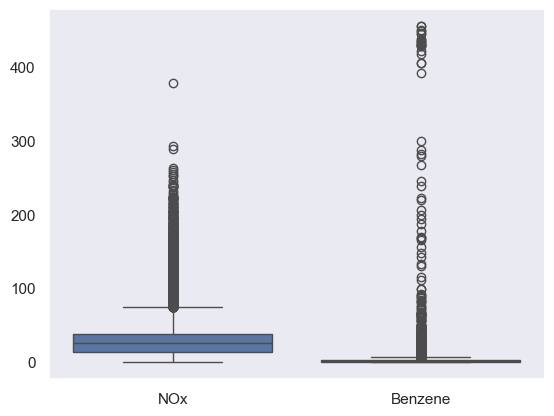

In [137]:
# Box Plot representation b/w 'NOx','Benzene'.

sns.boxplot(data=df[[ 'NOx', 'Benzene']])

<Axes: >

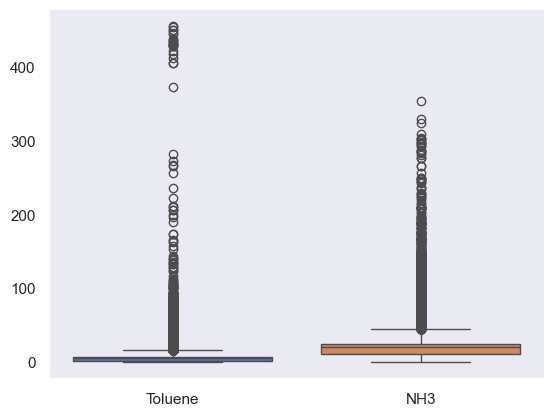

In [138]:
# Box Plot representation b/w 'Toluene','NH3'.

sns.boxplot(data=df[[ 'Toluene', 'NH3']])

<Axes: >

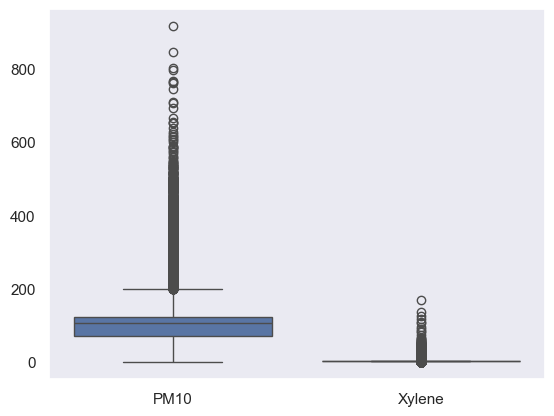

In [139]:
# Box Plot representation b/w 'PM10','Xylene'.

sns.boxplot(data=df[[ 'PM10', 'Xylene']])

<Axes: >

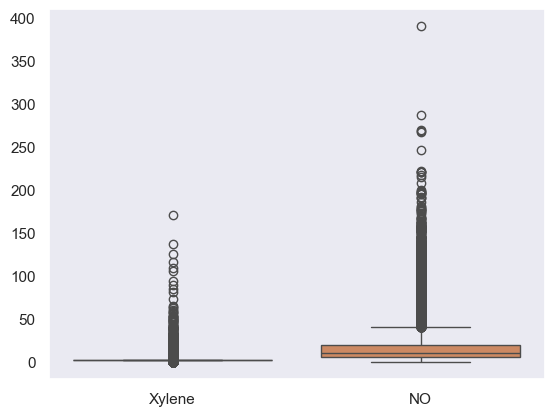

In [140]:
# Box Plot representation b/w 'Xylene','NO'.

sns.boxplot(data=df[[ 'Xylene', 'NO']])

In [141]:
# This function processes all numeric columns in a DataFrame, identifying and replacing outliers with their respective lower quartile (Q1) or upper quartile (Q3) values.

def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns:  # selects all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1                       # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR      # Outliers below the lower bound are replaced with Q1.
        upper_bound = Q3 + 1.5 * IQR      # Outliers below the upper bound are replaced with Q3.

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)   # Using Lambda function we identify and replace the outliers.
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

df.describe().T

count        mean        std        min        25%         50%  \
PM2.5    24850.0   54.840986  31.762895   0.040000  29.560000   50.165000   
PM10     24850.0   97.611342  37.873089   0.030000  71.780000  105.338640   
NO       24850.0   12.428199   8.738373   0.030000   5.720000   10.075000   
NO2      24850.0   25.853815  16.664960   0.010000  12.090000   22.535000   
NOx      24850.0   26.161108  16.057654   0.000000  14.030000   25.720000   
NH3      24850.0   18.477883   9.316400   0.010000  11.280000   20.013266   
CO       24850.0    1.001027   0.565845   0.000000   0.590000    0.950000   
SO2      24850.0   10.235842   5.645159   0.010000   5.790000    9.430000   
O3       24850.0   33.124570  17.484856   0.010000  19.640000   32.060000   
Benzene  24850.0    1.743803   1.529459   0.000000   0.340000    1.810000   
Toluene  24850.0    4.722658   3.411791   0.000000   1.580000    5.495570   
Xylene   24850.0    2.259553   0.000000   2.259553   2.259553    2.259553   
AQI      24850.0  146.932032  87.421731  13.000000  81.000000  118.000000   

                75%         max  
PM2.5     79.505625  154.300000  
PM10     122.955625  199.700000  
NO        19.710000   40.680000  
NO2       37.910000   76.620000  
NOx       38.170000   74.380000  
NH3       24.710000   44.850000  
CO         1.460000    2.760000  
SO2       14.890000   28.520000  
O3        45.395625   83.990000  
Benzene    2.850000    6.610000  
Toluene    7.380000   16.080000  
Xylene     2.259553    2.259553  
AQI      208.000000  398.000000

<Axes: >

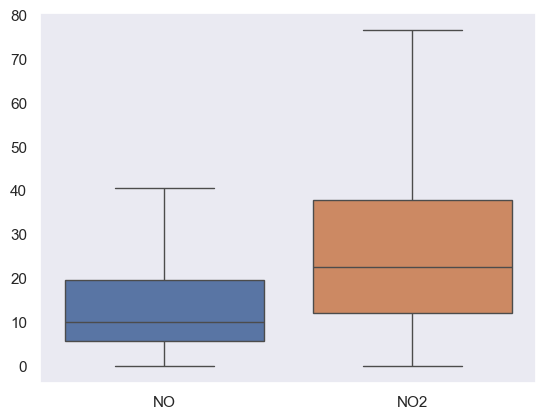

In [142]:
# Box Plot representation b/w 'NO','NO2' of current DataFrame.

sns.boxplot(data=df[[ 'NO', 'NO2']])

<Axes: >

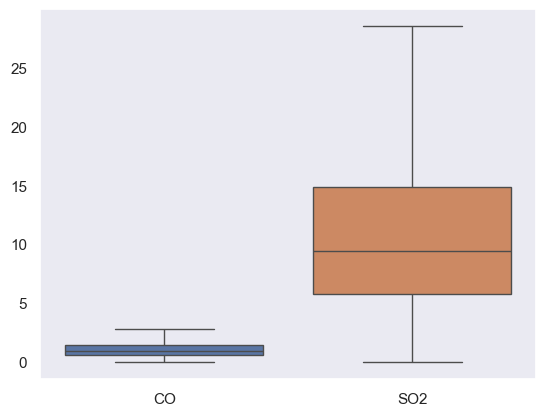

In [143]:
# Box Plot representation b/w 'CO','SO2' of current DataFrame.

sns.boxplot(data=df[[ 'CO', 'SO2']])

<Axes: >

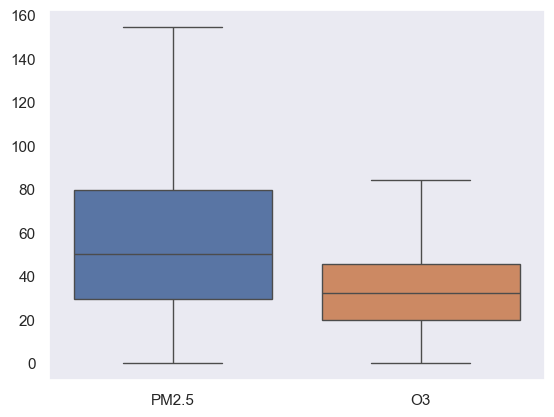

In [144]:
# Box Plot representation b/w 'PM2.5','O3' of current DataFrame.

sns.boxplot(data=df[[ 'PM2.5', 'O3']])

<Axes: >

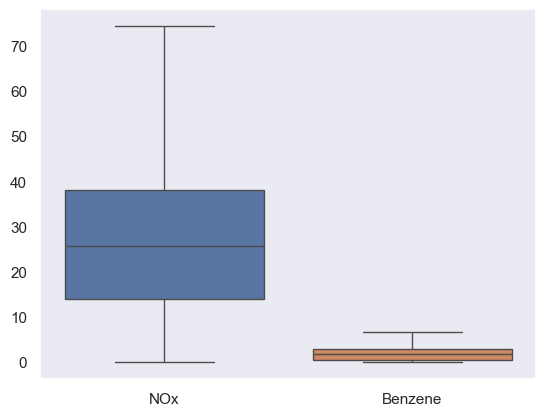

In [145]:
# Box Plot representation b/w 'NOx','Benzene' of current DataFrame.

sns.boxplot(data=df[[ 'NOx', 'Benzene']])

<Axes: >

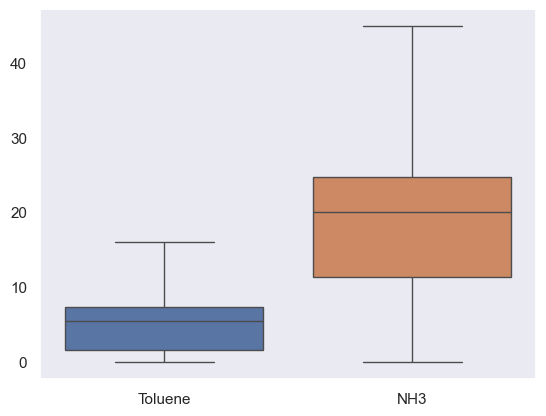

In [146]:
# Box Plot representation b/w 'Toluene','NH3' of current DataFrame.

sns.boxplot(data=df[[ 'Toluene', 'NH3']])

<Axes: >

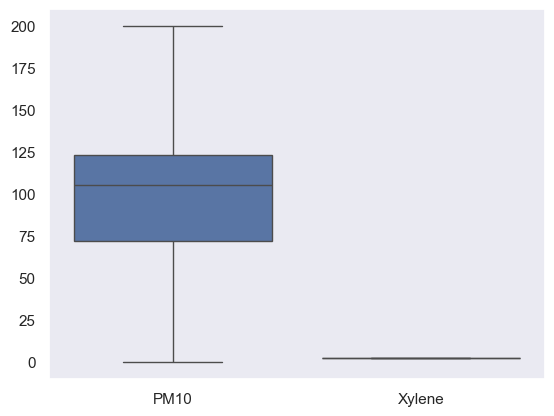

In [147]:
# Box Plot representation b/w 'PM10','Xylene' of current DataFrame.

sns.boxplot(data=df[[ 'PM10', 'Xylene']])

<Axes: >

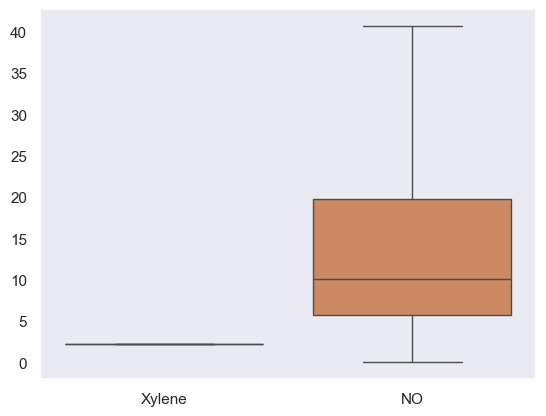

In [148]:
# Box Plot representation b/w 'Xylene','NO' of current DataFrame.

sns.boxplot(data=df[[ 'Xylene', 'NO']])

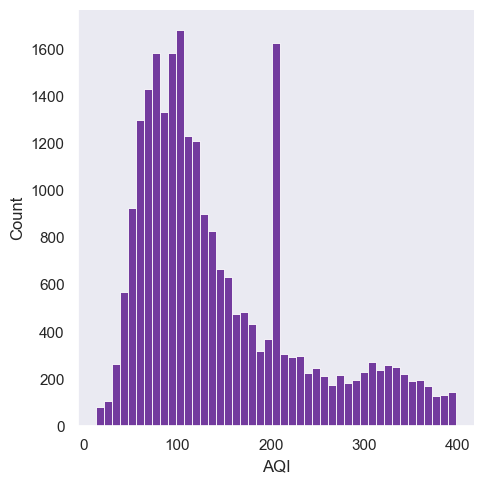

In [149]:
# Distribution Plot of 'AQI' of current DataFrame.

sns.displot(df, x="AQI", color="indigo")
plt.show()

In [150]:
df1=df.drop(columns=['City','Date']) # Dropping the columns - 'City','Date'.

MULTIVARIATE ANALYSIS

**HEATMAP** : A heatmap is a data visualization technique used to represent data in a matrix form, where individual values are displayed with varying color intensities.

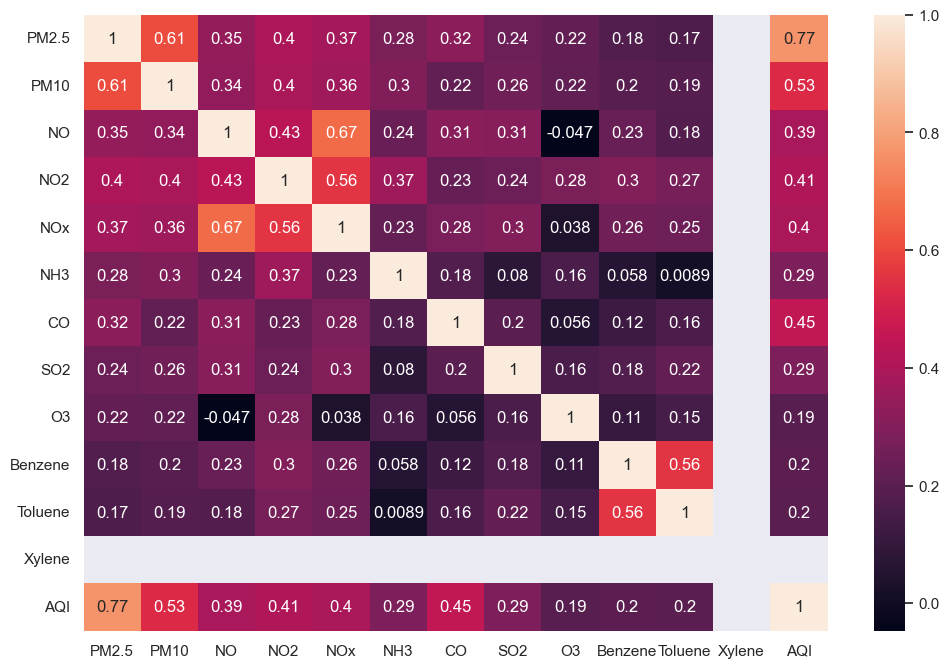

In [151]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1.corr(),annot=True) 
plt.show() 

In [153]:
# Dropping unnecessary columns
df.drop(['Date'],axis=1,inplace=True)        # No need of these features as we are going to calculate based on other parameters not on the loaction so we drop this.
df.drop(['City'],axis=1,inplace=True)        

In [156]:
print(df)

          PM2.5       PM10     NO    NO2    NOx        NH3    CO    SO2  \
28      83.1300  105.33864   6.93  28.71  33.72  20.013266  1.46  14.89   
29      79.8400  105.33864  13.85  28.68  41.08  20.013266  1.46  14.89   
30      94.5200  105.33864  24.39  32.66  52.61  20.013266  1.46  14.89   
31     135.9900  105.33864  19.71  42.08  38.17  20.013266  1.46  14.89   
32      79.5075  105.33864  19.71  35.31  72.80  20.013266  1.46  14.89   
...         ...        ...    ...    ...    ...        ...   ...    ...   
29526   15.0200   50.94000   7.68  25.06  19.54  12.470000  0.47   8.55   
29527   24.3800   74.09000   3.42  26.06  16.53  11.990000  0.52  12.72   
29528   22.9100   65.73000   3.45  29.53  18.33  10.710000  0.48   8.42   
29529   16.6400   49.97000   4.05  29.26  18.80  10.030000  0.52   9.84   
29530   15.0000   66.00000   0.40  26.85  14.05   5.200000  0.59   2.10   

            O3   Benzene   Toluene    Xylene    AQI  
28     59.7600  0.020000   0.00000  2.259553 

In [ ]:
df1 = StandardScaler().fit_transform(df) # It standardizes the data in the DataFrame df and calculates the mean and standard deviation for each feature.
print(df1)

[[ 0.89064877  0.20403546 -0.62921434 ... -1.3842447   0.
   0.70999757]
 [ 0.78706671  0.20403546  0.16271099 ... -1.3842447   0.
   2.07124258]
 [ 1.24925051  0.20403546  1.36890939 ... -1.38131363  0.
   0.69855854]
 ...
 [-1.00531228 -0.84181103 -1.02746581 ... -1.38131363  0.
  -0.90290618]
 [-1.20271639 -1.25794602 -0.95880176 ... -1.3842447   0.
  -1.06305265]
 [-1.25435    -0.83468182 -1.37650804 ...  0.22654602  0.
  -1.10880878]]


In [ ]:
df = pd.DataFrame(df1,columns = df.columns) #  To convert the standardized data back into a pandas DataFrame.
print(df)

          PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0      0.890649  0.204035 -0.629214  0.171392  0.470744  0.164808  0.811144   
1      0.787067  0.204035  0.162711  0.169592  0.929102  0.164808  0.811144   
2      1.249251  0.204035  1.368909  0.408421  1.647154  0.164808  0.811144   
3      2.554888  0.204035  0.833330  0.973690  0.747876  0.164808  0.811144   
4      0.776598  0.204035  0.833330  0.567441  2.904523  0.164808  0.811144   
...         ...       ...       ...       ...       ...       ...       ...   
24845 -1.253720 -1.232334 -0.543384 -0.047635 -0.412342 -0.644885 -0.938486   
24846 -0.959031 -0.621069 -1.030899  0.012373 -0.599795 -0.696408 -0.850120   
24847 -1.005312 -0.841811 -1.027466  0.220598 -0.487697 -0.833803 -0.920812   
24848 -1.202716 -1.257946 -0.958802  0.204396 -0.458427 -0.906794 -0.850120   
24849 -1.254350 -0.834682 -1.376508  0.059778 -0.754242 -1.425245 -0.726409   

            SO2        O3   Benzene   Toluene  Xyle

In [161]:
# Data Preparation for Modeling

x=df[["NO","NO2","CO","SO2","PM2.5","O3","NOx","Benzene","Toluene","NH3","PM10","Xylene"]]
y=df["AQI"]

x.head()

NO       NO2        CO       SO2     PM2.5        O3       NOx  \
0 -0.629214  0.171392  0.811144  0.824468  0.890649  1.523373  0.470744   
1  0.162711  0.169592  0.811144  0.824468  0.787067  0.701932  0.929102   
2  1.368909  0.408421  0.811144  0.824468  1.249251  0.701932  1.647154   
3  0.833330  0.973690  0.811144  0.824468  2.554888  0.701932  0.747876   
4  0.833330  0.567441  0.811144  0.824468  0.776598  0.701932  2.904523   

    Benzene   Toluene       NH3      PM10  Xylene  
0 -1.127090 -1.384245  0.164808  0.204035     0.0  
1 -1.114013 -1.384245  0.164808  0.204035     0.0  
2 -0.983246 -1.381314  0.164808  0.204035     0.0  
3 -0.878631 -1.372520  0.164808  0.204035     0.0  
4 -0.839401 -1.366658  0.164808  0.204035     0.0

In [162]:
y.head()

0    0.709998
1    2.071243
2    0.698559
3    0.698559
4    0.698559
Name: AQI, dtype: float64

In [164]:
# splitting the data into training and testing data.

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=80)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


**LINEAR REGRESSION** : Linear regression models the relationship between independent variables and a dependent variable by fitting a straight line to minimize errors.

In [165]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [166]:
#predicting train
train_pred=model.predict(X_train)

#predicting on test
test_pred=model.predict(X_test)

In [169]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred))) # For calculating Root Mean Squared Error on TrainingData.
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))  # For calculating Root Mean Squared Error on TestData.
print("Root Mean Squared Error on TrainingData = ",str(RMSE_train))
print("Root Mean Squared Error on TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Root Mean Squared Error on TrainingData =  0.5902994703575137
Root Mean Squared Error on TestData =  0.5846899649556784
--------------------------------------------------
RSquared value on train: 0.6537937771741298
RSquared value on test: 0.6489848556909363


**K-Nearest Neighbours** : K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm that classifies data by majority vote of nearest labeled neighbors.

In [173]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [174]:
#predicting train
train_pred=model.predict(X_train)

#predicting on test
test_pred=model.predict(X_test)

In [175]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred))) # For calculating Root Mean Squared Error on TrainingData.
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))  # For calculating Root Mean Squared Error on TestData.
print("Root Mean Squared Error on TrainingData = ",str(RMSE_train))
print("Root Mean Squared Error on TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Root Mean Squared Error on TrainingData =  0.5902994703575137
Root Mean Squared Error on TestData =  0.5846899649556784
--------------------------------------------------
RSquared value on train: 0.6537937771741298
RSquared value on test: 0.6489848556909363


**Decision Tree Regressor** : Decision Tree Regressor predicts continuous target values by splitting data into subsets using decision rules based on feature values recursively.

In [176]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [177]:
#predicting train
train_preds=DT.predict(X_train)

#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))  # For calculating Root Mean Squared Error on TrainingData.
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))  # For calculating Root Mean Squared Error on TestData.
print("Root Mean Squared Error on TrainingData = ",str(RMSE_train))
print("Root Mean Squared Error on TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.02754879569185333
RMSE TestData =  0.5455431698531159
--------------------------------------------------
RSquared value on train: 0.999245958377748
RSquared value on test: 0.6944144461786066


**Random Forest Regressor** :Random Forest Regressor predicts continuous values by averaging results from multiple decision trees, improving accuracy and reducing overfitting in regression tasks.

In [180]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [181]:
#predicting train
train_preds1=RF.predict(X_train)

#predicting on test
test_preds1=RF.predict(X_test)

In [182]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))  # For calculating Root Mean Squared Error on TrainingData.
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))  # For calculating Root Mean Squared Error on TestData.
print("Root Mean Squared Error on TrainingData = ",str(RMSE_train))
print("Root Mean Squared Error on TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

Root Mean Squared Error on TrainingData =  0.14955425567108518
Root Mean Squared Error on TestData =  0.39187709436132917
--------------------------------------------------
RSquared value on train: 0.9777777702137693
RSquared value on test: 0.842320827357484


The R² score for the train data indicates that the model’s ability to explain the variability in the air quality data is very low. This means that the model is not learning the relationships between air pollution and other air quality factors effectively.

**Model Accuracy Comparison**

RandomForest Performs Well:

Among the algorithms tested, RandomForest exhibits the highest RSquared at  0.9777777 on Train and 0.8423208 on Test.

The R² score on the training dataset was obtained as 97.77%. This indicates that the model was able to explain a large portion of the variance of the target variable in the training data, i.e. 97.77%. In other words, the model predicted the air quality variables in the training data correctly for the most part and was able to capture a large portion of the data meaningfully.

The R² score on the test dataset was obtained as 84.23%. This indicates that the model was able to explain 84.23% of the target variable in the test data. The model has also shown high success on new data that it has not seen before, indicating that the model provides strong accuracy in air quality predictions and is effective on new data.